In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = df.drop(['id'], axis =1 )
test = test.drop(['id'], axis =1 )

In [3]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [4]:
df.columns =df.columns.str.lower()

test.columns = test.columns.str.lower()

In [5]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Columns: 9 entries, sex to age
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


In [6]:
test 

,sex,length,diameter,height,weight,shucked weight,viscera weight,shell weight
0,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...
49363,F,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
49364,I,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
49365,F,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345
49366,F,1.2375,0.9500,0.2875,15.663099,6.095142,3.727959,4.961163


<Axes: title={'center': 'NULL VALUES IN DATASET'}>

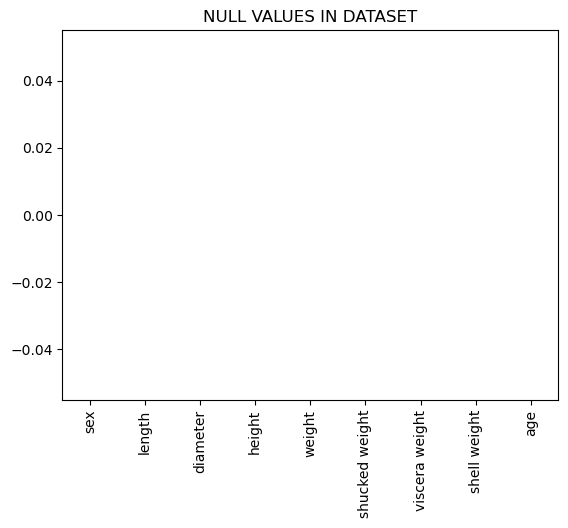

In [7]:
null = df.isna().sum()
plt.title('NULL VALUES IN DATASET')
null.plot(kind ='bar')

In [8]:
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [9]:
df.describe()

,length,diameter,height,weight,shucked weight,viscera weight,shell weight,age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


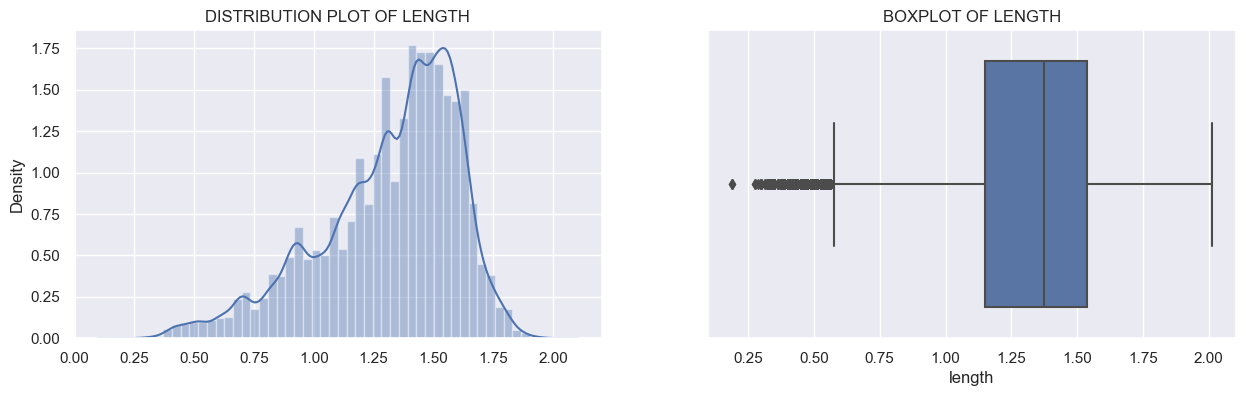

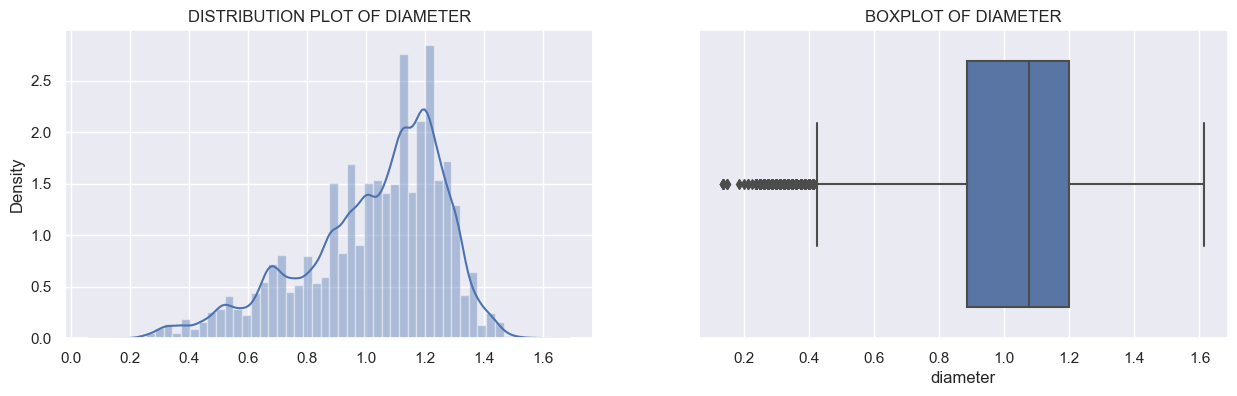

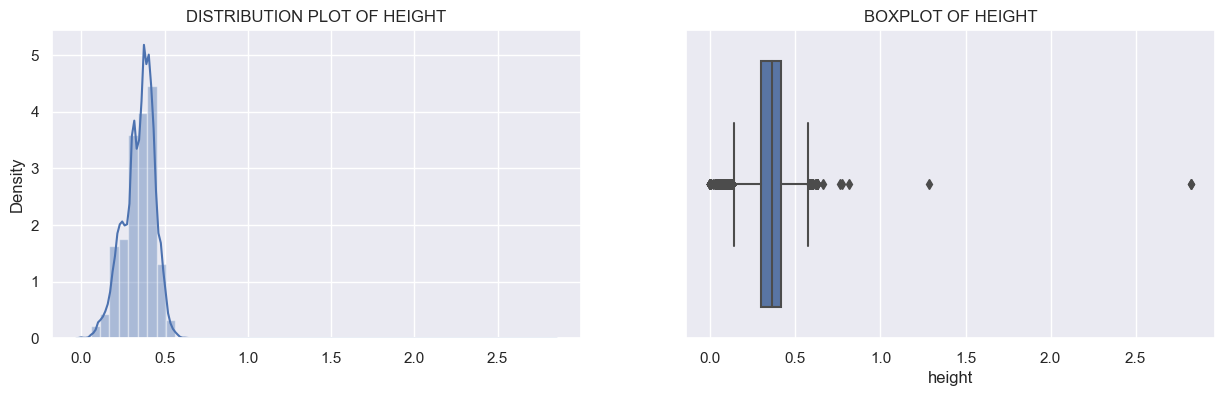

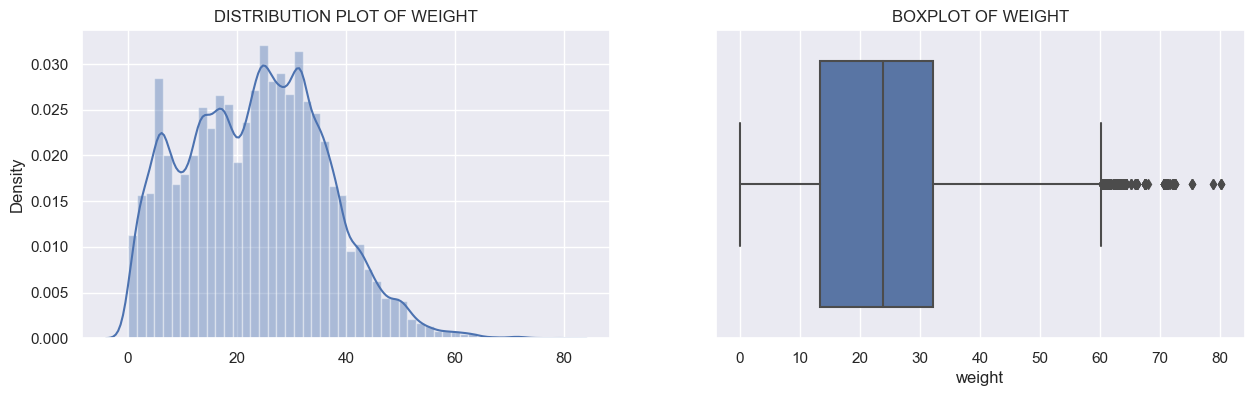

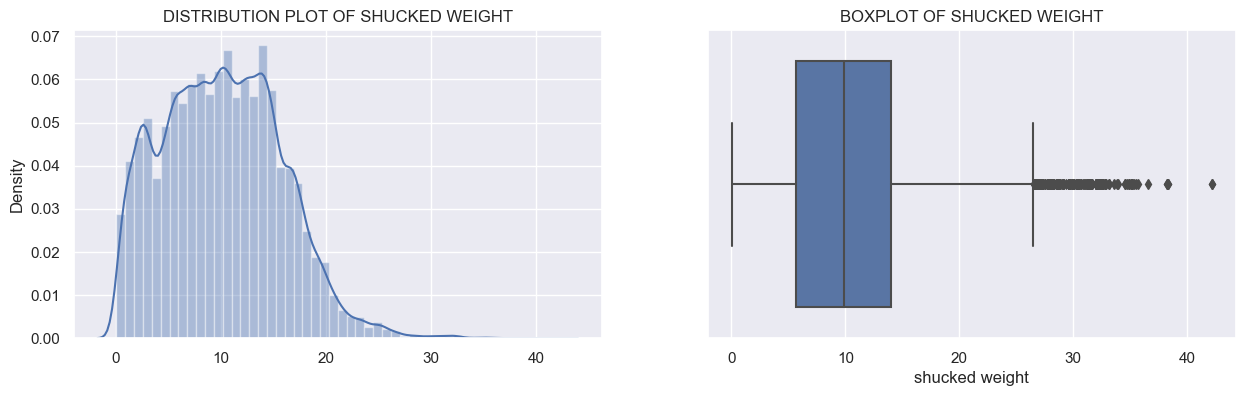

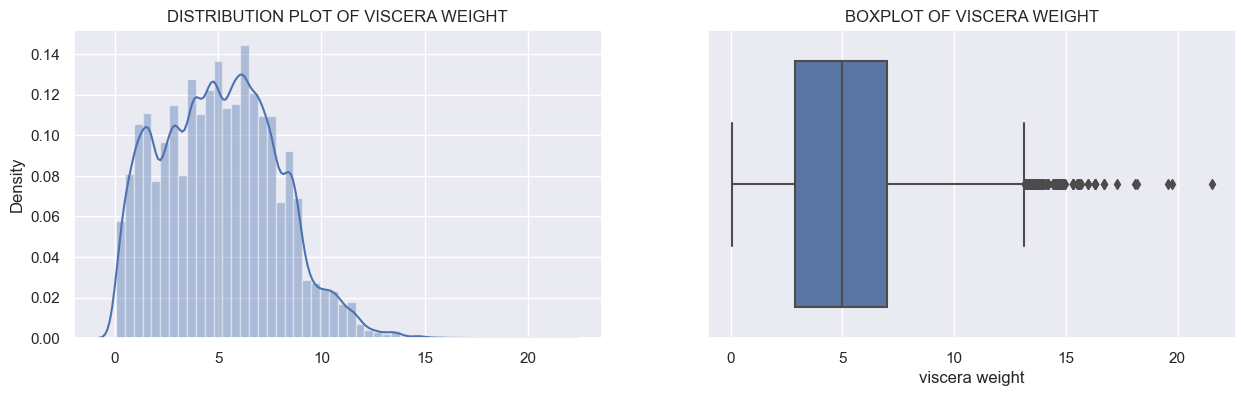

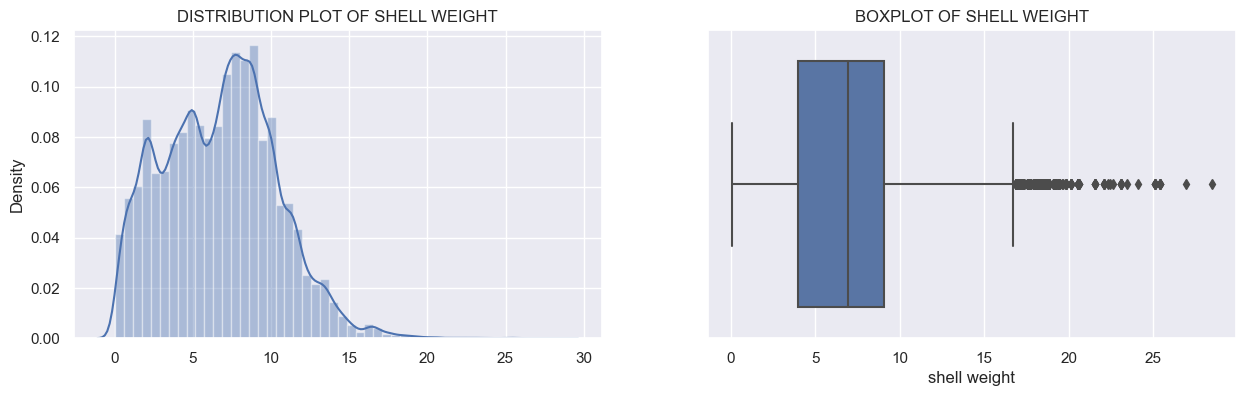

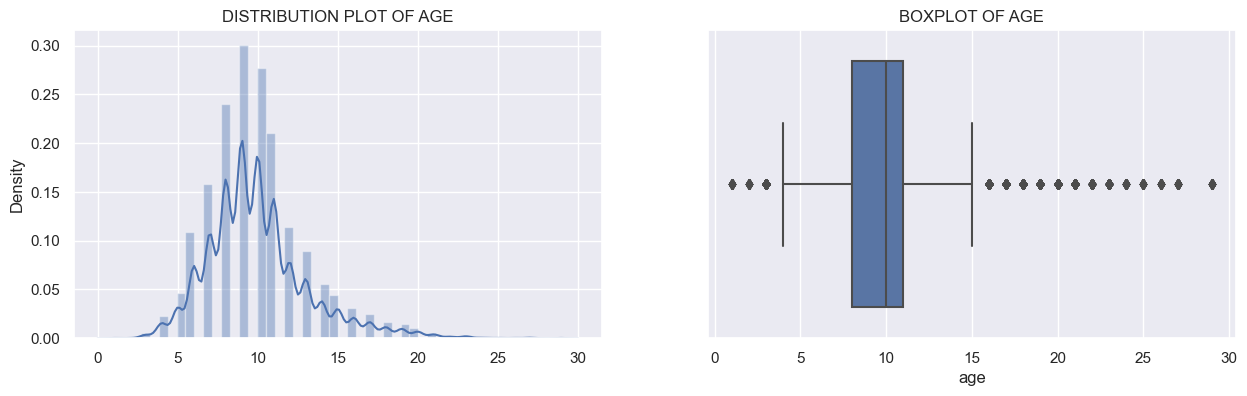

In [10]:
numerical = df.select_dtypes(include=[np.number])
for num in numerical.columns:
    sns.set()
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title(f'DISTRIBUTION PLOT OF {num}'.upper())
    sns.distplot(x = df[num])
    
    plt.subplot(1,2,2)
    plt.title(f'BOXPLOT OF {num}'.upper())
    sns.boxplot(x = df[num])
    

WE CAN DECTECT THE PRESENCE OF OUTLIERS IN THE ABOVE COLUMNS AND THEY ARE SKEWED


<Axes: >

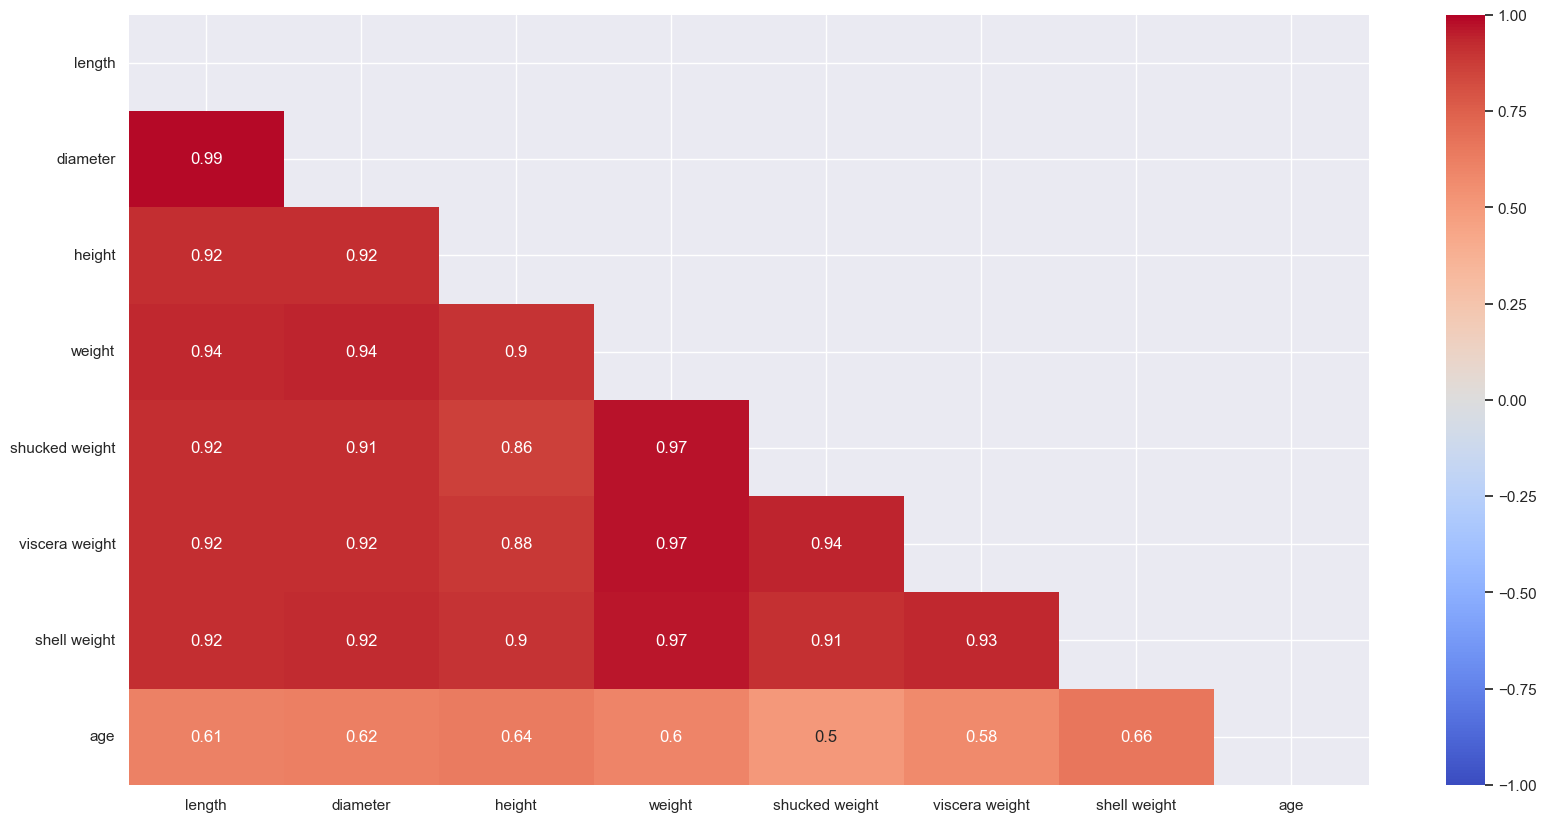

In [11]:
plt.figure(figsize=(20,10))
cor_matrix = numerical.corr()
mask = np.triu(np.ones_like(cor_matrix))
sns.heatmap(cor_matrix, annot = True, mask =mask , cmap = 'coolwarm', vmax=1, vmin=-1)

all the independet variables are highly correlated with each other

In [12]:
col = numerical.skew().sort_values()
skew_col = col.loc[abs(col) > 0.5]
skew_col

length     -0.844377
diameter   -0.812866
age         1.092919
dtype: float64

In [13]:
numerical.skew()

length           -0.844377
diameter         -0.812866
height            0.086578
weight            0.231465
shucked weight    0.349472
viscera weight    0.286383
shell weight      0.277459
age               1.092919
dtype: float64

<Axes: xlabel='sex', ylabel='count'>

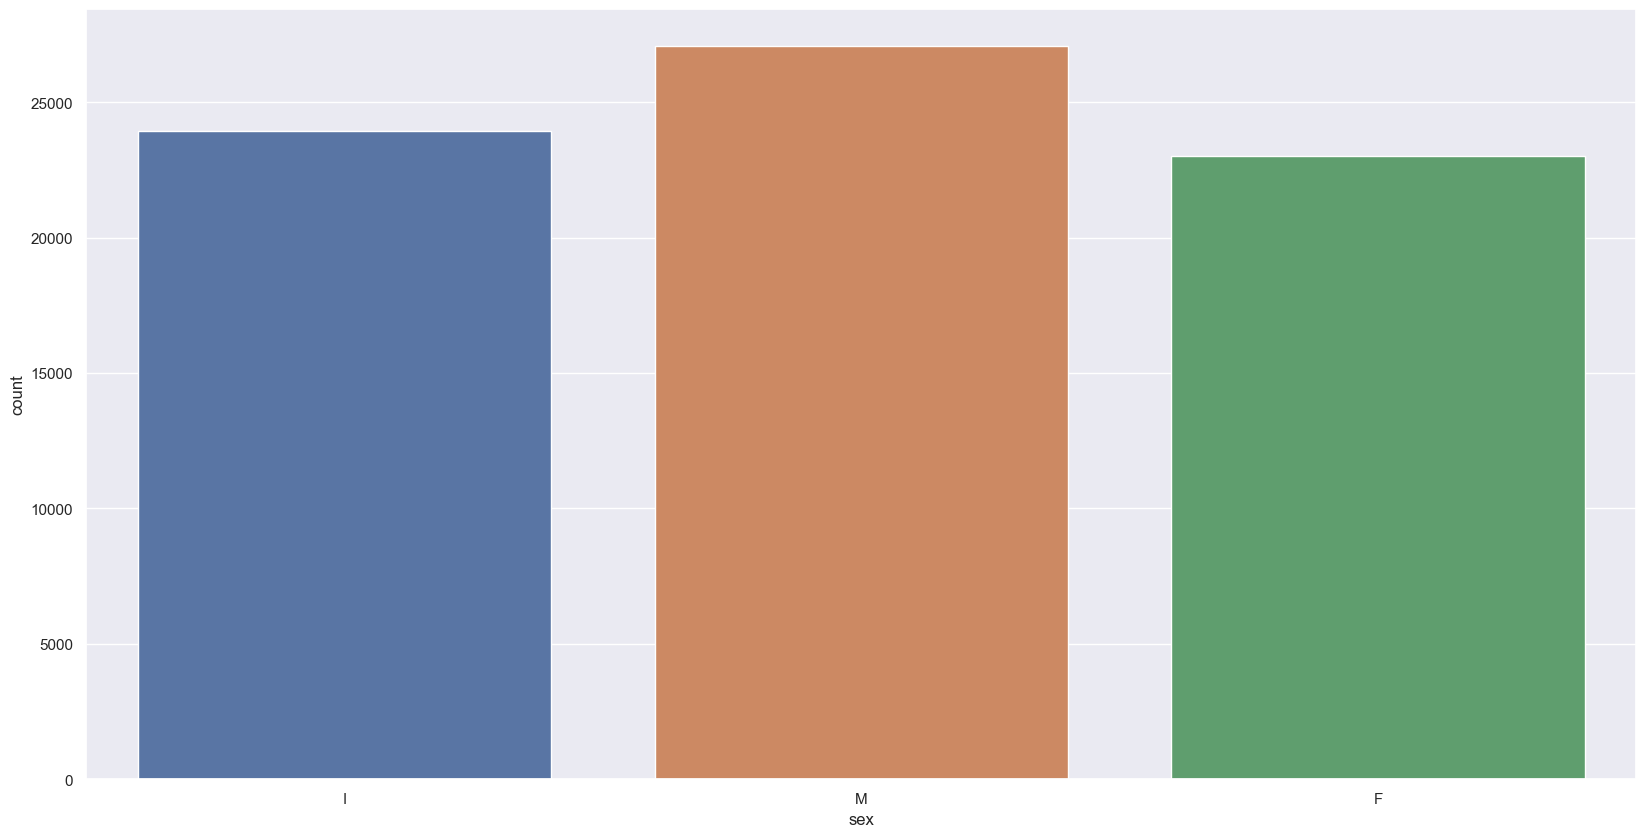

In [14]:
plt.figure(figsize=(20,10))
sns. countplot (x  = df['sex'])

<Axes: xlabel='sex', ylabel='age'>

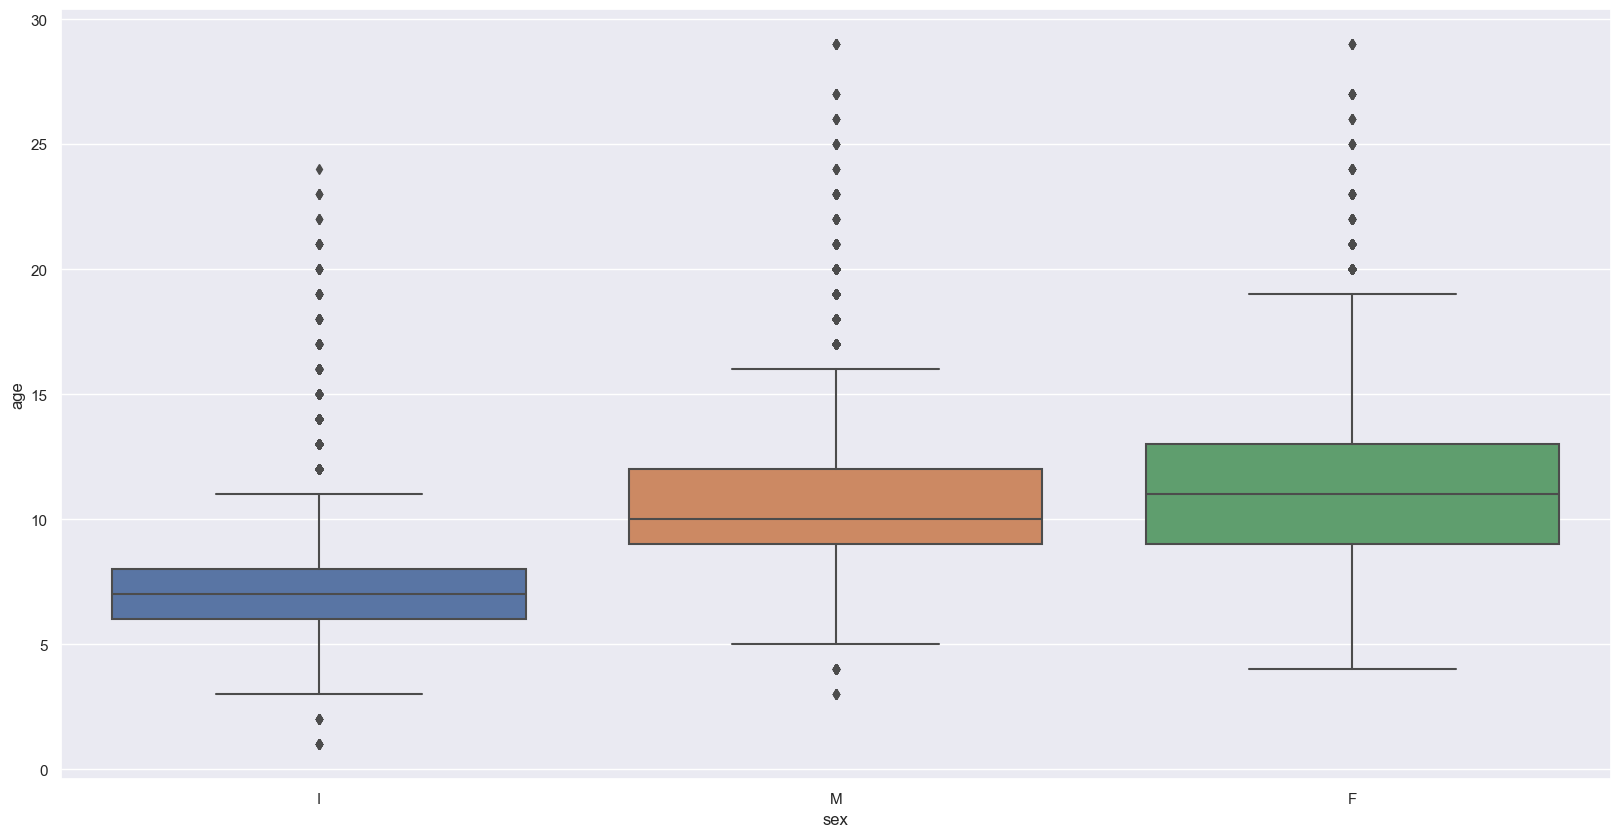

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot (x =df['sex'], y =df['age'])

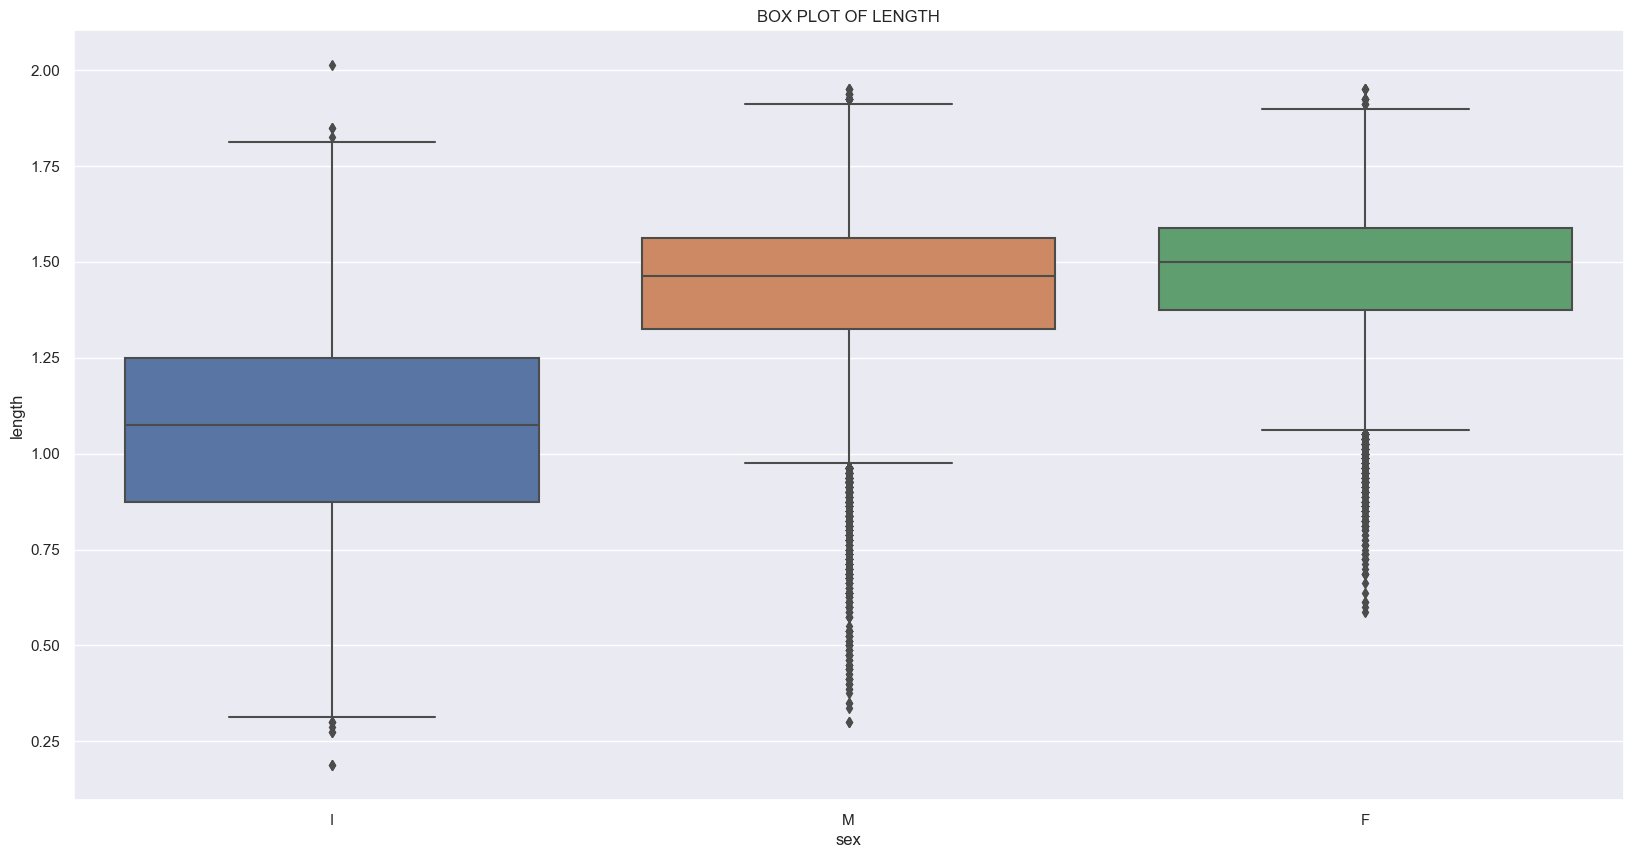

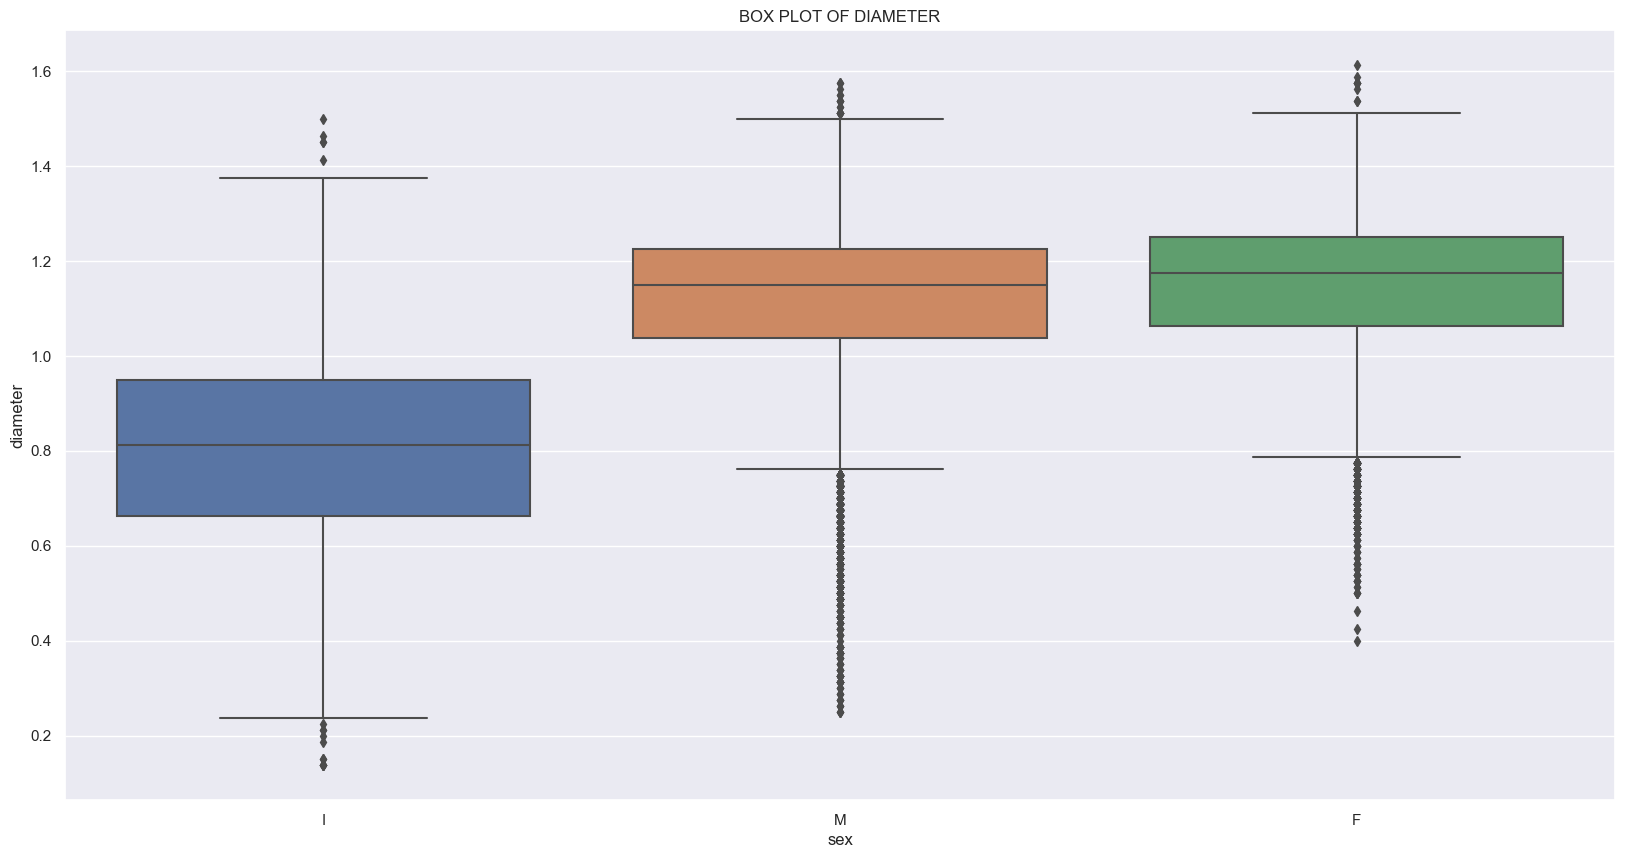

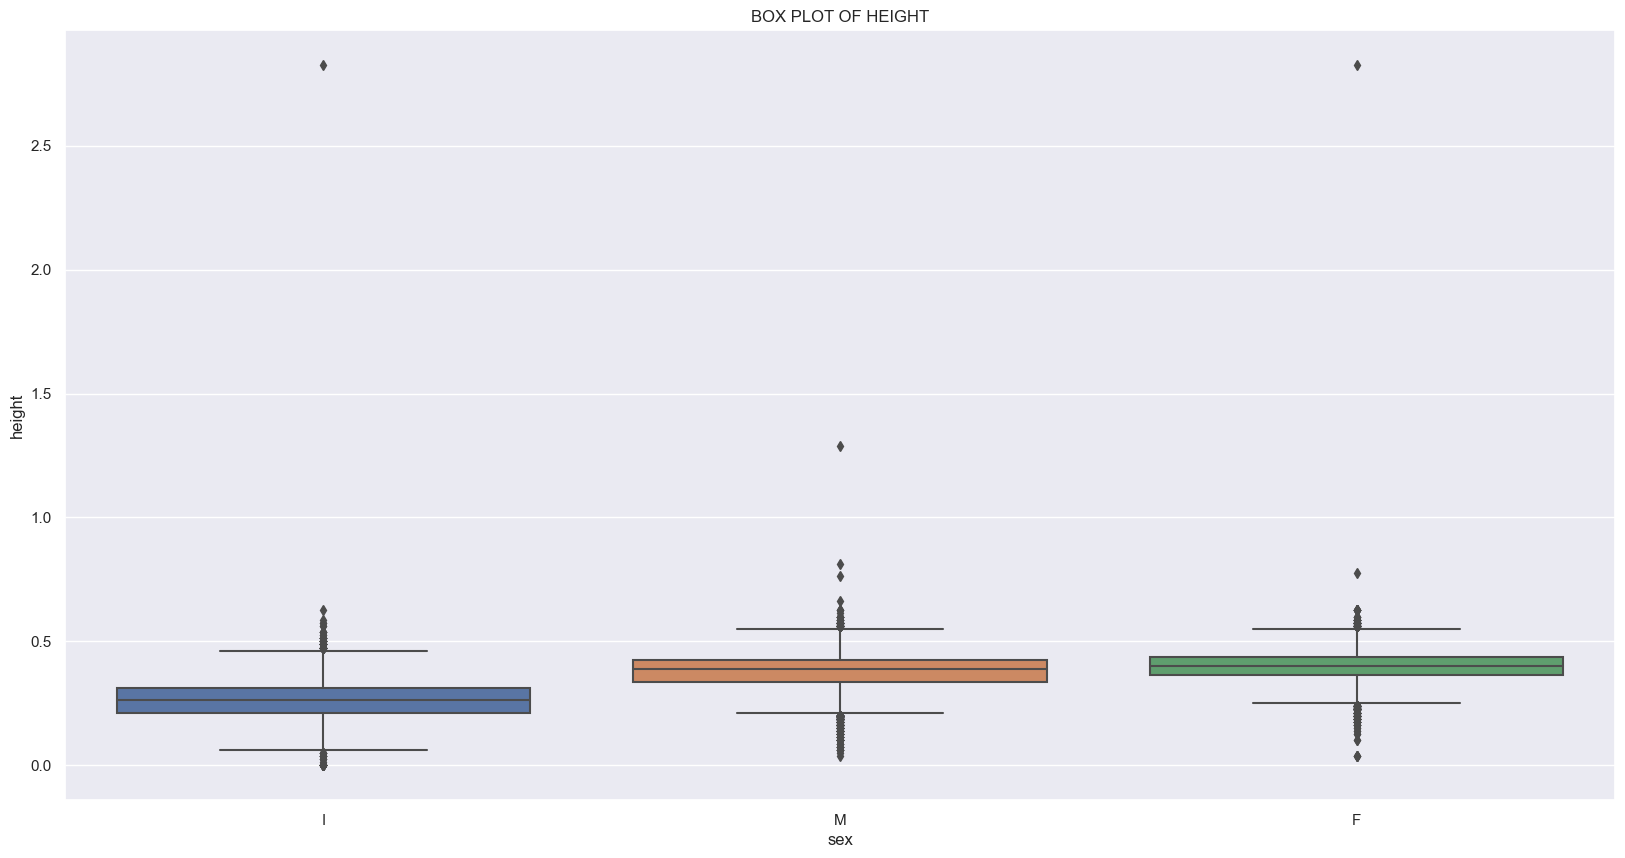

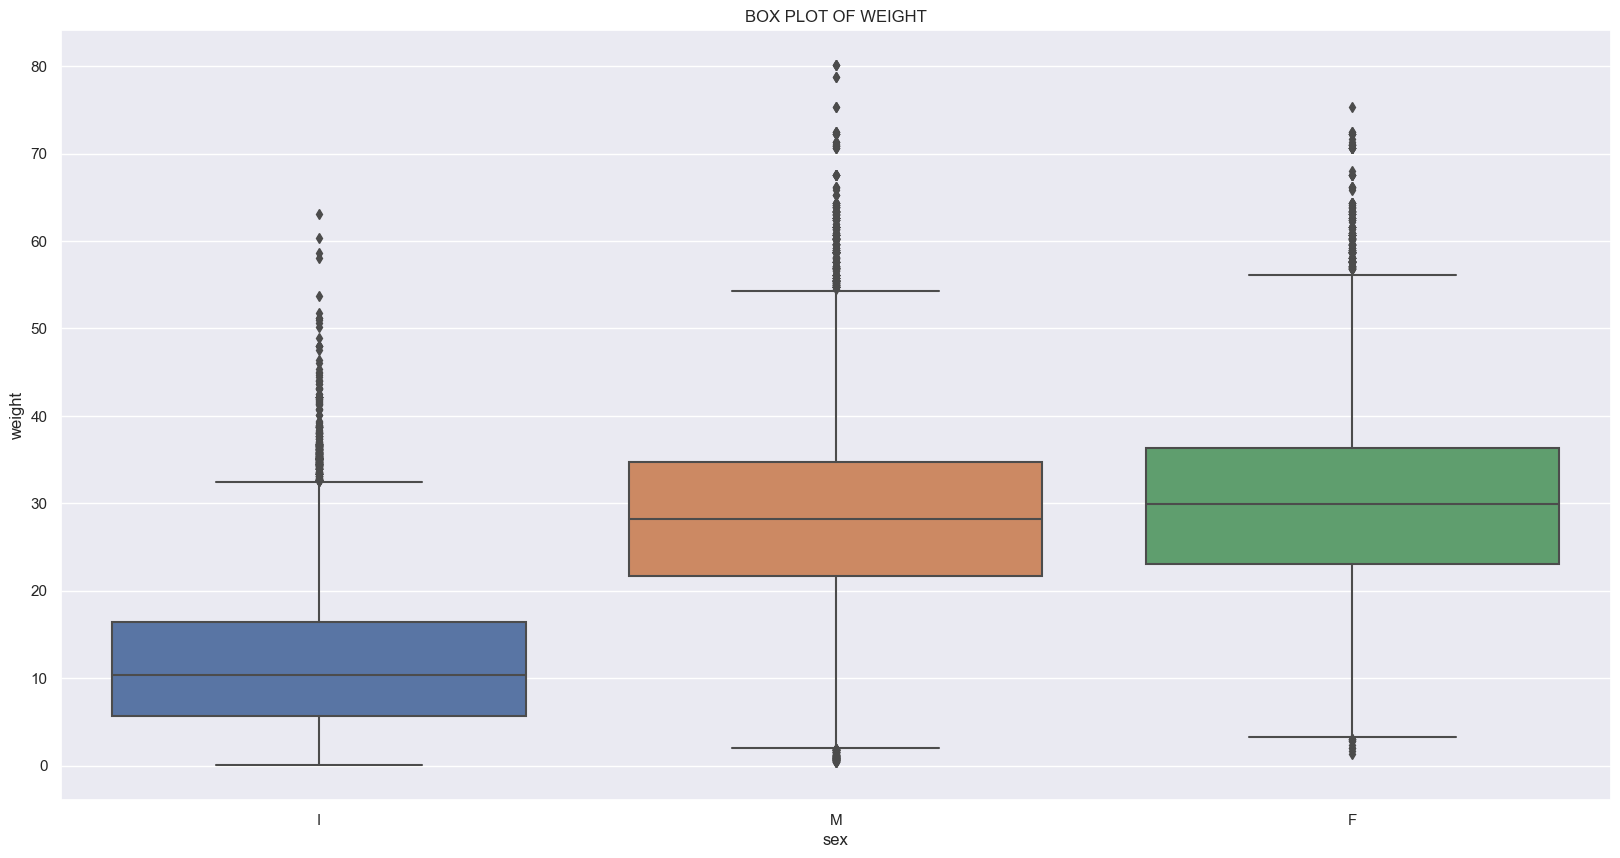

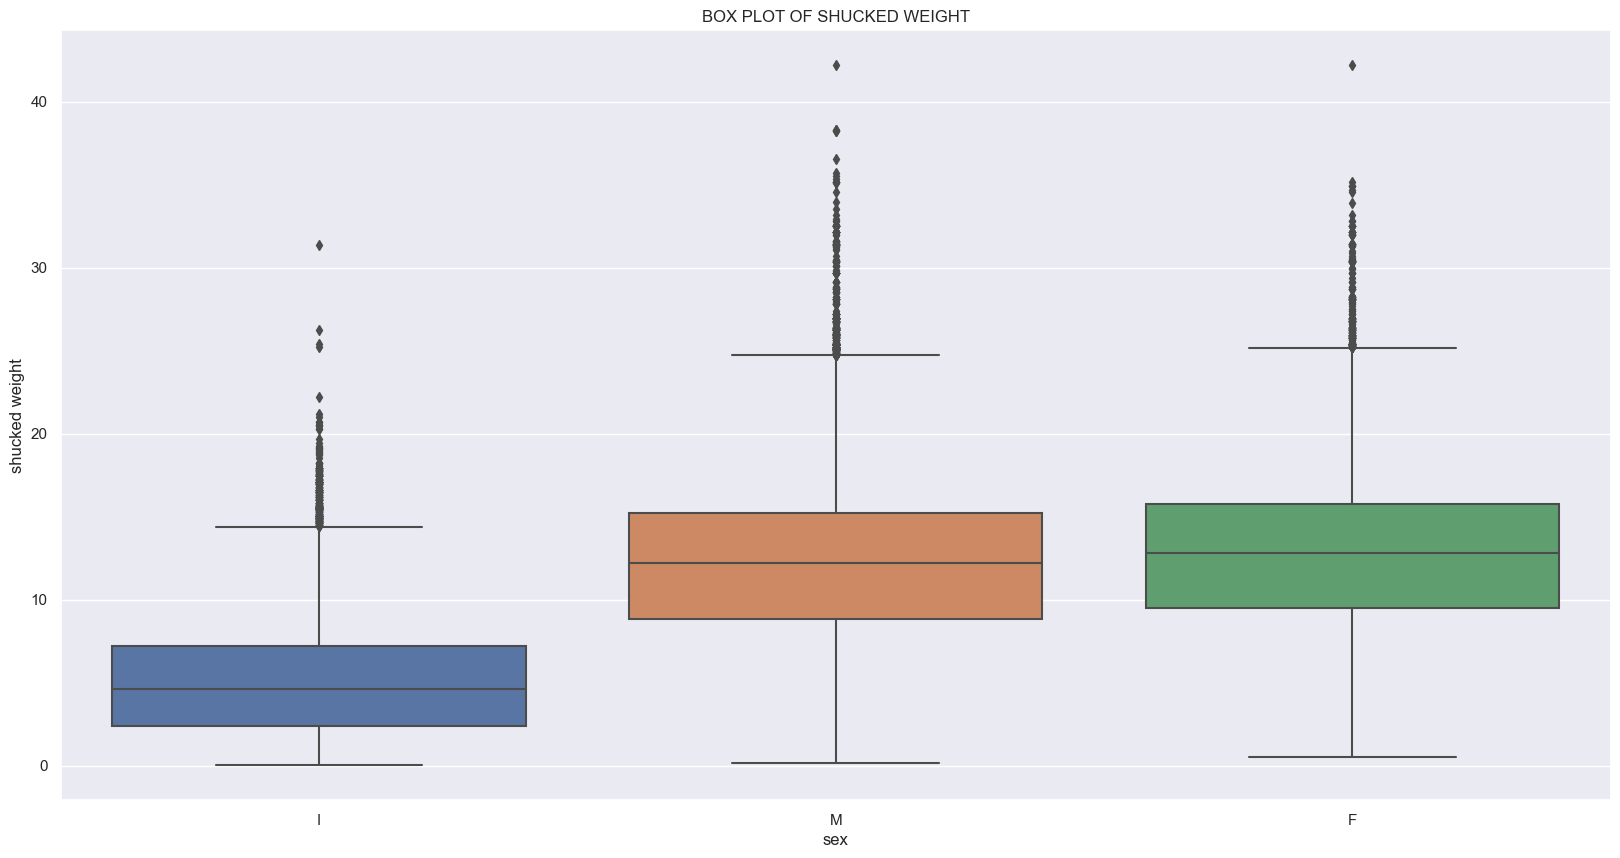

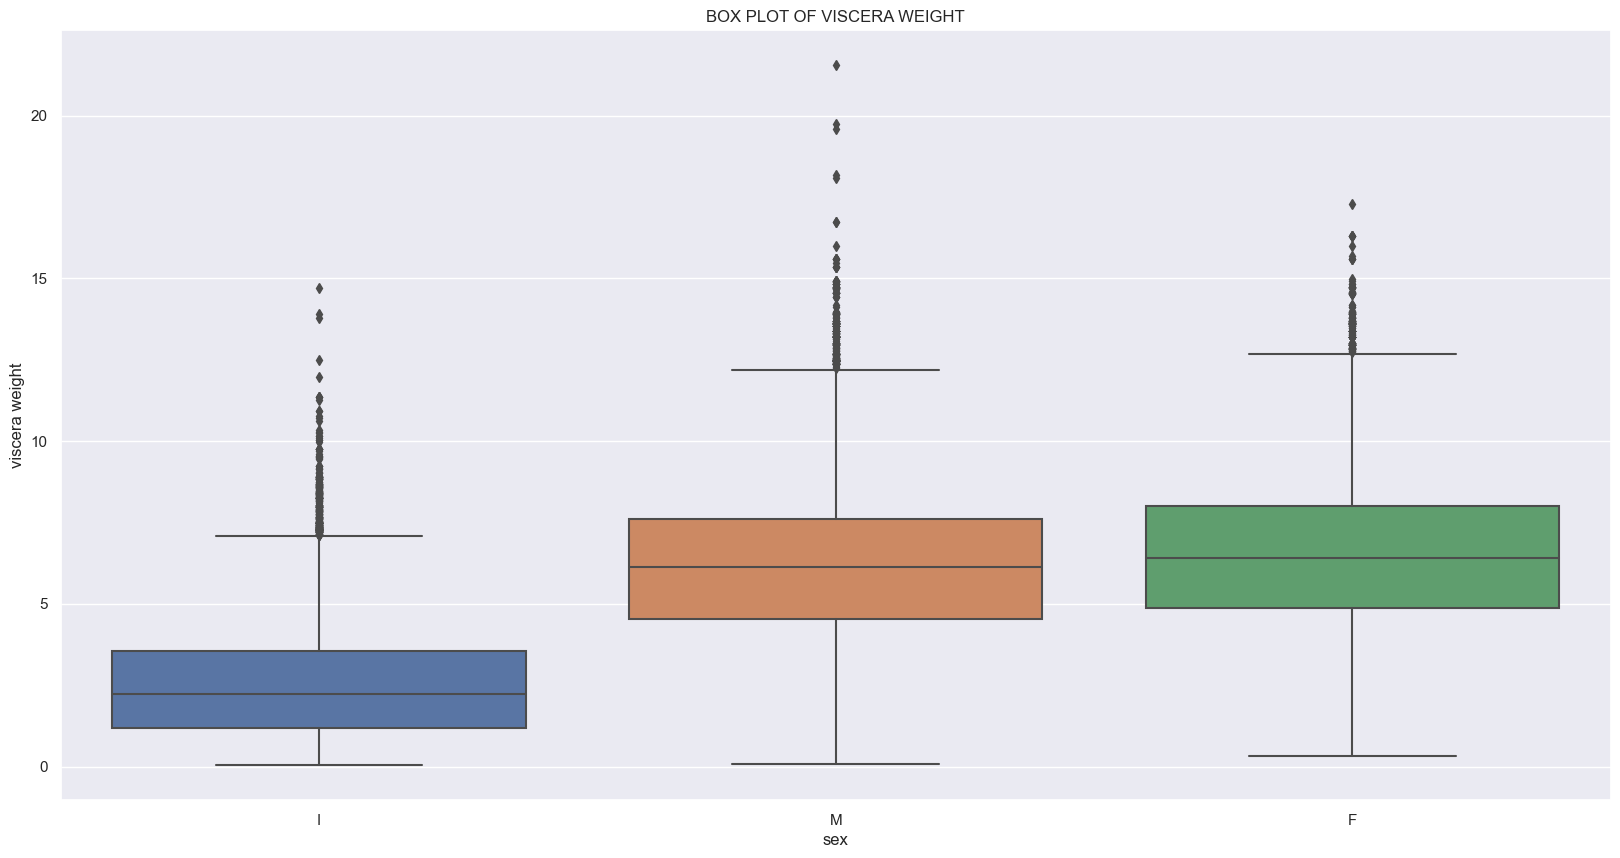

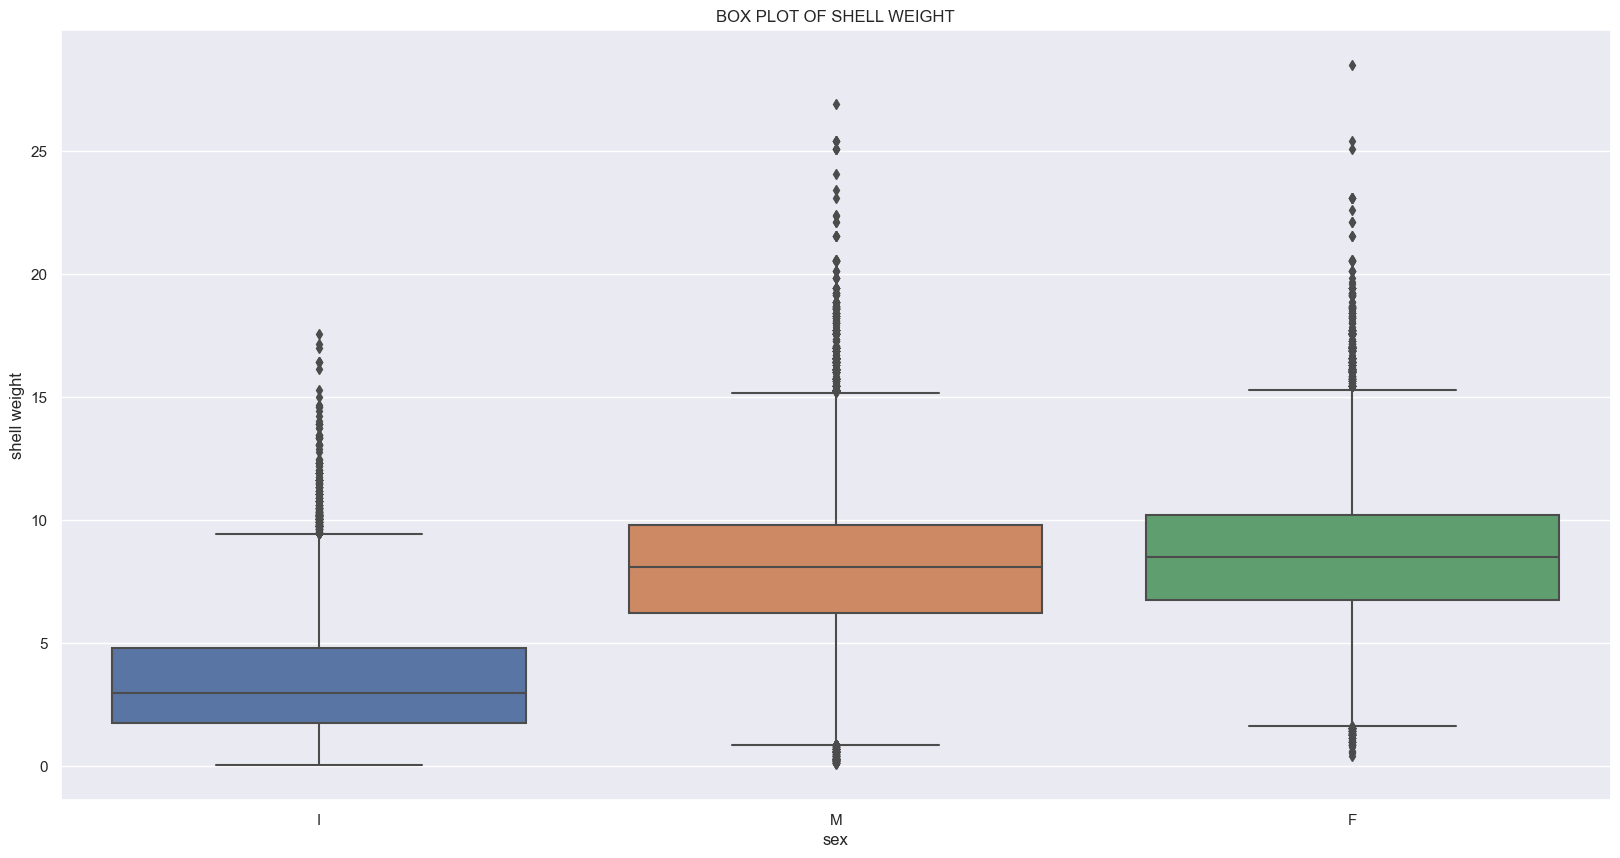

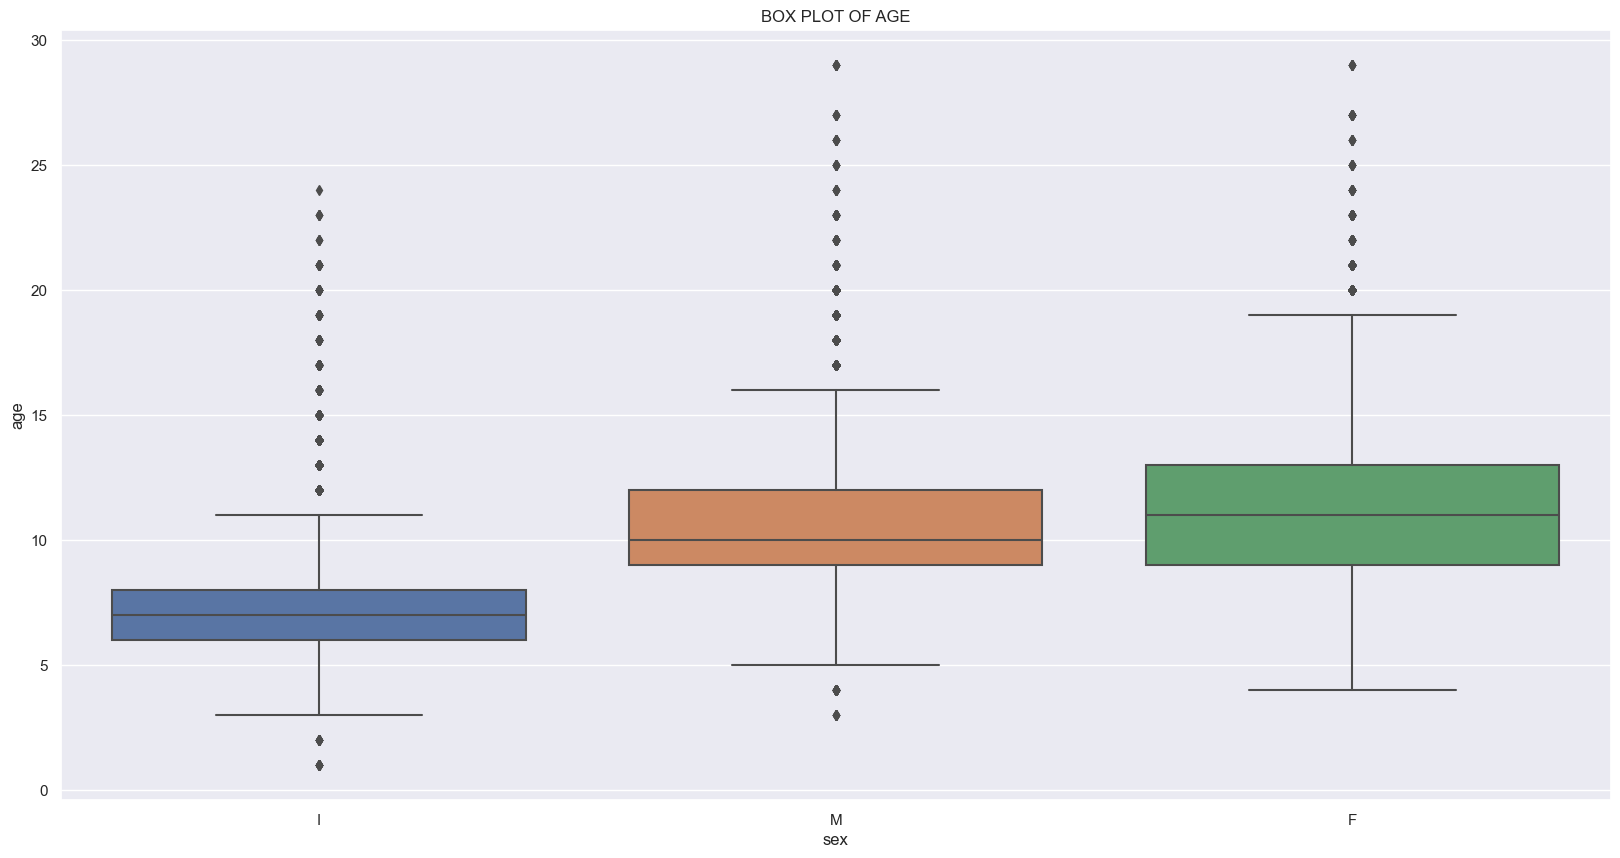

In [16]:
for col in numerical.columns:
    plt.figure(figsize=(20,10))
    plt.title(f"BOX PLOT OF {col}".upper())
    sns.boxplot(x=df['sex'], y=df[col])

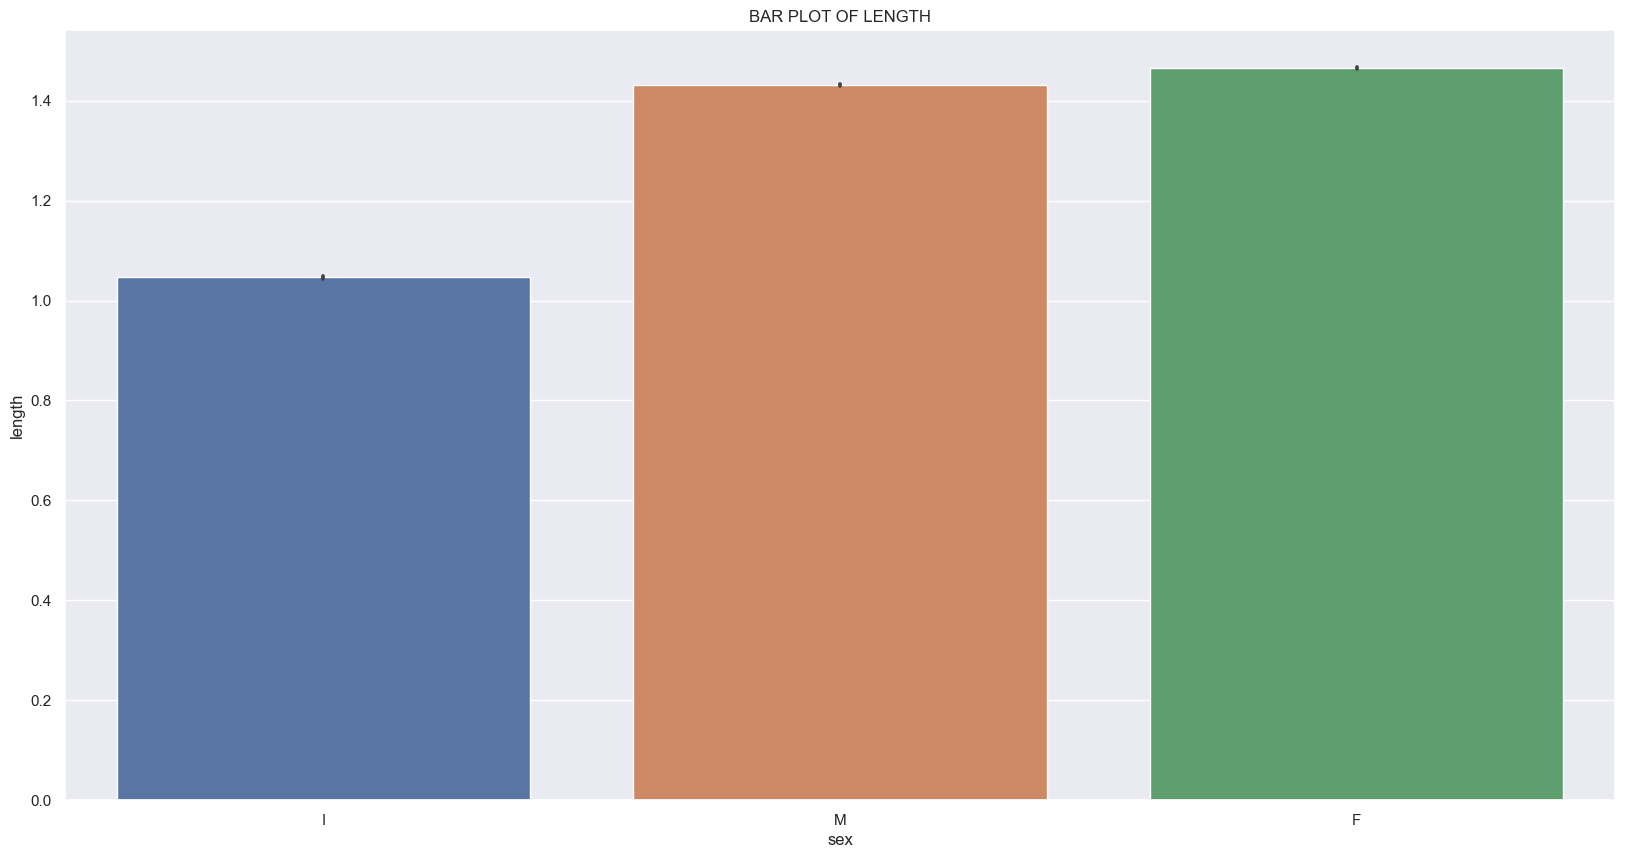

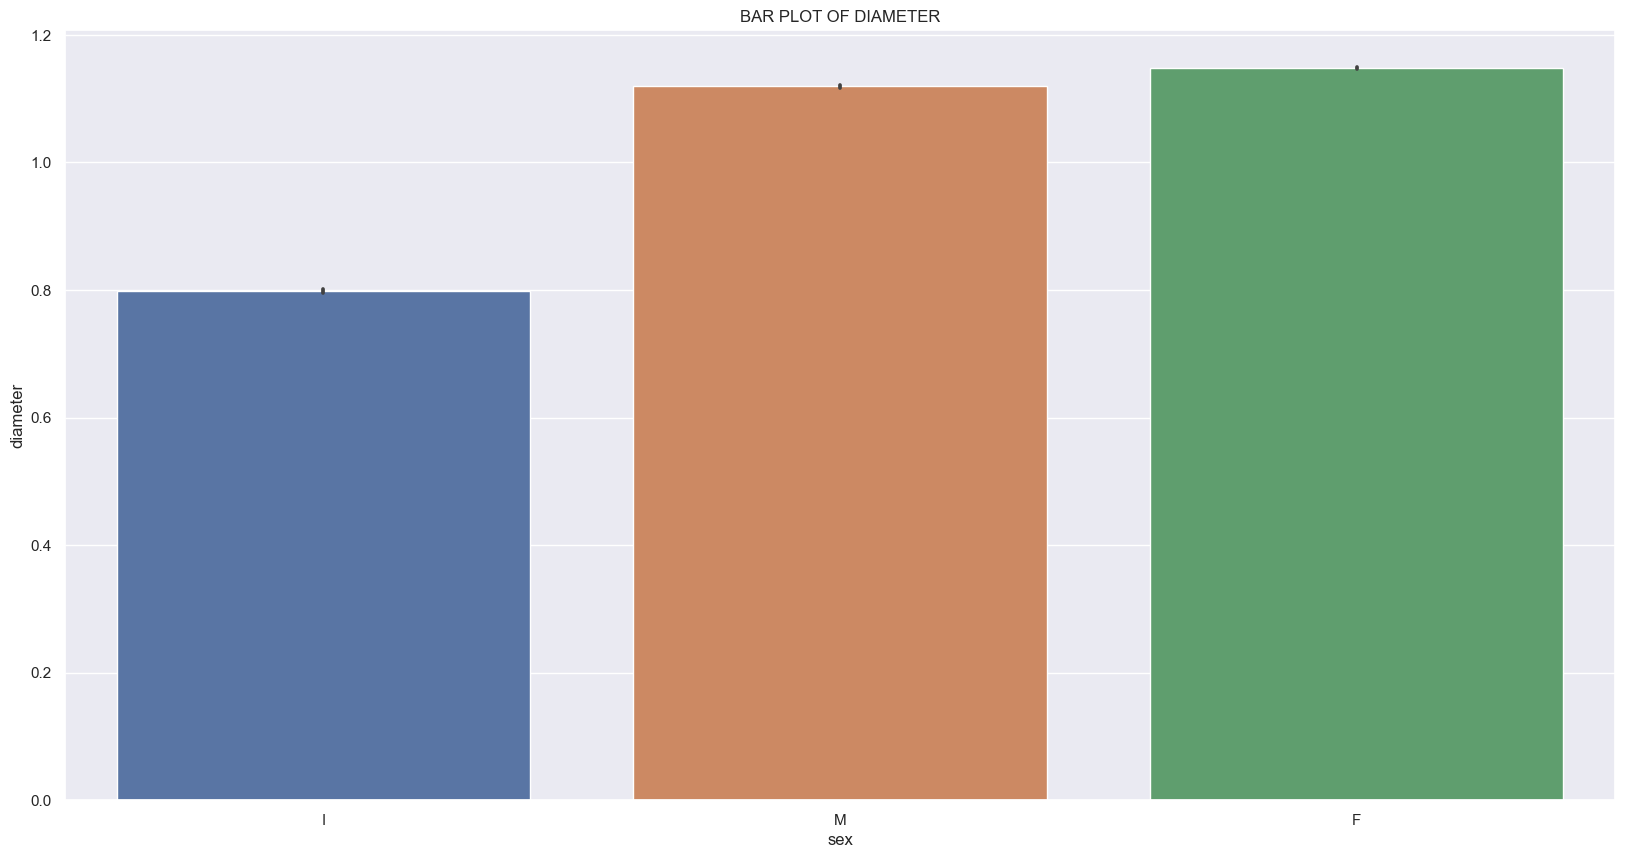

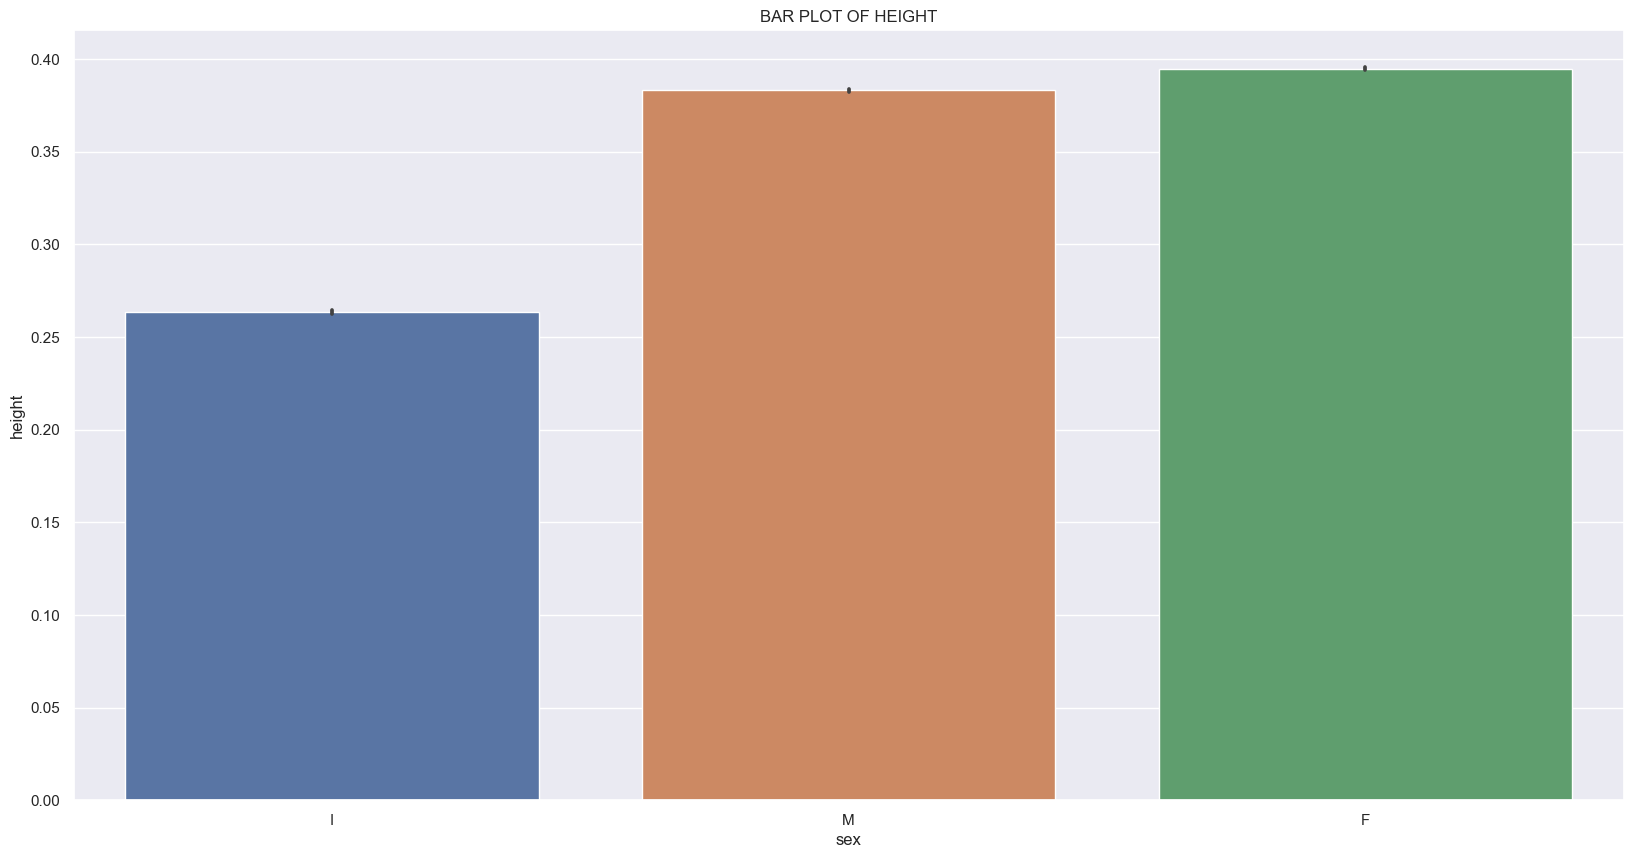

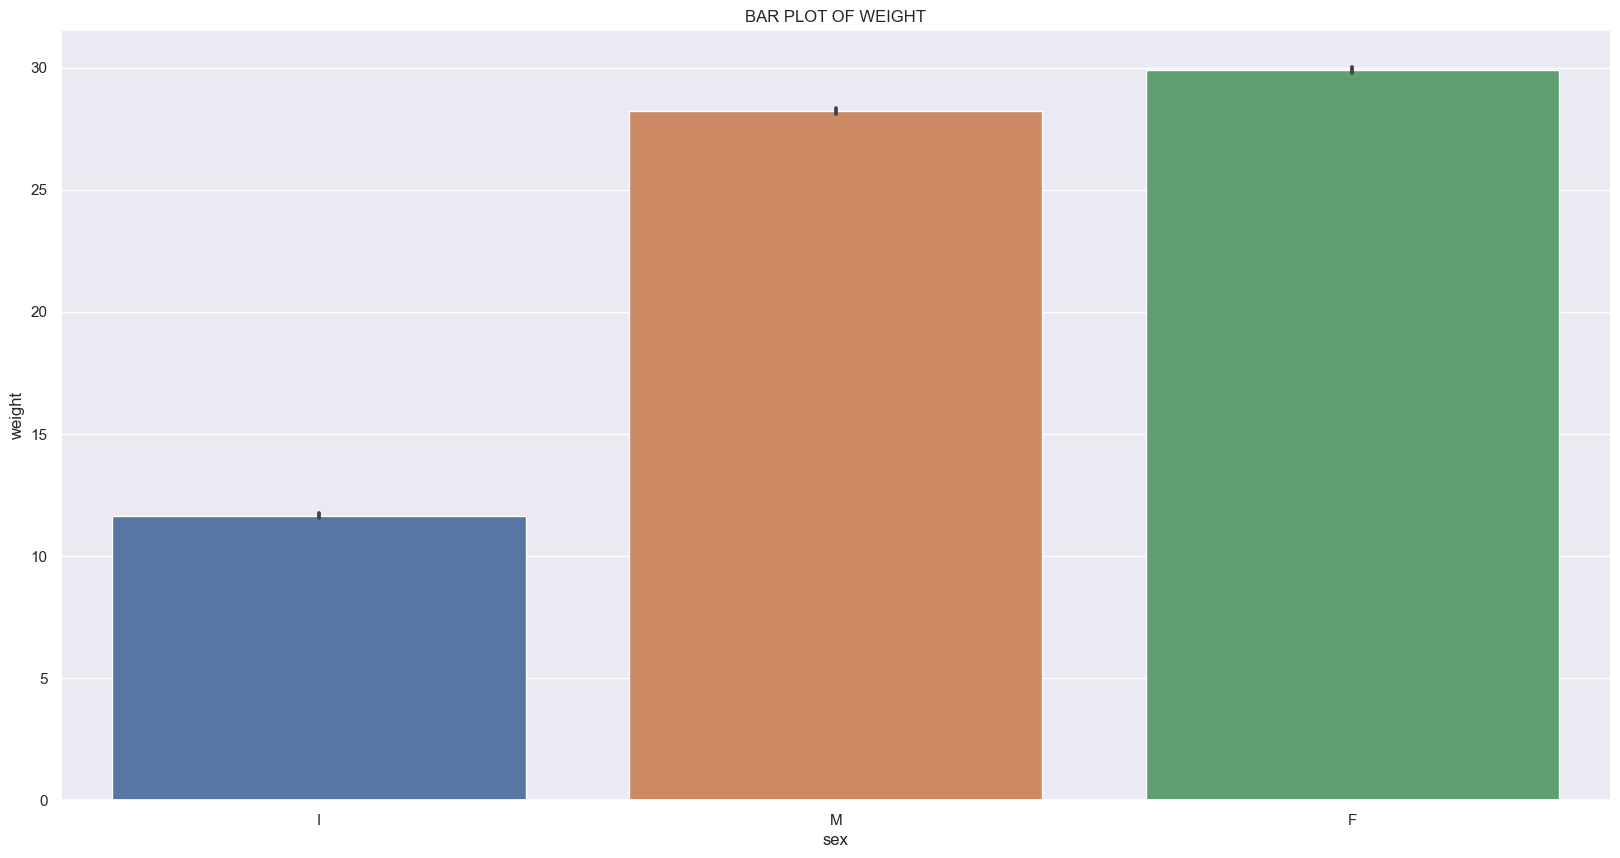

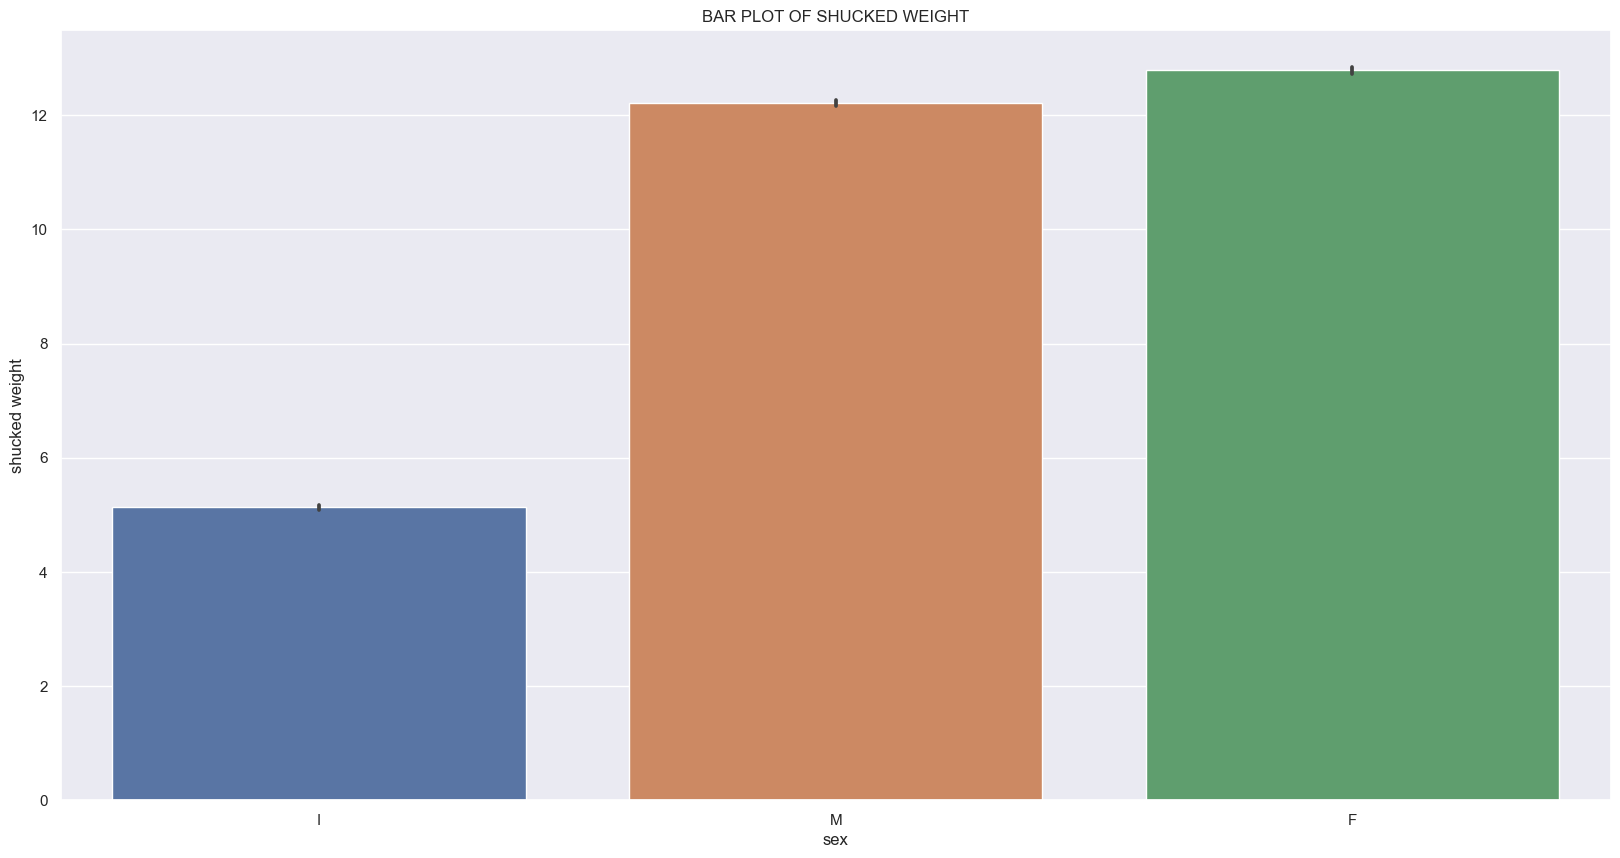

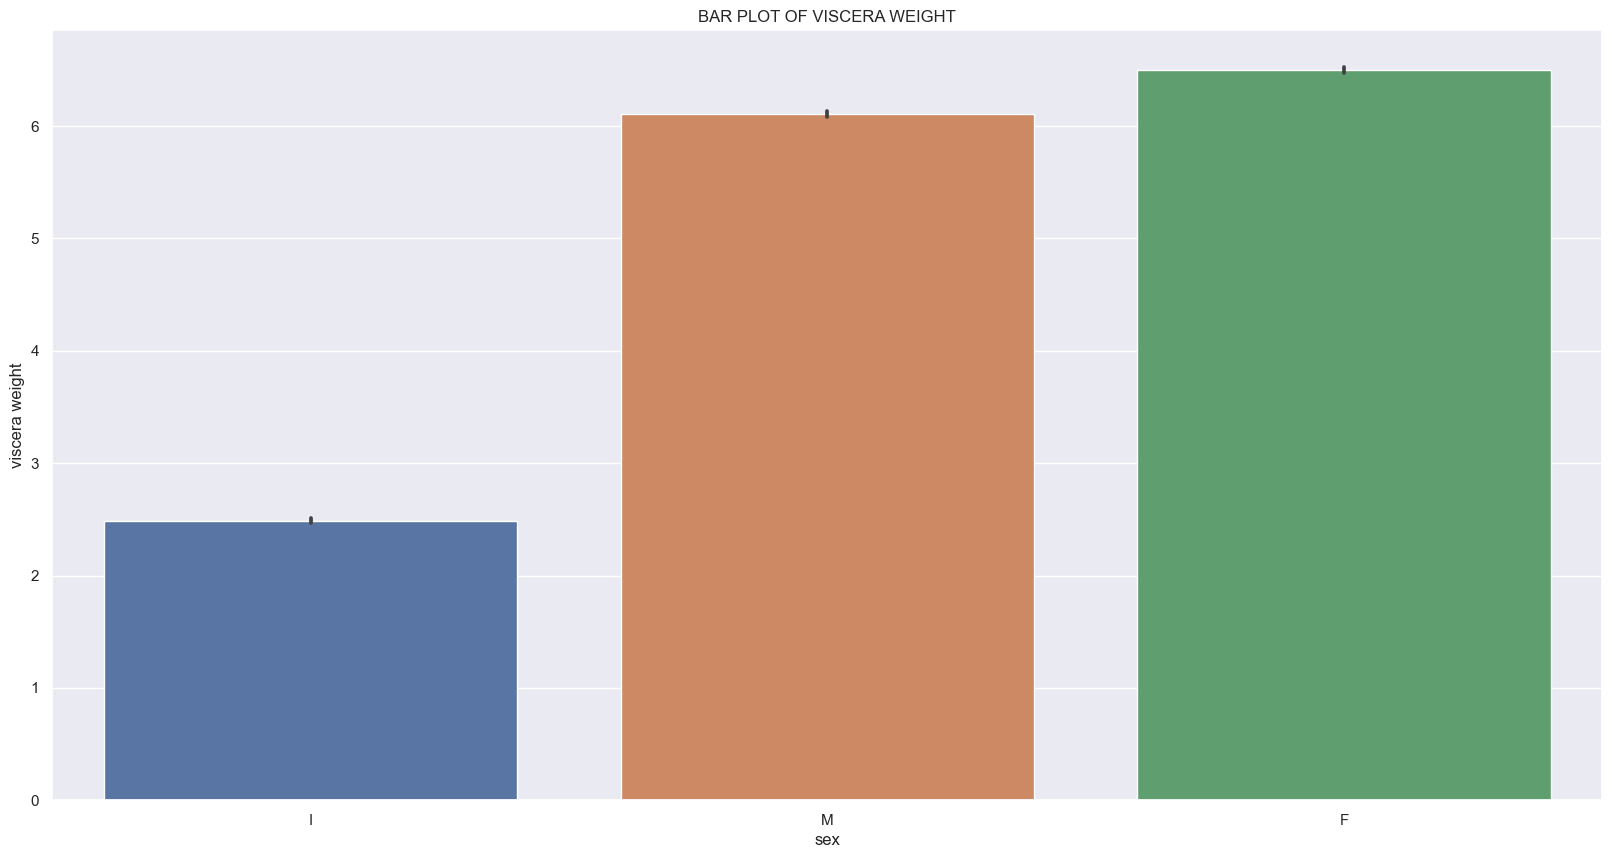

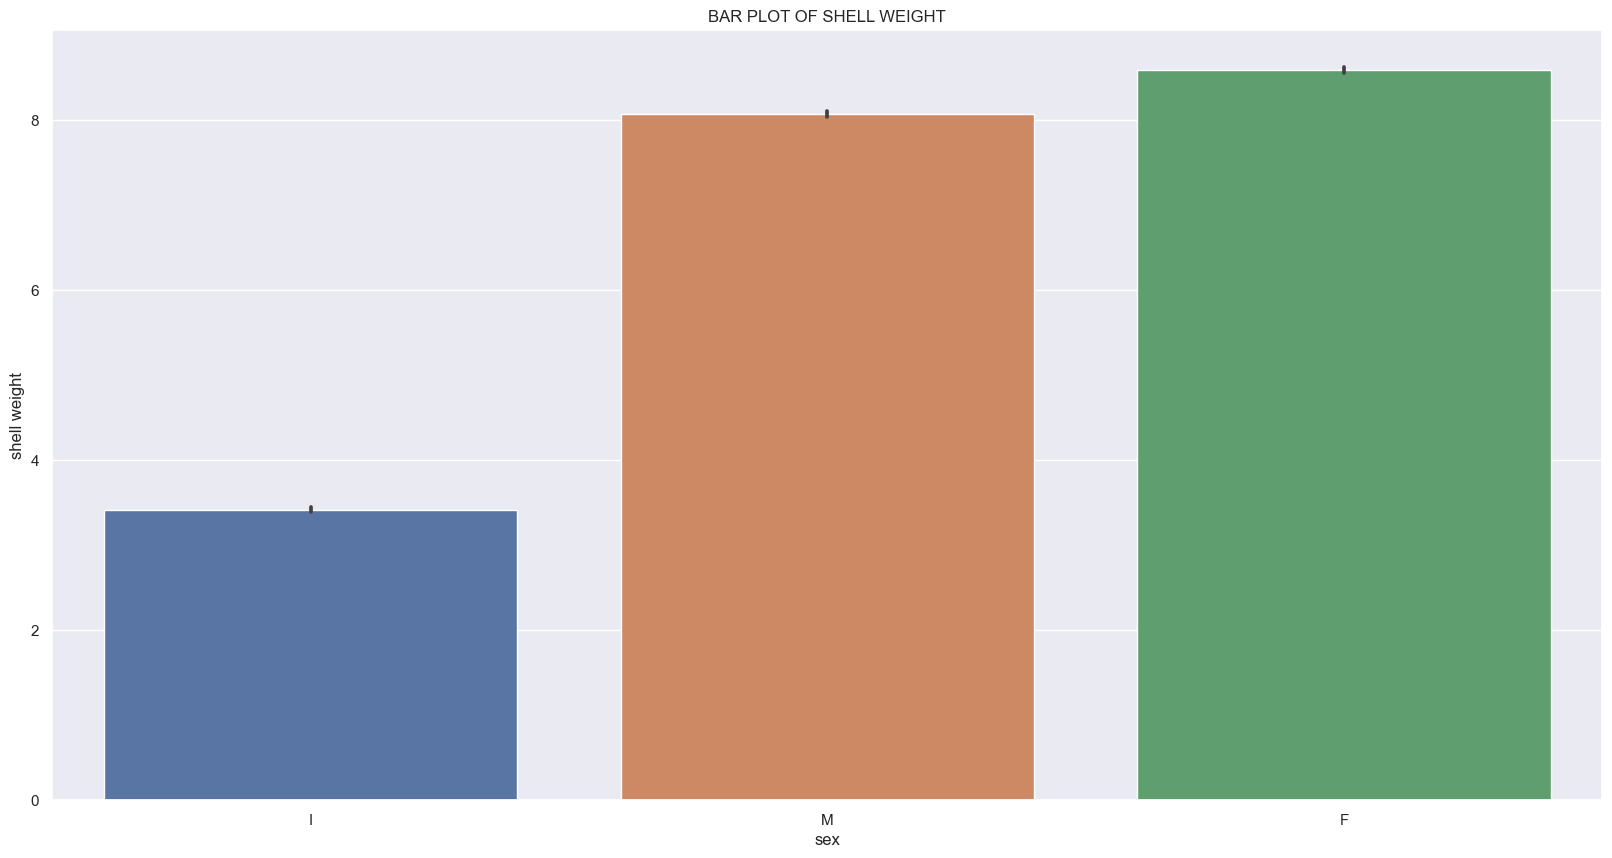

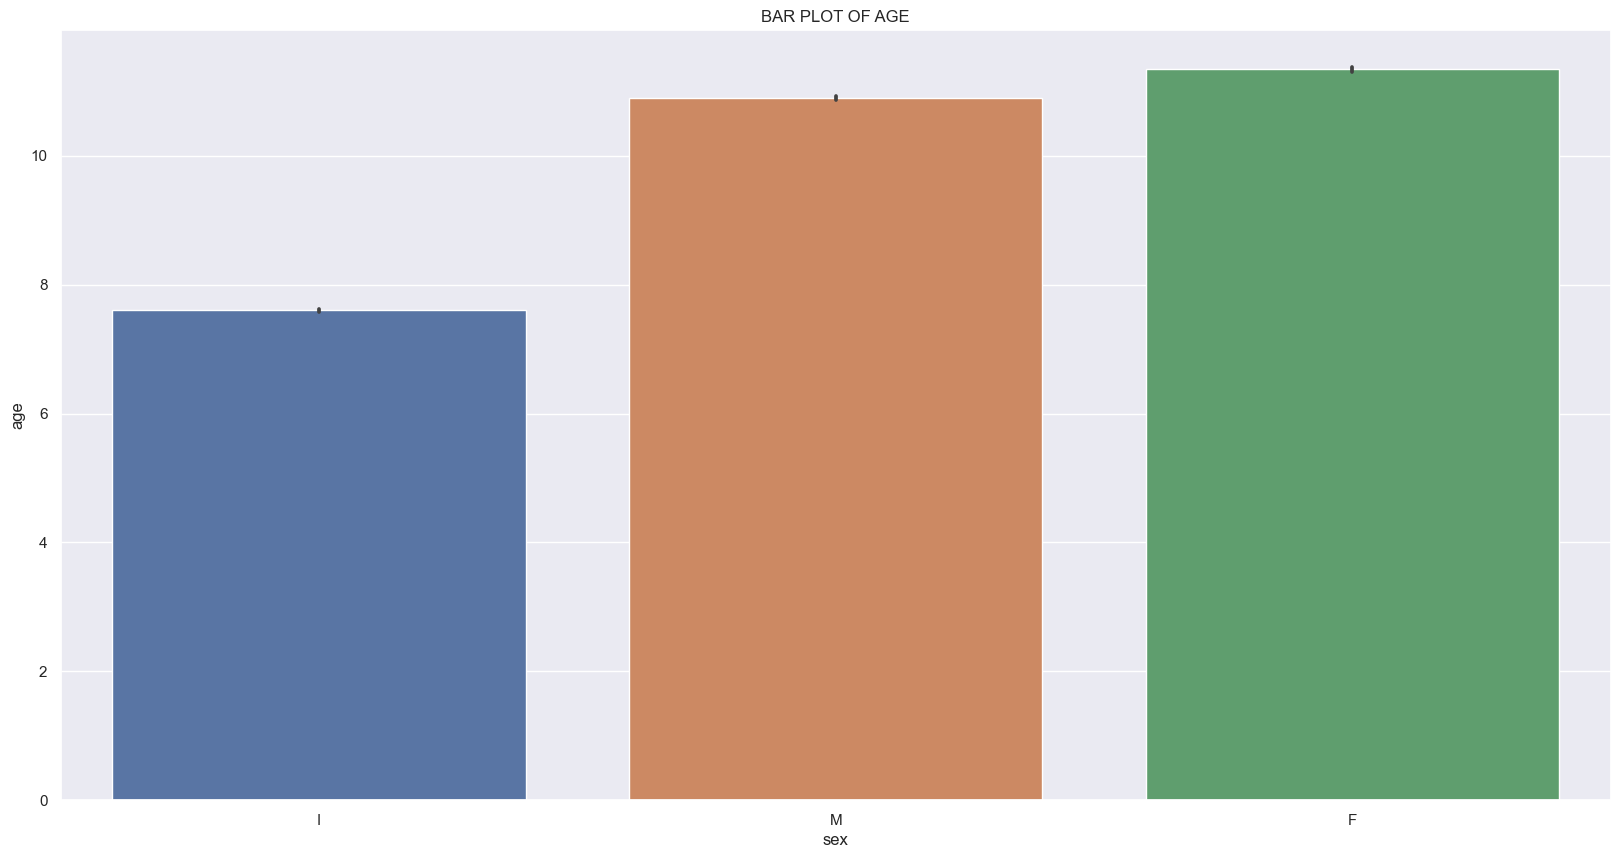

In [17]:
for col in numerical.columns:
    plt.figure(figsize=(20,10))
    plt.title(f"BAR PLOT OF {col}".upper())
    sns.barplot(x=df['sex'], y=df[col])

# FEATURE ENGINEERING

In [18]:
def feat_eng(data):
    data['total_height'] = data['length'] + data['height']
    data['bmi'] = data['total_height'] / (np.power(data['weight'], 2))
    data['viscera_weight']=data['viscera weight']
    data['shell_weight']=data['shell weight']
    data['shucked_weight'] =data['shucked weight']
    data['weight_to_sisceraWeight_ratio'] = data['weight'] / data['viscera_weight']
    data['weight_to_shellWeight_ratio'] = data['weight'] / data['shell_weight']
    data['weight_to_shuckedWeight_ratio'] = data['weight'] / data['shucked_weight']
    data['volume'] = data['length'] * data['diameter'] * data['height']
    data['density'] = data['weight'] / (data['volume'] +1 )
    data.drop(columns=['shell weight','viscera weight', 'shucked weight'], inplace = True)
    return data

    

In [19]:
df = feat_eng(df)
test = feat_eng(test)

In [26]:
df = pd.get_dummies(df)
test = pd.get_dummies(test)

In [27]:
scaler = StandardScaler()
###SPLITING INTO TRAIN AND TEST DATASET
X = df.drop(['age'], axis = 1 )
y = df['age']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 2000)



In [ ]:

###SCALIING THE DATA
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [28]:
###SET OF MODEL CHOOSE TO RUN 
model_dict = {
             "lgbm": LGBMRegressor(),
             'rdf' : RandomForestRegressor(),
             'hist': HistGradientBoostingRegressor(),
             "grde" : GradientBoostingRegressor(),
             'xgb': XGBRegressor(),
             'cat' : CatBoostRegressor()
              }

In [29]:
mse_list , Model, mae_list = [], [], []

for name, model in model_dict.items():
    
    Model.append(name)
    
    ###building the model
    model.fit(X_train, y_train)
    ### predicition
    y_pred = model.predict(X_test)

    ###mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    
    ##  mean_absolute_error score
    mae = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae)
    
result = pd.DataFrame ({"models": Model,
                     "mse_score": mse_list,
                       "mae_score" : mae_list} )   
                      

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 59240, number of used features: 17
[LightGBM] [Info] Start training from score 9.959993
Learning rate set to 0.078028
0:	learn: 3.0415243	total: 182ms	remaining: 3m 1s
1:	learn: 2.9315335	total: 207ms	remaining: 1m 43s
2:	learn: 2.8314925	total: 231ms	remaining: 1m 16s
3:	learn: 2.7423594	total: 263ms	remaining: 1m 5s
4:	learn: 2.6641249	total: 275ms	remaining: 54.7s
5:	learn: 2.5953957	total: 286ms	remaining: 47.5s
6:	learn: 2.5318334	total: 298ms	remaining: 42.3s
7:	learn: 2.4777502	total: 310ms	remaining: 38.4s
8:	learn: 2.4287072	total: 321ms	remaining: 35.4s
9:	learn: 2.3856168	total: 333ms	remaining: 32.9s
10:	learn: 2.3466016	total: 344ms	remaining: 30.9s
11:	learn: 2.3141510	total: 356ms	remaining: 29.3s
12:	learn: 2.2833617	tot

156:	learn: 2.0148569	total: 2.14s	remaining: 11.5s
157:	learn: 2.0144260	total: 2.16s	remaining: 11.5s
158:	learn: 2.0142902	total: 2.17s	remaining: 11.5s
159:	learn: 2.0139949	total: 2.18s	remaining: 11.4s
160:	learn: 2.0138911	total: 2.19s	remaining: 11.4s
161:	learn: 2.0134303	total: 2.2s	remaining: 11.4s
162:	learn: 2.0130507	total: 2.21s	remaining: 11.4s
163:	learn: 2.0128043	total: 2.22s	remaining: 11.3s
164:	learn: 2.0127415	total: 2.23s	remaining: 11.3s
165:	learn: 2.0124683	total: 2.24s	remaining: 11.3s
166:	learn: 2.0122469	total: 2.25s	remaining: 11.2s
167:	learn: 2.0119112	total: 2.26s	remaining: 11.2s
168:	learn: 2.0115641	total: 2.28s	remaining: 11.2s
169:	learn: 2.0114246	total: 2.29s	remaining: 11.2s
170:	learn: 2.0109717	total: 2.3s	remaining: 11.1s
171:	learn: 2.0108306	total: 2.31s	remaining: 11.1s
172:	learn: 2.0107219	total: 2.33s	remaining: 11.1s
173:	learn: 2.0103775	total: 2.34s	remaining: 11.1s
174:	learn: 2.0102003	total: 2.36s	remaining: 11.1s
175:	learn: 2.

319:	learn: 1.9748554	total: 4.03s	remaining: 8.57s
320:	learn: 1.9745435	total: 4.05s	remaining: 8.57s
321:	learn: 1.9744545	total: 4.06s	remaining: 8.55s
322:	learn: 1.9741426	total: 4.07s	remaining: 8.54s
323:	learn: 1.9740018	total: 4.08s	remaining: 8.52s
324:	learn: 1.9737225	total: 4.09s	remaining: 8.51s
325:	learn: 1.9734149	total: 4.11s	remaining: 8.49s
326:	learn: 1.9732440	total: 4.12s	remaining: 8.48s
327:	learn: 1.9730882	total: 4.13s	remaining: 8.46s
328:	learn: 1.9727461	total: 4.14s	remaining: 8.45s
329:	learn: 1.9724928	total: 4.15s	remaining: 8.44s
330:	learn: 1.9723805	total: 4.17s	remaining: 8.42s
331:	learn: 1.9721319	total: 4.18s	remaining: 8.4s
332:	learn: 1.9717865	total: 4.19s	remaining: 8.39s
333:	learn: 1.9715832	total: 4.2s	remaining: 8.37s
334:	learn: 1.9712704	total: 4.21s	remaining: 8.36s
335:	learn: 1.9711889	total: 4.22s	remaining: 8.34s
336:	learn: 1.9708478	total: 4.23s	remaining: 8.33s
337:	learn: 1.9705348	total: 4.25s	remaining: 8.32s
338:	learn: 1.

478:	learn: 1.9403451	total: 5.92s	remaining: 6.44s
479:	learn: 1.9400834	total: 5.93s	remaining: 6.43s
480:	learn: 1.9399038	total: 5.95s	remaining: 6.42s
481:	learn: 1.9395852	total: 5.96s	remaining: 6.4s
482:	learn: 1.9393700	total: 5.97s	remaining: 6.39s
483:	learn: 1.9393163	total: 5.98s	remaining: 6.38s
484:	learn: 1.9391248	total: 5.99s	remaining: 6.36s
485:	learn: 1.9389400	total: 6s	remaining: 6.35s
486:	learn: 1.9387828	total: 6.01s	remaining: 6.33s
487:	learn: 1.9384964	total: 6.03s	remaining: 6.32s
488:	learn: 1.9384588	total: 6.04s	remaining: 6.31s
489:	learn: 1.9382284	total: 6.04s	remaining: 6.29s
490:	learn: 1.9380253	total: 6.06s	remaining: 6.28s
491:	learn: 1.9378740	total: 6.07s	remaining: 6.27s
492:	learn: 1.9376006	total: 6.08s	remaining: 6.25s
493:	learn: 1.9374321	total: 6.09s	remaining: 6.24s
494:	learn: 1.9372555	total: 6.1s	remaining: 6.23s
495:	learn: 1.9370916	total: 6.11s	remaining: 6.21s
496:	learn: 1.9370458	total: 6.12s	remaining: 6.2s
497:	learn: 1.9367

637:	learn: 1.9108420	total: 7.83s	remaining: 4.44s
638:	learn: 1.9107143	total: 7.84s	remaining: 4.43s
639:	learn: 1.9105115	total: 7.85s	remaining: 4.42s
640:	learn: 1.9102956	total: 7.87s	remaining: 4.41s
641:	learn: 1.9100365	total: 7.88s	remaining: 4.39s
642:	learn: 1.9098628	total: 7.89s	remaining: 4.38s
643:	learn: 1.9096508	total: 7.9s	remaining: 4.37s
644:	learn: 1.9094585	total: 7.91s	remaining: 4.36s
645:	learn: 1.9092216	total: 7.93s	remaining: 4.34s
646:	learn: 1.9090241	total: 7.94s	remaining: 4.33s
647:	learn: 1.9088865	total: 7.95s	remaining: 4.32s
648:	learn: 1.9086082	total: 7.96s	remaining: 4.31s
649:	learn: 1.9084123	total: 7.97s	remaining: 4.29s
650:	learn: 1.9081720	total: 7.99s	remaining: 4.28s
651:	learn: 1.9078472	total: 8s	remaining: 4.27s
652:	learn: 1.9075904	total: 8.01s	remaining: 4.25s
653:	learn: 1.9073384	total: 8.02s	remaining: 4.24s
654:	learn: 1.9070948	total: 8.03s	remaining: 4.23s
655:	learn: 1.9069458	total: 8.05s	remaining: 4.22s
656:	learn: 1.90

796:	learn: 1.8837732	total: 9.74s	remaining: 2.48s
797:	learn: 1.8836094	total: 9.76s	remaining: 2.47s
798:	learn: 1.8835006	total: 9.77s	remaining: 2.46s
799:	learn: 1.8833587	total: 9.78s	remaining: 2.44s
800:	learn: 1.8831465	total: 9.79s	remaining: 2.43s
801:	learn: 1.8829573	total: 9.8s	remaining: 2.42s
802:	learn: 1.8828153	total: 9.82s	remaining: 2.41s
803:	learn: 1.8827058	total: 9.83s	remaining: 2.4s
804:	learn: 1.8824643	total: 9.84s	remaining: 2.38s
805:	learn: 1.8822439	total: 9.85s	remaining: 2.37s
806:	learn: 1.8820943	total: 9.86s	remaining: 2.36s
807:	learn: 1.8819997	total: 9.87s	remaining: 2.35s
808:	learn: 1.8818988	total: 9.88s	remaining: 2.33s
809:	learn: 1.8817378	total: 9.89s	remaining: 2.32s
810:	learn: 1.8815626	total: 9.9s	remaining: 2.31s
811:	learn: 1.8814451	total: 9.92s	remaining: 2.3s
812:	learn: 1.8813016	total: 9.93s	remaining: 2.28s
813:	learn: 1.8811454	total: 9.94s	remaining: 2.27s
814:	learn: 1.8810269	total: 9.95s	remaining: 2.26s
815:	learn: 1.88

955:	learn: 1.8586513	total: 11.7s	remaining: 536ms
956:	learn: 1.8584679	total: 11.7s	remaining: 524ms
957:	learn: 1.8583168	total: 11.7s	remaining: 512ms
958:	learn: 1.8581518	total: 11.7s	remaining: 500ms
959:	learn: 1.8580568	total: 11.7s	remaining: 488ms
960:	learn: 1.8578868	total: 11.7s	remaining: 476ms
961:	learn: 1.8578327	total: 11.7s	remaining: 464ms
962:	learn: 1.8577122	total: 11.8s	remaining: 451ms
963:	learn: 1.8574915	total: 11.8s	remaining: 439ms
964:	learn: 1.8573724	total: 11.8s	remaining: 427ms
965:	learn: 1.8572637	total: 11.8s	remaining: 415ms
966:	learn: 1.8571488	total: 11.8s	remaining: 403ms
967:	learn: 1.8569733	total: 11.8s	remaining: 390ms
968:	learn: 1.8567503	total: 11.8s	remaining: 378ms
969:	learn: 1.8565522	total: 11.8s	remaining: 366ms
970:	learn: 1.8565115	total: 11.8s	remaining: 354ms
971:	learn: 1.8563115	total: 11.9s	remaining: 342ms
972:	learn: 1.8561665	total: 11.9s	remaining: 330ms
973:	learn: 1.8560991	total: 11.9s	remaining: 317ms
974:	learn: 

In [30]:
result

,models,mse_score,mae_score
0,lgbm,4.266260,1.417664
1,rdf,4.487786,1.475664
2,hist,4.270519,1.418508
3,grde,4.272827,1.422317
4,xgb,4.395175,1.438470
5,cat,4.284279,1.420105


# LIGHTGBM BASELINE 

In [31]:
lgb = LGBMRegressor(random_state=2000)
lgb.fit(X_train, y_train)
y_predict = lgb.predict(X_test)
score = mean_absolute_error(y_test, y_pred)
score

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3023
[LightGBM] [Info] Number of data points in the train set: 59240, number of used features: 17
[LightGBM] [Info] Start training from score 9.959993


1.420104775503634

<Figure size 2000x1000 with 0 Axes>

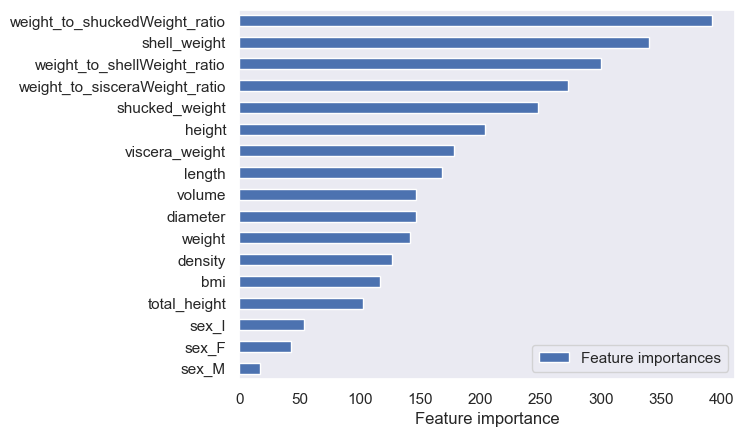

In [32]:
df_features = pd.DataFrame(lgb.feature_importances_, index=X.columns, columns=['Feature importances'])
df_features = df_features.sort_values('Feature importances')
plt.figure(figsize=(20,10))
df_features.plot(kind='barh')
plt.grid()
plt.xlabel('Feature importance')
plt.show()

# CATBOOST BASELINE

In [33]:
cat = CatBoostRegressor()
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
score_cat = mean_absolute_error(y_test, y_pred_cat)
score_cat    

Learning rate set to 0.078028
0:	learn: 3.0415243	total: 11.8ms	remaining: 11.8s
1:	learn: 2.9315335	total: 22.9ms	remaining: 11.4s
2:	learn: 2.8314925	total: 33.4ms	remaining: 11.1s
3:	learn: 2.7423594	total: 44.2ms	remaining: 11s
4:	learn: 2.6641249	total: 54.9ms	remaining: 10.9s
5:	learn: 2.5953957	total: 65.4ms	remaining: 10.8s
6:	learn: 2.5318334	total: 76.5ms	remaining: 10.8s
7:	learn: 2.4777502	total: 87.6ms	remaining: 10.9s
8:	learn: 2.4287072	total: 98.3ms	remaining: 10.8s
9:	learn: 2.3856168	total: 109ms	remaining: 10.8s
10:	learn: 2.3466016	total: 120ms	remaining: 10.8s
11:	learn: 2.3141510	total: 130ms	remaining: 10.7s
12:	learn: 2.2833617	total: 141ms	remaining: 10.7s
13:	learn: 2.2572223	total: 153ms	remaining: 10.8s
14:	learn: 2.2352931	total: 164ms	remaining: 10.7s
15:	learn: 2.2142566	total: 174ms	remaining: 10.7s
16:	learn: 2.1963902	total: 185ms	remaining: 10.7s
17:	learn: 2.1809094	total: 196ms	remaining: 10.7s
18:	learn: 2.1661401	total: 210ms	remaining: 10.8s
19:	

161:	learn: 2.0134303	total: 1.86s	remaining: 9.6s
162:	learn: 2.0130507	total: 1.87s	remaining: 9.61s
163:	learn: 2.0128043	total: 1.88s	remaining: 9.6s
164:	learn: 2.0127415	total: 1.89s	remaining: 9.59s
165:	learn: 2.0124683	total: 1.91s	remaining: 9.61s
166:	learn: 2.0122469	total: 1.93s	remaining: 9.63s
167:	learn: 2.0119112	total: 1.94s	remaining: 9.63s
168:	learn: 2.0115641	total: 1.96s	remaining: 9.62s
169:	learn: 2.0114246	total: 1.97s	remaining: 9.59s
170:	learn: 2.0109717	total: 1.98s	remaining: 9.58s
171:	learn: 2.0108306	total: 1.99s	remaining: 9.56s
172:	learn: 2.0107219	total: 2s	remaining: 9.54s
173:	learn: 2.0103775	total: 2.01s	remaining: 9.53s
174:	learn: 2.0102003	total: 2.02s	remaining: 9.51s
175:	learn: 2.0100470	total: 2.03s	remaining: 9.49s
176:	learn: 2.0096396	total: 2.04s	remaining: 9.47s
177:	learn: 2.0093611	total: 2.05s	remaining: 9.45s
178:	learn: 2.0091355	total: 2.06s	remaining: 9.43s
179:	learn: 2.0090468	total: 2.07s	remaining: 9.42s
180:	learn: 2.008

327:	learn: 1.9730882	total: 3.76s	remaining: 7.71s
328:	learn: 1.9727461	total: 3.78s	remaining: 7.71s
329:	learn: 1.9724928	total: 3.79s	remaining: 7.7s
330:	learn: 1.9723805	total: 3.8s	remaining: 7.68s
331:	learn: 1.9721319	total: 3.81s	remaining: 7.67s
332:	learn: 1.9717865	total: 3.82s	remaining: 7.66s
333:	learn: 1.9715832	total: 3.83s	remaining: 7.64s
334:	learn: 1.9712704	total: 3.85s	remaining: 7.63s
335:	learn: 1.9711889	total: 3.86s	remaining: 7.62s
336:	learn: 1.9708478	total: 3.87s	remaining: 7.61s
337:	learn: 1.9705348	total: 3.88s	remaining: 7.6s
338:	learn: 1.9701069	total: 3.89s	remaining: 7.59s
339:	learn: 1.9699257	total: 3.9s	remaining: 7.58s
340:	learn: 1.9696374	total: 3.92s	remaining: 7.57s
341:	learn: 1.9692999	total: 3.93s	remaining: 7.57s
342:	learn: 1.9690655	total: 3.95s	remaining: 7.56s
343:	learn: 1.9688210	total: 3.96s	remaining: 7.56s
344:	learn: 1.9685308	total: 3.98s	remaining: 7.56s
345:	learn: 1.9684112	total: 4s	remaining: 7.56s
346:	learn: 1.96813

488:	learn: 1.9384588	total: 5.66s	remaining: 5.91s
489:	learn: 1.9382284	total: 5.67s	remaining: 5.9s
490:	learn: 1.9380253	total: 5.68s	remaining: 5.89s
491:	learn: 1.9378740	total: 5.7s	remaining: 5.88s
492:	learn: 1.9376006	total: 5.71s	remaining: 5.87s
493:	learn: 1.9374321	total: 5.72s	remaining: 5.86s
494:	learn: 1.9372555	total: 5.73s	remaining: 5.85s
495:	learn: 1.9370916	total: 5.74s	remaining: 5.83s
496:	learn: 1.9370458	total: 5.75s	remaining: 5.82s
497:	learn: 1.9367385	total: 5.76s	remaining: 5.81s
498:	learn: 1.9366487	total: 5.77s	remaining: 5.8s
499:	learn: 1.9363619	total: 5.79s	remaining: 5.79s
500:	learn: 1.9362382	total: 5.8s	remaining: 5.78s
501:	learn: 1.9361633	total: 5.81s	remaining: 5.76s
502:	learn: 1.9359482	total: 5.82s	remaining: 5.75s
503:	learn: 1.9355775	total: 5.84s	remaining: 5.74s
504:	learn: 1.9353232	total: 5.85s	remaining: 5.73s
505:	learn: 1.9352503	total: 5.86s	remaining: 5.72s
506:	learn: 1.9350413	total: 5.88s	remaining: 5.71s
507:	learn: 1.93

648:	learn: 1.9086082	total: 7.55s	remaining: 4.09s
649:	learn: 1.9084123	total: 7.57s	remaining: 4.08s
650:	learn: 1.9081720	total: 7.58s	remaining: 4.07s
651:	learn: 1.9078472	total: 7.6s	remaining: 4.05s
652:	learn: 1.9075904	total: 7.61s	remaining: 4.04s
653:	learn: 1.9073384	total: 7.62s	remaining: 4.03s
654:	learn: 1.9070948	total: 7.63s	remaining: 4.02s
655:	learn: 1.9069458	total: 7.64s	remaining: 4.01s
656:	learn: 1.9068001	total: 7.65s	remaining: 4s
657:	learn: 1.9066371	total: 7.66s	remaining: 3.98s
658:	learn: 1.9065026	total: 7.67s	remaining: 3.97s
659:	learn: 1.9063601	total: 7.68s	remaining: 3.96s
660:	learn: 1.9061513	total: 7.7s	remaining: 3.95s
661:	learn: 1.9059651	total: 7.71s	remaining: 3.94s
662:	learn: 1.9058132	total: 7.72s	remaining: 3.92s
663:	learn: 1.9055695	total: 7.73s	remaining: 3.91s
664:	learn: 1.9054488	total: 7.74s	remaining: 3.9s
665:	learn: 1.9052310	total: 7.75s	remaining: 3.89s
666:	learn: 1.9050272	total: 7.77s	remaining: 3.88s
667:	learn: 1.9048

809:	learn: 1.8817378	total: 9.45s	remaining: 2.22s
810:	learn: 1.8815626	total: 9.47s	remaining: 2.21s
811:	learn: 1.8814451	total: 9.48s	remaining: 2.19s
812:	learn: 1.8813016	total: 9.49s	remaining: 2.18s
813:	learn: 1.8811454	total: 9.51s	remaining: 2.17s
814:	learn: 1.8810269	total: 9.52s	remaining: 2.16s
815:	learn: 1.8809008	total: 9.53s	remaining: 2.15s
816:	learn: 1.8806636	total: 9.54s	remaining: 2.14s
817:	learn: 1.8804287	total: 9.55s	remaining: 2.13s
818:	learn: 1.8803193	total: 9.56s	remaining: 2.11s
819:	learn: 1.8802774	total: 9.57s	remaining: 2.1s
820:	learn: 1.8801228	total: 9.58s	remaining: 2.09s
821:	learn: 1.8800054	total: 9.6s	remaining: 2.08s
822:	learn: 1.8799596	total: 9.61s	remaining: 2.06s
823:	learn: 1.8798398	total: 9.62s	remaining: 2.05s
824:	learn: 1.8796409	total: 9.63s	remaining: 2.04s
825:	learn: 1.8794181	total: 9.64s	remaining: 2.03s
826:	learn: 1.8791396	total: 9.65s	remaining: 2.02s
827:	learn: 1.8789020	total: 9.67s	remaining: 2.01s
828:	learn: 1.

969:	learn: 1.8565522	total: 11.4s	remaining: 352ms
970:	learn: 1.8565115	total: 11.4s	remaining: 340ms
971:	learn: 1.8563115	total: 11.4s	remaining: 328ms
972:	learn: 1.8561665	total: 11.4s	remaining: 316ms
973:	learn: 1.8560991	total: 11.4s	remaining: 305ms
974:	learn: 1.8558501	total: 11.4s	remaining: 293ms
975:	learn: 1.8555967	total: 11.4s	remaining: 281ms
976:	learn: 1.8554547	total: 11.5s	remaining: 270ms
977:	learn: 1.8553289	total: 11.5s	remaining: 258ms
978:	learn: 1.8551825	total: 11.5s	remaining: 246ms
979:	learn: 1.8550913	total: 11.5s	remaining: 234ms
980:	learn: 1.8550076	total: 11.5s	remaining: 223ms
981:	learn: 1.8549403	total: 11.5s	remaining: 211ms
982:	learn: 1.8547866	total: 11.5s	remaining: 199ms
983:	learn: 1.8547226	total: 11.5s	remaining: 187ms
984:	learn: 1.8546129	total: 11.5s	remaining: 176ms
985:	learn: 1.8544973	total: 11.6s	remaining: 164ms
986:	learn: 1.8542895	total: 11.6s	remaining: 152ms
987:	learn: 1.8541230	total: 11.6s	remaining: 141ms
988:	learn: 

1.420104775503634

<Figure size 2000x1000 with 0 Axes>

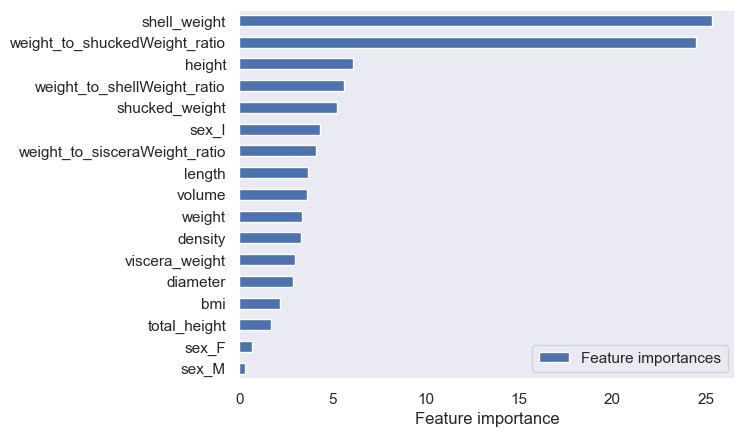

In [34]:
df_features = pd.DataFrame(cat.feature_importances_, index=X.columns, columns=['Feature importances'])
df_features = df_features.sort_values('Feature importances')
plt.figure(figsize=(20,10))
df_features.plot(kind='barh')
plt.grid()
plt.xlabel('Feature importance')
plt.show()

# HYPERPARAMETER TURNING

In [36]:
best =   {'n_estimators': 913,
          'learning_rate': 0.008589179351541005, 
          'max_depth': 9, 
          'subsample': 0.8747703110784797, 
          'leaf_estimation_iterations': 14, 
          'colsample_bylevel': 0.770384447907098,
          'min_data_in_leaf': 15, 
          'l2_leaf_reg': 1.0828580033718116, 
          'grow_policy': 'Depthwise',
          'random_strength': 0.34374673634137554}

CatBoost Best Hyperparameters:  {'n_estimators': 913, 'learning_rate': 0.008589179351541005, 'max_depth': 9, 'subsample': 0.8747703110784797, 'leaf_estimation_iterations': 14, 'colsample_bylevel': 0.770384447907098, 'min_data_in_leaf': 15, 'l2_leaf_reg': 1.0828580033718116, 'grow_policy': 'Depthwise', 'random_strength': 0.34374673634137554}
CatBoost Best MEAN ABSOLUTE ERROR Score:  1.3722315988721945


In [38]:
# KFold
kf = KFold(n_splits= 10, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]


    
  
    model = CatBoostRegressor(**best)

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],early_stopping_rounds=100 )

    # predictions on the validation set
    y_val_pred_prob = model.predict(X_val)
    y_train_pred_prob = model.predict(X_train)
    
    TP = model.predict(test)
        

    # Evaluating the model
    
    roc_auc = mean_absolute_error(y_val, y_val_pred_prob)
    roc_auc1 = mean_absolute_error(y_train, y_train_pred_prob)
    print(f'Fold {fold + 1}, MAE Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, MAE Score on TRAINING Set: {roc_auc1}')
    print('-'*70)

    # results
    cv_results.append(roc_auc)

# average cross-validation result
average_cv_result = sum(cv_results) / 10
print(f'\nAverage MAE-score across {10} folds: {average_cv_result}')


0:	learn: 3.1541730	test: 3.1949881	best: 3.1949881 (0)	total: 147ms	remaining: 2m 14s
1:	learn: 3.1387537	test: 3.1795221	best: 3.1795221 (1)	total: 278ms	remaining: 2m 6s
2:	learn: 3.1235475	test: 3.1641915	best: 3.1641915 (2)	total: 412ms	remaining: 2m 4s
3:	learn: 3.1084148	test: 3.1490135	best: 3.1490135 (3)	total: 542ms	remaining: 2m 3s
4:	learn: 3.0935329	test: 3.1339597	best: 3.1339597 (4)	total: 673ms	remaining: 2m 2s
5:	learn: 3.0787892	test: 3.1190493	best: 3.1190493 (5)	total: 804ms	remaining: 2m 1s
6:	learn: 3.0641805	test: 3.1044097	best: 3.1044097 (6)	total: 935ms	remaining: 2m 1s
7:	learn: 3.0497740	test: 3.0898000	best: 3.0898000 (7)	total: 1.06s	remaining: 2m
8:	learn: 3.0355533	test: 3.0754558	best: 3.0754558 (8)	total: 1.21s	remaining: 2m 1s
9:	learn: 3.0215184	test: 3.0613380	best: 3.0613380 (9)	total: 1.32s	remaining: 1m 59s
10:	learn: 3.0077039	test: 3.0474299	best: 3.0474299 (10)	total: 1.45s	remaining: 1m 58s
11:	learn: 2.9939009	test: 3.0334894	best: 3.0334894

94:	learn: 2.2890353	test: 2.3222902	best: 2.3222902 (94)	total: 13.2s	remaining: 1m 53s
95:	learn: 2.2843195	test: 2.3175394	best: 2.3175394 (95)	total: 13.3s	remaining: 1m 53s
96:	learn: 2.2797306	test: 2.3128530	best: 2.3128530 (96)	total: 13.5s	remaining: 1m 53s
97:	learn: 2.2751570	test: 2.3082667	best: 2.3082667 (97)	total: 13.7s	remaining: 1m 53s
98:	learn: 2.2706130	test: 2.3036353	best: 2.3036353 (98)	total: 13.8s	remaining: 1m 53s
99:	learn: 2.2661740	test: 2.2991209	best: 2.2991209 (99)	total: 13.9s	remaining: 1m 53s
100:	learn: 2.2617107	test: 2.2945978	best: 2.2945978 (100)	total: 14.1s	remaining: 1m 53s
101:	learn: 2.2574258	test: 2.2902798	best: 2.2902798 (101)	total: 14.3s	remaining: 1m 53s
102:	learn: 2.2530606	test: 2.2858368	best: 2.2858368 (102)	total: 14.4s	remaining: 1m 53s
103:	learn: 2.2489053	test: 2.2816201	best: 2.2816201 (103)	total: 14.6s	remaining: 1m 53s
104:	learn: 2.2447746	test: 2.2774074	best: 2.2774074 (104)	total: 14.7s	remaining: 1m 53s
105:	learn:

185:	learn: 2.0359391	test: 2.0663943	best: 2.0663943 (185)	total: 27s	remaining: 1m 45s
186:	learn: 2.0344948	test: 2.0649811	best: 2.0649811 (186)	total: 27.1s	remaining: 1m 45s
187:	learn: 2.0330038	test: 2.0635345	best: 2.0635345 (187)	total: 27.2s	remaining: 1m 44s
188:	learn: 2.0314373	test: 2.0619354	best: 2.0619354 (188)	total: 27.4s	remaining: 1m 44s
189:	learn: 2.0299695	test: 2.0604540	best: 2.0604540 (189)	total: 27.5s	remaining: 1m 44s
190:	learn: 2.0285431	test: 2.0590047	best: 2.0590047 (190)	total: 27.6s	remaining: 1m 44s
191:	learn: 2.0271289	test: 2.0575876	best: 2.0575876 (191)	total: 27.8s	remaining: 1m 44s
192:	learn: 2.0256727	test: 2.0561502	best: 2.0561502 (192)	total: 27.9s	remaining: 1m 44s
193:	learn: 2.0242771	test: 2.0548029	best: 2.0548029 (193)	total: 28s	remaining: 1m 43s
194:	learn: 2.0228561	test: 2.0533405	best: 2.0533405 (194)	total: 28.2s	remaining: 1m 43s
195:	learn: 2.0215941	test: 2.0520449	best: 2.0520449 (195)	total: 28.3s	remaining: 1m 43s
196

277:	learn: 1.9460547	test: 1.9768061	best: 1.9768061 (277)	total: 38.6s	remaining: 1m 28s
278:	learn: 1.9454801	test: 1.9763064	best: 1.9763064 (278)	total: 38.7s	remaining: 1m 27s
279:	learn: 1.9449353	test: 1.9757947	best: 1.9757947 (279)	total: 38.8s	remaining: 1m 27s
280:	learn: 1.9443147	test: 1.9751767	best: 1.9751767 (280)	total: 38.9s	remaining: 1m 27s
281:	learn: 1.9437230	test: 1.9745253	best: 1.9745253 (281)	total: 39s	remaining: 1m 27s
282:	learn: 1.9431521	test: 1.9740191	best: 1.9740191 (282)	total: 39.1s	remaining: 1m 27s
283:	learn: 1.9424311	test: 1.9733118	best: 1.9733118 (283)	total: 39.3s	remaining: 1m 26s
284:	learn: 1.9418378	test: 1.9726903	best: 1.9726903 (284)	total: 39.4s	remaining: 1m 26s
285:	learn: 1.9412896	test: 1.9721531	best: 1.9721531 (285)	total: 39.5s	remaining: 1m 26s
286:	learn: 1.9406933	test: 1.9715553	best: 1.9715553 (286)	total: 39.6s	remaining: 1m 26s
287:	learn: 1.9401089	test: 1.9710600	best: 1.9710600 (287)	total: 39.7s	remaining: 1m 26s
2

370:	learn: 1.9021009	test: 1.9347436	best: 1.9347436 (370)	total: 48.3s	remaining: 1m 10s
371:	learn: 1.9017306	test: 1.9344169	best: 1.9344169 (371)	total: 48.3s	remaining: 1m 10s
372:	learn: 1.9012570	test: 1.9339979	best: 1.9339979 (372)	total: 48.4s	remaining: 1m 10s
373:	learn: 1.9008902	test: 1.9336403	best: 1.9336403 (373)	total: 48.5s	remaining: 1m 9s
374:	learn: 1.9004432	test: 1.9332583	best: 1.9332583 (374)	total: 48.6s	remaining: 1m 9s
375:	learn: 1.9000340	test: 1.9328886	best: 1.9328886 (375)	total: 48.7s	remaining: 1m 9s
376:	learn: 1.8997020	test: 1.9325386	best: 1.9325386 (376)	total: 48.8s	remaining: 1m 9s
377:	learn: 1.8994092	test: 1.9322355	best: 1.9322355 (377)	total: 48.9s	remaining: 1m 9s
378:	learn: 1.8991266	test: 1.9320156	best: 1.9320156 (378)	total: 49s	remaining: 1m 9s
379:	learn: 1.8987873	test: 1.9317217	best: 1.9317217 (379)	total: 49.1s	remaining: 1m 8s
380:	learn: 1.8984380	test: 1.9314130	best: 1.9314130 (380)	total: 49.2s	remaining: 1m 8s
381:	lear

463:	learn: 1.8719352	test: 1.9073057	best: 1.9073057 (463)	total: 56.6s	remaining: 54.8s
464:	learn: 1.8716908	test: 1.9070961	best: 1.9070961 (464)	total: 56.7s	remaining: 54.6s
465:	learn: 1.8713573	test: 1.9067883	best: 1.9067883 (465)	total: 56.8s	remaining: 54.5s
466:	learn: 1.8711408	test: 1.9065935	best: 1.9065935 (466)	total: 56.9s	remaining: 54.3s
467:	learn: 1.8709174	test: 1.9064004	best: 1.9064004 (467)	total: 56.9s	remaining: 54.1s
468:	learn: 1.8706698	test: 1.9061025	best: 1.9061025 (468)	total: 57s	remaining: 54s
469:	learn: 1.8704841	test: 1.9059436	best: 1.9059436 (469)	total: 57.1s	remaining: 53.8s
470:	learn: 1.8700599	test: 1.9055485	best: 1.9055485 (470)	total: 57.2s	remaining: 53.7s
471:	learn: 1.8698299	test: 1.9053564	best: 1.9053564 (471)	total: 57.3s	remaining: 53.5s
472:	learn: 1.8695743	test: 1.9051174	best: 1.9051174 (472)	total: 57.4s	remaining: 53.4s
473:	learn: 1.8693447	test: 1.9049292	best: 1.9049292 (473)	total: 57.4s	remaining: 53.2s
474:	learn: 1.

556:	learn: 1.8486616	test: 1.8864706	best: 1.8864706 (556)	total: 1m 4s	remaining: 41.2s
557:	learn: 1.8482691	test: 1.8861489	best: 1.8861489 (557)	total: 1m 4s	remaining: 41.1s
558:	learn: 1.8481459	test: 1.8860557	best: 1.8860557 (558)	total: 1m 4s	remaining: 40.9s
559:	learn: 1.8479770	test: 1.8859088	best: 1.8859088 (559)	total: 1m 4s	remaining: 40.8s
560:	learn: 1.8477507	test: 1.8857132	best: 1.8857132 (560)	total: 1m 4s	remaining: 40.7s
561:	learn: 1.8475717	test: 1.8855677	best: 1.8855677 (561)	total: 1m 4s	remaining: 40.5s
562:	learn: 1.8473184	test: 1.8853254	best: 1.8853254 (562)	total: 1m 4s	remaining: 40.4s
563:	learn: 1.8470564	test: 1.8850910	best: 1.8850910 (563)	total: 1m 5s	remaining: 40.2s
564:	learn: 1.8470068	test: 1.8850442	best: 1.8850442 (564)	total: 1m 5s	remaining: 40.1s
565:	learn: 1.8467770	test: 1.8848116	best: 1.8848116 (565)	total: 1m 5s	remaining: 40s
566:	learn: 1.8463937	test: 1.8845346	best: 1.8845346 (566)	total: 1m 5s	remaining: 39.8s
567:	learn: 

649:	learn: 1.8282483	test: 1.8685461	best: 1.8685461 (649)	total: 1m 12s	remaining: 29.2s
650:	learn: 1.8281056	test: 1.8684435	best: 1.8684435 (650)	total: 1m 12s	remaining: 29.1s
651:	learn: 1.8278980	test: 1.8682928	best: 1.8682928 (651)	total: 1m 12s	remaining: 29s
652:	learn: 1.8277362	test: 1.8681126	best: 1.8681126 (652)	total: 1m 12s	remaining: 28.9s
653:	learn: 1.8274974	test: 1.8678770	best: 1.8678770 (653)	total: 1m 12s	remaining: 28.8s
654:	learn: 1.8271888	test: 1.8676255	best: 1.8676255 (654)	total: 1m 12s	remaining: 28.7s
655:	learn: 1.8269218	test: 1.8673828	best: 1.8673828 (655)	total: 1m 12s	remaining: 28.5s
656:	learn: 1.8267161	test: 1.8671661	best: 1.8671661 (656)	total: 1m 12s	remaining: 28.4s
657:	learn: 1.8264268	test: 1.8669022	best: 1.8669022 (657)	total: 1m 13s	remaining: 28.3s
658:	learn: 1.8262055	test: 1.8667225	best: 1.8667225 (658)	total: 1m 13s	remaining: 28.2s
659:	learn: 1.8259616	test: 1.8665132	best: 1.8665132 (659)	total: 1m 13s	remaining: 28s
660

740:	learn: 1.8107272	test: 1.8529197	best: 1.8529197 (740)	total: 1m 19s	remaining: 18.5s
741:	learn: 1.8105364	test: 1.8527609	best: 1.8527609 (741)	total: 1m 19s	remaining: 18.4s
742:	learn: 1.8104472	test: 1.8526735	best: 1.8526735 (742)	total: 1m 19s	remaining: 18.2s
743:	learn: 1.8101252	test: 1.8523973	best: 1.8523973 (743)	total: 1m 19s	remaining: 18.1s
744:	learn: 1.8098223	test: 1.8521041	best: 1.8521041 (744)	total: 1m 19s	remaining: 18s
745:	learn: 1.8097228	test: 1.8520043	best: 1.8520043 (745)	total: 1m 19s	remaining: 17.9s
746:	learn: 1.8094951	test: 1.8517894	best: 1.8517894 (746)	total: 1m 20s	remaining: 17.8s
747:	learn: 1.8092269	test: 1.8515873	best: 1.8515873 (747)	total: 1m 20s	remaining: 17.7s
748:	learn: 1.8091931	test: 1.8515603	best: 1.8515603 (748)	total: 1m 20s	remaining: 17.6s
749:	learn: 1.8091069	test: 1.8514670	best: 1.8514670 (749)	total: 1m 20s	remaining: 17.5s
750:	learn: 1.8089559	test: 1.8513541	best: 1.8513541 (750)	total: 1m 20s	remaining: 17.3s
7

832:	learn: 1.7942657	test: 1.8382126	best: 1.8382126 (832)	total: 1m 26s	remaining: 8.34s
833:	learn: 1.7940027	test: 1.8379749	best: 1.8379749 (833)	total: 1m 26s	remaining: 8.23s
834:	learn: 1.7937191	test: 1.8377259	best: 1.8377259 (834)	total: 1m 27s	remaining: 8.13s
835:	learn: 1.7936696	test: 1.8376743	best: 1.8376743 (835)	total: 1m 27s	remaining: 8.02s
836:	learn: 1.7935645	test: 1.8375994	best: 1.8375994 (836)	total: 1m 27s	remaining: 7.91s
837:	learn: 1.7933205	test: 1.8373617	best: 1.8373617 (837)	total: 1m 27s	remaining: 7.81s
838:	learn: 1.7930661	test: 1.8371629	best: 1.8371629 (838)	total: 1m 27s	remaining: 7.7s
839:	learn: 1.7928344	test: 1.8369803	best: 1.8369803 (839)	total: 1m 27s	remaining: 7.6s
840:	learn: 1.7926116	test: 1.8367754	best: 1.8367754 (840)	total: 1m 27s	remaining: 7.49s
841:	learn: 1.7923886	test: 1.8366204	best: 1.8366204 (841)	total: 1m 27s	remaining: 7.39s
842:	learn: 1.7922408	test: 1.8364748	best: 1.8364748 (842)	total: 1m 27s	remaining: 7.28s
8

8:	learn: 3.0419544	test: 3.0753944	best: 3.0753944 (8)	total: 1.37s	remaining: 2m 17s
9:	learn: 3.0279013	test: 3.0612856	best: 3.0612856 (9)	total: 1.5s	remaining: 2m 15s
10:	learn: 3.0139734	test: 3.0473317	best: 3.0473317 (10)	total: 1.64s	remaining: 2m 14s
11:	learn: 3.0002276	test: 3.0334791	best: 3.0334791 (11)	total: 1.78s	remaining: 2m 13s
12:	learn: 2.9866572	test: 3.0198887	best: 3.0198887 (12)	total: 1.92s	remaining: 2m 12s
13:	learn: 2.9732038	test: 3.0063464	best: 3.0063464 (13)	total: 2.08s	remaining: 2m 13s
14:	learn: 2.9598409	test: 2.9929664	best: 2.9929664 (14)	total: 2.23s	remaining: 2m 13s
15:	learn: 2.9467282	test: 2.9797951	best: 2.9797951 (15)	total: 2.36s	remaining: 2m 12s
16:	learn: 2.9338280	test: 2.9667904	best: 2.9667904 (16)	total: 2.49s	remaining: 2m 11s
17:	learn: 2.9210198	test: 2.9539022	best: 2.9539022 (17)	total: 2.62s	remaining: 2m 10s
18:	learn: 2.9083662	test: 2.9411463	best: 2.9411463 (18)	total: 2.77s	remaining: 2m 10s
19:	learn: 2.8958495	test:

102:	learn: 2.2557376	test: 2.2822962	best: 2.2822962 (102)	total: 14s	remaining: 1m 50s
103:	learn: 2.2514982	test: 2.2780382	best: 2.2780382 (103)	total: 14.2s	remaining: 1m 50s
104:	learn: 2.2473278	test: 2.2738127	best: 2.2738127 (104)	total: 14.3s	remaining: 1m 50s
105:	learn: 2.2431614	test: 2.2696333	best: 2.2696333 (105)	total: 14.4s	remaining: 1m 49s
106:	learn: 2.2390317	test: 2.2653501	best: 2.2653501 (106)	total: 14.6s	remaining: 1m 49s
107:	learn: 2.2348647	test: 2.2611981	best: 2.2611981 (107)	total: 14.7s	remaining: 1m 49s
108:	learn: 2.2309019	test: 2.2571571	best: 2.2571571 (108)	total: 14.9s	remaining: 1m 49s
109:	learn: 2.2270664	test: 2.2532563	best: 2.2532563 (109)	total: 15s	remaining: 1m 49s
110:	learn: 2.2231644	test: 2.2493528	best: 2.2493528 (110)	total: 15.1s	remaining: 1m 49s
111:	learn: 2.2194035	test: 2.2455815	best: 2.2455815 (111)	total: 15.3s	remaining: 1m 49s
112:	learn: 2.2156059	test: 2.2416680	best: 2.2416680 (112)	total: 15.4s	remaining: 1m 49s
113

194:	learn: 2.0241506	test: 2.0481975	best: 2.0481975 (194)	total: 27.2s	remaining: 1m 39s
195:	learn: 2.0226317	test: 2.0466079	best: 2.0466079 (195)	total: 27.3s	remaining: 1m 39s
196:	learn: 2.0211810	test: 2.0451663	best: 2.0451663 (196)	total: 27.5s	remaining: 1m 39s
197:	learn: 2.0198971	test: 2.0439721	best: 2.0439721 (197)	total: 27.6s	remaining: 1m 39s
198:	learn: 2.0185662	test: 2.0425986	best: 2.0425986 (198)	total: 27.7s	remaining: 1m 39s
199:	learn: 2.0172901	test: 2.0413038	best: 2.0413038 (199)	total: 27.9s	remaining: 1m 39s
200:	learn: 2.0160111	test: 2.0399221	best: 2.0399221 (200)	total: 28s	remaining: 1m 39s
201:	learn: 2.0146959	test: 2.0386438	best: 2.0386438 (201)	total: 28.1s	remaining: 1m 39s
202:	learn: 2.0133584	test: 2.0372033	best: 2.0372033 (202)	total: 28.3s	remaining: 1m 38s
203:	learn: 2.0121283	test: 2.0359510	best: 2.0359510 (203)	total: 28.4s	remaining: 1m 38s
204:	learn: 2.0108807	test: 2.0347548	best: 2.0347548 (204)	total: 28.5s	remaining: 1m 38s
2

286:	learn: 1.9405658	test: 1.9645315	best: 1.9645315 (286)	total: 39.4s	remaining: 1m 25s
287:	learn: 1.9399962	test: 1.9639722	best: 1.9639722 (287)	total: 39.5s	remaining: 1m 25s
288:	learn: 1.9393309	test: 1.9633193	best: 1.9633193 (288)	total: 39.7s	remaining: 1m 25s
289:	learn: 1.9387562	test: 1.9627288	best: 1.9627288 (289)	total: 39.8s	remaining: 1m 25s
290:	learn: 1.9381534	test: 1.9621787	best: 1.9621787 (290)	total: 40s	remaining: 1m 25s
291:	learn: 1.9375434	test: 1.9615406	best: 1.9615406 (291)	total: 40.3s	remaining: 1m 25s
292:	learn: 1.9369296	test: 1.9609587	best: 1.9609587 (292)	total: 40.5s	remaining: 1m 25s
293:	learn: 1.9363913	test: 1.9603796	best: 1.9603796 (293)	total: 40.6s	remaining: 1m 25s
294:	learn: 1.9358661	test: 1.9598315	best: 1.9598315 (294)	total: 40.8s	remaining: 1m 25s
295:	learn: 1.9353616	test: 1.9593138	best: 1.9593138 (295)	total: 40.9s	remaining: 1m 25s
296:	learn: 1.9348289	test: 1.9588014	best: 1.9588014 (296)	total: 41.1s	remaining: 1m 25s
2

377:	learn: 1.8982056	test: 1.9230194	best: 1.9230194 (377)	total: 50.7s	remaining: 1m 11s
378:	learn: 1.8977776	test: 1.9226663	best: 1.9226663 (378)	total: 50.8s	remaining: 1m 11s
379:	learn: 1.8974131	test: 1.9223090	best: 1.9223090 (379)	total: 50.9s	remaining: 1m 11s
380:	learn: 1.8970642	test: 1.9219571	best: 1.9219571 (380)	total: 51s	remaining: 1m 11s
381:	learn: 1.8966572	test: 1.9215576	best: 1.9215576 (381)	total: 51.1s	remaining: 1m 11s
382:	learn: 1.8963235	test: 1.9212319	best: 1.9212319 (382)	total: 51.2s	remaining: 1m 10s
383:	learn: 1.8959294	test: 1.9208537	best: 1.9208537 (383)	total: 51.3s	remaining: 1m 10s
384:	learn: 1.8955283	test: 1.9204515	best: 1.9204515 (384)	total: 51.4s	remaining: 1m 10s
385:	learn: 1.8951732	test: 1.9200985	best: 1.9200985 (385)	total: 51.5s	remaining: 1m 10s
386:	learn: 1.8948317	test: 1.9197872	best: 1.9197872 (386)	total: 51.6s	remaining: 1m 10s
387:	learn: 1.8944997	test: 1.9194214	best: 1.9194214 (387)	total: 51.8s	remaining: 1m 10s
3

471:	learn: 1.8689514	test: 1.8953830	best: 1.8953830 (471)	total: 59.5s	remaining: 55.5s
472:	learn: 1.8686280	test: 1.8950993	best: 1.8950993 (472)	total: 59.5s	remaining: 55.4s
473:	learn: 1.8683640	test: 1.8947960	best: 1.8947960 (473)	total: 59.6s	remaining: 55.2s
474:	learn: 1.8680083	test: 1.8944636	best: 1.8944636 (474)	total: 59.7s	remaining: 55.1s
475:	learn: 1.8677959	test: 1.8942618	best: 1.8942618 (475)	total: 59.8s	remaining: 54.9s
476:	learn: 1.8676430	test: 1.8940962	best: 1.8940962 (476)	total: 59.9s	remaining: 54.7s
477:	learn: 1.8673851	test: 1.8938917	best: 1.8938917 (477)	total: 60s	remaining: 54.6s
478:	learn: 1.8671340	test: 1.8936419	best: 1.8936419 (478)	total: 1m	remaining: 54.4s
479:	learn: 1.8667470	test: 1.8932583	best: 1.8932583 (479)	total: 1m	remaining: 54.3s
480:	learn: 1.8664038	test: 1.8928740	best: 1.8928740 (480)	total: 1m	remaining: 54.1s
481:	learn: 1.8662177	test: 1.8927112	best: 1.8927112 (481)	total: 1m	remaining: 53.9s
482:	learn: 1.8659380	te

564:	learn: 1.8464556	test: 1.8746137	best: 1.8746137 (564)	total: 1m 7s	remaining: 41.4s
565:	learn: 1.8462125	test: 1.8743931	best: 1.8743931 (565)	total: 1m 7s	remaining: 41.3s
566:	learn: 1.8460106	test: 1.8742368	best: 1.8742368 (566)	total: 1m 7s	remaining: 41.2s
567:	learn: 1.8459042	test: 1.8741482	best: 1.8741482 (567)	total: 1m 7s	remaining: 41s
568:	learn: 1.8457008	test: 1.8739618	best: 1.8739618 (568)	total: 1m 7s	remaining: 40.9s
569:	learn: 1.8453381	test: 1.8736313	best: 1.8736313 (569)	total: 1m 7s	remaining: 40.8s
570:	learn: 1.8451084	test: 1.8733825	best: 1.8733825 (570)	total: 1m 7s	remaining: 40.6s
571:	learn: 1.8449788	test: 1.8732607	best: 1.8732607 (571)	total: 1m 7s	remaining: 40.5s
572:	learn: 1.8447514	test: 1.8729490	best: 1.8729490 (572)	total: 1m 7s	remaining: 40.3s
573:	learn: 1.8445434	test: 1.8726870	best: 1.8726870 (573)	total: 1m 8s	remaining: 40.2s
574:	learn: 1.8443368	test: 1.8724532	best: 1.8724532 (574)	total: 1m 8s	remaining: 40s
575:	learn: 1.

655:	learn: 1.8272692	test: 1.8571628	best: 1.8571628 (655)	total: 1m 15s	remaining: 29.6s
656:	learn: 1.8270242	test: 1.8570022	best: 1.8570022 (656)	total: 1m 15s	remaining: 29.5s
657:	learn: 1.8267963	test: 1.8567578	best: 1.8567578 (657)	total: 1m 15s	remaining: 29.3s
658:	learn: 1.8265518	test: 1.8565394	best: 1.8565394 (658)	total: 1m 15s	remaining: 29.2s
659:	learn: 1.8264306	test: 1.8564407	best: 1.8564407 (659)	total: 1m 15s	remaining: 29.1s
660:	learn: 1.8262553	test: 1.8563168	best: 1.8563168 (660)	total: 1m 15s	remaining: 28.9s
661:	learn: 1.8259180	test: 1.8560148	best: 1.8560148 (661)	total: 1m 15s	remaining: 28.8s
662:	learn: 1.8256123	test: 1.8557103	best: 1.8557103 (662)	total: 1m 16s	remaining: 28.7s
663:	learn: 1.8252336	test: 1.8553467	best: 1.8553467 (663)	total: 1m 16s	remaining: 28.6s
664:	learn: 1.8251616	test: 1.8552667	best: 1.8552667 (664)	total: 1m 16s	remaining: 28.4s
665:	learn: 1.8249073	test: 1.8550626	best: 1.8550626 (665)	total: 1m 16s	remaining: 28.3s

747:	learn: 1.8088863	test: 1.8406804	best: 1.8406804 (747)	total: 1m 24s	remaining: 18.5s
748:	learn: 1.8088025	test: 1.8405976	best: 1.8405976 (748)	total: 1m 24s	remaining: 18.4s
749:	learn: 1.8084443	test: 1.8402711	best: 1.8402711 (749)	total: 1m 24s	remaining: 18.3s
750:	learn: 1.8083063	test: 1.8401223	best: 1.8401223 (750)	total: 1m 24s	remaining: 18.2s
751:	learn: 1.8082307	test: 1.8400891	best: 1.8400891 (751)	total: 1m 24s	remaining: 18.1s
752:	learn: 1.8079615	test: 1.8398622	best: 1.8398622 (752)	total: 1m 24s	remaining: 17.9s
753:	learn: 1.8078657	test: 1.8397525	best: 1.8397525 (753)	total: 1m 24s	remaining: 17.8s
754:	learn: 1.8076844	test: 1.8395268	best: 1.8395268 (754)	total: 1m 24s	remaining: 17.7s
755:	learn: 1.8074573	test: 1.8393055	best: 1.8393055 (755)	total: 1m 24s	remaining: 17.6s
756:	learn: 1.8073120	test: 1.8391918	best: 1.8391918 (756)	total: 1m 24s	remaining: 17.5s
757:	learn: 1.8071055	test: 1.8390163	best: 1.8390163 (757)	total: 1m 24s	remaining: 17.3s

839:	learn: 1.7922466	test: 1.8254729	best: 1.8254729 (839)	total: 1m 31s	remaining: 7.94s
840:	learn: 1.7920552	test: 1.8253075	best: 1.8253075 (840)	total: 1m 31s	remaining: 7.83s
841:	learn: 1.7919151	test: 1.8252062	best: 1.8252062 (841)	total: 1m 31s	remaining: 7.72s
842:	learn: 1.7917625	test: 1.8250386	best: 1.8250386 (842)	total: 1m 31s	remaining: 7.61s
843:	learn: 1.7916143	test: 1.8249090	best: 1.8249090 (843)	total: 1m 31s	remaining: 7.5s
844:	learn: 1.7914328	test: 1.8247025	best: 1.8247025 (844)	total: 1m 31s	remaining: 7.39s
845:	learn: 1.7913211	test: 1.8245931	best: 1.8245931 (845)	total: 1m 31s	remaining: 7.28s
846:	learn: 1.7911652	test: 1.8244470	best: 1.8244470 (846)	total: 1m 31s	remaining: 7.16s
847:	learn: 1.7910594	test: 1.8243564	best: 1.8243564 (847)	total: 1m 32s	remaining: 7.05s
848:	learn: 1.7908896	test: 1.8242016	best: 1.8242016 (848)	total: 1m 32s	remaining: 6.94s
849:	learn: 1.7907643	test: 1.8240663	best: 1.8240663 (849)	total: 1m 32s	remaining: 6.83s


16:	learn: 2.9327857	test: 2.9666666	best: 2.9666666 (16)	total: 2.44s	remaining: 2m 8s
17:	learn: 2.9199627	test: 2.9536867	best: 2.9536867 (17)	total: 2.57s	remaining: 2m 7s
18:	learn: 2.9072898	test: 2.9409435	best: 2.9409435 (18)	total: 2.71s	remaining: 2m 7s
19:	learn: 2.8947357	test: 2.9282983	best: 2.9282983 (19)	total: 2.85s	remaining: 2m 7s
20:	learn: 2.8823718	test: 2.9158628	best: 2.9158628 (20)	total: 2.98s	remaining: 2m 6s
21:	learn: 2.8701238	test: 2.9035058	best: 2.9035058 (21)	total: 3.11s	remaining: 2m 5s
22:	learn: 2.8580182	test: 2.8912956	best: 2.8912956 (22)	total: 3.25s	remaining: 2m 5s
23:	learn: 2.8461043	test: 2.8793387	best: 2.8793387 (23)	total: 3.39s	remaining: 2m 5s
24:	learn: 2.8342661	test: 2.8674223	best: 2.8674223 (24)	total: 3.52s	remaining: 2m 5s
25:	learn: 2.8226971	test: 2.8557965	best: 2.8557965 (25)	total: 3.65s	remaining: 2m 4s
26:	learn: 2.8112168	test: 2.8442365	best: 2.8442365 (26)	total: 3.78s	remaining: 2m 4s
27:	learn: 2.7997918	test: 2.832

110:	learn: 2.2220441	test: 2.2498487	best: 2.2498487 (110)	total: 14.9s	remaining: 1m 47s
111:	learn: 2.2181944	test: 2.2459188	best: 2.2459188 (111)	total: 15.1s	remaining: 1m 47s
112:	learn: 2.2144628	test: 2.2421434	best: 2.2421434 (112)	total: 15.2s	remaining: 1m 47s
113:	learn: 2.2107539	test: 2.2383310	best: 2.2383310 (113)	total: 15.3s	remaining: 1m 47s
114:	learn: 2.2070996	test: 2.2346453	best: 2.2346453 (114)	total: 15.4s	remaining: 1m 47s
115:	learn: 2.2034286	test: 2.2309457	best: 2.2309457 (115)	total: 15.6s	remaining: 1m 47s
116:	learn: 2.1998001	test: 2.2273751	best: 2.2273751 (116)	total: 15.7s	remaining: 1m 46s
117:	learn: 2.1963102	test: 2.2238437	best: 2.2238437 (117)	total: 15.8s	remaining: 1m 46s
118:	learn: 2.1928668	test: 2.2203141	best: 2.2203141 (118)	total: 16s	remaining: 1m 46s
119:	learn: 2.1893873	test: 2.2167503	best: 2.2167503 (119)	total: 16.1s	remaining: 1m 46s
120:	learn: 2.1859063	test: 2.2132663	best: 2.2132663 (120)	total: 16.3s	remaining: 1m 46s
1

202:	learn: 2.0122198	test: 2.0369502	best: 2.0369502 (202)	total: 28.2s	remaining: 1m 38s
203:	learn: 2.0109822	test: 2.0356978	best: 2.0356978 (203)	total: 28.3s	remaining: 1m 38s
204:	learn: 2.0097546	test: 2.0344583	best: 2.0344583 (204)	total: 28.4s	remaining: 1m 38s
205:	learn: 2.0085618	test: 2.0332068	best: 2.0332068 (205)	total: 28.6s	remaining: 1m 38s
206:	learn: 2.0073549	test: 2.0319843	best: 2.0319843 (206)	total: 28.7s	remaining: 1m 37s
207:	learn: 2.0062608	test: 2.0308747	best: 2.0308747 (207)	total: 28.8s	remaining: 1m 37s
208:	learn: 2.0050756	test: 2.0297413	best: 2.0297413 (208)	total: 29s	remaining: 1m 37s
209:	learn: 2.0038544	test: 2.0284868	best: 2.0284868 (209)	total: 29.1s	remaining: 1m 37s
210:	learn: 2.0026469	test: 2.0273510	best: 2.0273510 (210)	total: 29.2s	remaining: 1m 37s
211:	learn: 2.0014153	test: 2.0260716	best: 2.0260716 (211)	total: 29.4s	remaining: 1m 37s
212:	learn: 2.0003141	test: 2.0249984	best: 2.0249984 (212)	total: 29.5s	remaining: 1m 37s
2

295:	learn: 1.9347328	test: 1.9593501	best: 1.9593501 (295)	total: 40.1s	remaining: 1m 23s
296:	learn: 1.9340993	test: 1.9587259	best: 1.9587259 (296)	total: 40.2s	remaining: 1m 23s
297:	learn: 1.9335368	test: 1.9581850	best: 1.9581850 (297)	total: 40.3s	remaining: 1m 23s
298:	learn: 1.9329540	test: 1.9576052	best: 1.9576052 (298)	total: 40.4s	remaining: 1m 23s
299:	learn: 1.9324399	test: 1.9571278	best: 1.9571278 (299)	total: 40.5s	remaining: 1m 22s
300:	learn: 1.9319688	test: 1.9566094	best: 1.9566094 (300)	total: 40.6s	remaining: 1m 22s
301:	learn: 1.9314468	test: 1.9560927	best: 1.9560927 (301)	total: 40.7s	remaining: 1m 22s
302:	learn: 1.9308834	test: 1.9555547	best: 1.9555547 (302)	total: 40.9s	remaining: 1m 22s
303:	learn: 1.9304033	test: 1.9550020	best: 1.9550020 (303)	total: 41s	remaining: 1m 22s
304:	learn: 1.9298742	test: 1.9543985	best: 1.9543985 (304)	total: 41.1s	remaining: 1m 21s
305:	learn: 1.9293329	test: 1.9537288	best: 1.9537288 (305)	total: 41.2s	remaining: 1m 21s
3

387:	learn: 1.8935701	test: 1.9187471	best: 1.9187471 (387)	total: 49.5s	remaining: 1m 7s
388:	learn: 1.8932345	test: 1.9184173	best: 1.9184173 (388)	total: 49.6s	remaining: 1m 6s
389:	learn: 1.8928948	test: 1.9181262	best: 1.9181262 (389)	total: 49.7s	remaining: 1m 6s
390:	learn: 1.8925059	test: 1.9178120	best: 1.9178120 (390)	total: 49.8s	remaining: 1m 6s
391:	learn: 1.8920748	test: 1.9174324	best: 1.9174324 (391)	total: 49.9s	remaining: 1m 6s
392:	learn: 1.8917295	test: 1.9171477	best: 1.9171477 (392)	total: 50s	remaining: 1m 6s
393:	learn: 1.8913907	test: 1.9168196	best: 1.9168196 (393)	total: 50.1s	remaining: 1m 5s
394:	learn: 1.8910943	test: 1.9165860	best: 1.9165860 (394)	total: 50.2s	remaining: 1m 5s
395:	learn: 1.8908083	test: 1.9163535	best: 1.9163535 (395)	total: 50.3s	remaining: 1m 5s
396:	learn: 1.8905295	test: 1.9160386	best: 1.9160386 (396)	total: 50.3s	remaining: 1m 5s
397:	learn: 1.8902271	test: 1.9157231	best: 1.9157231 (397)	total: 50.4s	remaining: 1m 5s
398:	learn: 

479:	learn: 1.8657960	test: 1.8927271	best: 1.8927271 (479)	total: 57.5s	remaining: 51.9s
480:	learn: 1.8655155	test: 1.8924473	best: 1.8924473 (480)	total: 57.6s	remaining: 51.7s
481:	learn: 1.8651708	test: 1.8920697	best: 1.8920697 (481)	total: 57.7s	remaining: 51.6s
482:	learn: 1.8649573	test: 1.8918660	best: 1.8918660 (482)	total: 57.8s	remaining: 51.4s
483:	learn: 1.8646805	test: 1.8916410	best: 1.8916410 (483)	total: 57.9s	remaining: 51.3s
484:	learn: 1.8644715	test: 1.8914697	best: 1.8914697 (484)	total: 58s	remaining: 51.1s
485:	learn: 1.8642303	test: 1.8912699	best: 1.8912699 (485)	total: 58s	remaining: 51s
486:	learn: 1.8639903	test: 1.8910026	best: 1.8910026 (486)	total: 58.1s	remaining: 50.8s
487:	learn: 1.8637325	test: 1.8907750	best: 1.8907750 (487)	total: 58.2s	remaining: 50.7s
488:	learn: 1.8633954	test: 1.8904407	best: 1.8904407 (488)	total: 58.3s	remaining: 50.5s
489:	learn: 1.8630689	test: 1.8901232	best: 1.8901232 (489)	total: 58.4s	remaining: 50.4s
490:	learn: 1.86

573:	learn: 1.8429577	test: 1.8713137	best: 1.8713137 (573)	total: 1m 5s	remaining: 38.7s
574:	learn: 1.8428351	test: 1.8711989	best: 1.8711989 (574)	total: 1m 5s	remaining: 38.6s
575:	learn: 1.8426326	test: 1.8710034	best: 1.8710034 (575)	total: 1m 5s	remaining: 38.5s
576:	learn: 1.8423291	test: 1.8707548	best: 1.8707548 (576)	total: 1m 5s	remaining: 38.4s
577:	learn: 1.8422109	test: 1.8706688	best: 1.8706688 (577)	total: 1m 5s	remaining: 38.2s
578:	learn: 1.8419687	test: 1.8704634	best: 1.8704634 (578)	total: 1m 6s	remaining: 38.1s
579:	learn: 1.8418241	test: 1.8703248	best: 1.8703248 (579)	total: 1m 6s	remaining: 38s
580:	learn: 1.8415005	test: 1.8700607	best: 1.8700607 (580)	total: 1m 6s	remaining: 37.9s
581:	learn: 1.8412807	test: 1.8698419	best: 1.8698419 (581)	total: 1m 6s	remaining: 37.7s
582:	learn: 1.8411019	test: 1.8697027	best: 1.8697027 (582)	total: 1m 6s	remaining: 37.6s
583:	learn: 1.8408516	test: 1.8694526	best: 1.8694526 (583)	total: 1m 6s	remaining: 37.5s
584:	learn: 

665:	learn: 1.8230413	test: 1.8524985	best: 1.8524985 (665)	total: 1m 14s	remaining: 27.5s
666:	learn: 1.8228468	test: 1.8523476	best: 1.8523476 (666)	total: 1m 14s	remaining: 27.3s
667:	learn: 1.8225563	test: 1.8521468	best: 1.8521468 (667)	total: 1m 14s	remaining: 27.2s
668:	learn: 1.8222595	test: 1.8518257	best: 1.8518257 (668)	total: 1m 14s	remaining: 27.1s
669:	learn: 1.8221065	test: 1.8516853	best: 1.8516853 (669)	total: 1m 14s	remaining: 27s
670:	learn: 1.8219069	test: 1.8514709	best: 1.8514709 (670)	total: 1m 14s	remaining: 26.8s
671:	learn: 1.8218181	test: 1.8513503	best: 1.8513503 (671)	total: 1m 14s	remaining: 26.7s
672:	learn: 1.8215653	test: 1.8510790	best: 1.8510790 (672)	total: 1m 14s	remaining: 26.6s
673:	learn: 1.8213825	test: 1.8509252	best: 1.8509252 (673)	total: 1m 14s	remaining: 26.5s
674:	learn: 1.8210437	test: 1.8506386	best: 1.8506386 (674)	total: 1m 14s	remaining: 26.4s
675:	learn: 1.8208655	test: 1.8504806	best: 1.8504806 (675)	total: 1m 14s	remaining: 26.3s
6

757:	learn: 1.8054719	test: 1.8362286	best: 1.8362286 (757)	total: 1m 22s	remaining: 16.8s
758:	learn: 1.8052475	test: 1.8360180	best: 1.8360180 (758)	total: 1m 22s	remaining: 16.7s
759:	learn: 1.8050853	test: 1.8358866	best: 1.8358866 (759)	total: 1m 22s	remaining: 16.6s
760:	learn: 1.8049645	test: 1.8357725	best: 1.8357725 (760)	total: 1m 22s	remaining: 16.5s
761:	learn: 1.8048080	test: 1.8356421	best: 1.8356421 (761)	total: 1m 22s	remaining: 16.4s
762:	learn: 1.8046188	test: 1.8354376	best: 1.8354376 (762)	total: 1m 22s	remaining: 16.3s
763:	learn: 1.8044034	test: 1.8352590	best: 1.8352590 (763)	total: 1m 22s	remaining: 16.1s
764:	learn: 1.8041286	test: 1.8349957	best: 1.8349957 (764)	total: 1m 22s	remaining: 16s
765:	learn: 1.8039638	test: 1.8348259	best: 1.8348259 (765)	total: 1m 22s	remaining: 15.9s
766:	learn: 1.8037526	test: 1.8346861	best: 1.8346861 (766)	total: 1m 23s	remaining: 15.8s
767:	learn: 1.8035124	test: 1.8344783	best: 1.8344783 (767)	total: 1m 23s	remaining: 15.7s
7

849:	learn: 1.7889708	test: 1.8207779	best: 1.8207779 (849)	total: 1m 30s	remaining: 6.71s
850:	learn: 1.7887668	test: 1.8206164	best: 1.8206164 (850)	total: 1m 30s	remaining: 6.6s
851:	learn: 1.7886029	test: 1.8204534	best: 1.8204534 (851)	total: 1m 30s	remaining: 6.49s
852:	learn: 1.7882774	test: 1.8201383	best: 1.8201383 (852)	total: 1m 30s	remaining: 6.38s
853:	learn: 1.7881417	test: 1.8199850	best: 1.8199850 (853)	total: 1m 30s	remaining: 6.27s
854:	learn: 1.7880219	test: 1.8198699	best: 1.8198699 (854)	total: 1m 30s	remaining: 6.16s
855:	learn: 1.7877832	test: 1.8196161	best: 1.8196161 (855)	total: 1m 30s	remaining: 6.06s
856:	learn: 1.7876331	test: 1.8194749	best: 1.8194749 (856)	total: 1m 31s	remaining: 5.95s
857:	learn: 1.7874778	test: 1.8193183	best: 1.8193183 (857)	total: 1m 31s	remaining: 5.84s
858:	learn: 1.7872996	test: 1.8191636	best: 1.8191636 (858)	total: 1m 31s	remaining: 5.73s
859:	learn: 1.7871492	test: 1.8190194	best: 1.8190194 (859)	total: 1m 31s	remaining: 5.62s


26:	learn: 2.8147287	test: 2.8456868	best: 2.8456868 (26)	total: 3.71s	remaining: 2m 1s
27:	learn: 2.8034463	test: 2.8343515	best: 2.8343515 (27)	total: 3.83s	remaining: 2m 1s
28:	learn: 2.7921641	test: 2.8230006	best: 2.8230006 (28)	total: 3.97s	remaining: 2m
29:	learn: 2.7811457	test: 2.8119215	best: 2.8119215 (29)	total: 4.09s	remaining: 2m
30:	learn: 2.7702423	test: 2.8010142	best: 2.8010142 (30)	total: 4.23s	remaining: 2m
31:	learn: 2.7594942	test: 2.7902129	best: 2.7902129 (31)	total: 4.35s	remaining: 1m 59s
32:	learn: 2.7489116	test: 2.7797050	best: 2.7797050 (32)	total: 4.48s	remaining: 1m 59s
33:	learn: 2.7384409	test: 2.7691911	best: 2.7691911 (33)	total: 4.62s	remaining: 1m 59s
34:	learn: 2.7279806	test: 2.7586644	best: 2.7586644 (34)	total: 4.75s	remaining: 1m 59s
35:	learn: 2.7177100	test: 2.7482796	best: 2.7482796 (35)	total: 4.87s	remaining: 1m 58s
36:	learn: 2.7075404	test: 2.7379978	best: 2.7379978 (36)	total: 5.01s	remaining: 1m 58s
37:	learn: 2.6976102	test: 2.728017

118:	learn: 2.1973356	test: 2.2239929	best: 2.2239929 (118)	total: 15.9s	remaining: 1m 46s
119:	learn: 2.1938429	test: 2.2204542	best: 2.2204542 (119)	total: 16.1s	remaining: 1m 46s
120:	learn: 2.1903973	test: 2.2169631	best: 2.2169631 (120)	total: 16.2s	remaining: 1m 46s
121:	learn: 2.1870238	test: 2.2135403	best: 2.2135403 (121)	total: 16.4s	remaining: 1m 46s
122:	learn: 2.1837345	test: 2.2101332	best: 2.2101332 (122)	total: 16.5s	remaining: 1m 45s
123:	learn: 2.1804641	test: 2.2068470	best: 2.2068470 (123)	total: 16.6s	remaining: 1m 45s
124:	learn: 2.1772666	test: 2.2036241	best: 2.2036241 (124)	total: 16.7s	remaining: 1m 45s
125:	learn: 2.1741120	test: 2.2004952	best: 2.2004952 (125)	total: 16.9s	remaining: 1m 45s
126:	learn: 2.1709635	test: 2.1972661	best: 2.1972661 (126)	total: 17s	remaining: 1m 45s
127:	learn: 2.1678131	test: 2.1940555	best: 2.1940555 (127)	total: 17.2s	remaining: 1m 45s
128:	learn: 2.1647819	test: 2.1910229	best: 2.1910229 (128)	total: 17.3s	remaining: 1m 45s
1

210:	learn: 2.0071782	test: 2.0319754	best: 2.0319754 (210)	total: 29.2s	remaining: 1m 37s
211:	learn: 2.0060881	test: 2.0308638	best: 2.0308638 (211)	total: 29.3s	remaining: 1m 36s
212:	learn: 2.0049562	test: 2.0296907	best: 2.0296907 (212)	total: 29.4s	remaining: 1m 36s
213:	learn: 2.0038958	test: 2.0285988	best: 2.0285988 (213)	total: 29.6s	remaining: 1m 36s
214:	learn: 2.0028212	test: 2.0275098	best: 2.0275098 (214)	total: 29.7s	remaining: 1m 36s
215:	learn: 2.0017004	test: 2.0263202	best: 2.0263202 (215)	total: 29.8s	remaining: 1m 36s
216:	learn: 2.0006121	test: 2.0251920	best: 2.0251920 (216)	total: 30s	remaining: 1m 36s
217:	learn: 1.9995767	test: 2.0241063	best: 2.0241063 (217)	total: 30.1s	remaining: 1m 35s
218:	learn: 1.9985999	test: 2.0231008	best: 2.0231008 (218)	total: 30.2s	remaining: 1m 35s
219:	learn: 1.9974475	test: 2.0218948	best: 2.0218948 (219)	total: 30.4s	remaining: 1m 35s
220:	learn: 1.9964427	test: 2.0209058	best: 2.0209058 (220)	total: 30.5s	remaining: 1m 35s
2

302:	learn: 1.9351321	test: 1.9589835	best: 1.9589835 (302)	total: 40.5s	remaining: 1m 21s
303:	learn: 1.9345904	test: 1.9584782	best: 1.9584782 (303)	total: 40.6s	remaining: 1m 21s
304:	learn: 1.9340068	test: 1.9579349	best: 1.9579349 (304)	total: 40.7s	remaining: 1m 21s
305:	learn: 1.9335295	test: 1.9574260	best: 1.9574260 (305)	total: 40.9s	remaining: 1m 21s
306:	learn: 1.9329669	test: 1.9568475	best: 1.9568475 (306)	total: 41s	remaining: 1m 20s
307:	learn: 1.9323642	test: 1.9562737	best: 1.9562737 (307)	total: 41.1s	remaining: 1m 20s
308:	learn: 1.9317639	test: 1.9557445	best: 1.9557445 (308)	total: 41.2s	remaining: 1m 20s
309:	learn: 1.9312269	test: 1.9552188	best: 1.9552188 (309)	total: 41.3s	remaining: 1m 20s
310:	learn: 1.9306817	test: 1.9547452	best: 1.9547452 (310)	total: 41.5s	remaining: 1m 20s
311:	learn: 1.9301777	test: 1.9542519	best: 1.9542519 (311)	total: 41.6s	remaining: 1m 20s
312:	learn: 1.9297832	test: 1.9538253	best: 1.9538253 (312)	total: 41.7s	remaining: 1m 19s
3

395:	learn: 1.8953725	test: 1.9209612	best: 1.9209612 (395)	total: 49.9s	remaining: 1m 5s
396:	learn: 1.8950242	test: 1.9205828	best: 1.9205828 (396)	total: 50s	remaining: 1m 4s
397:	learn: 1.8947034	test: 1.9202629	best: 1.9202629 (397)	total: 50.1s	remaining: 1m 4s
398:	learn: 1.8943009	test: 1.9198906	best: 1.9198906 (398)	total: 50.2s	remaining: 1m 4s
399:	learn: 1.8939514	test: 1.9194596	best: 1.9194596 (399)	total: 50.3s	remaining: 1m 4s
400:	learn: 1.8937160	test: 1.9192104	best: 1.9192104 (400)	total: 50.3s	remaining: 1m 4s
401:	learn: 1.8934045	test: 1.9189328	best: 1.9189328 (401)	total: 50.4s	remaining: 1m 4s
402:	learn: 1.8930463	test: 1.9185746	best: 1.9185746 (402)	total: 50.5s	remaining: 1m 3s
403:	learn: 1.8926419	test: 1.9181617	best: 1.9181617 (403)	total: 50.6s	remaining: 1m 3s
404:	learn: 1.8921799	test: 1.9177302	best: 1.9177302 (404)	total: 50.7s	remaining: 1m 3s
405:	learn: 1.8919058	test: 1.9174468	best: 1.9174468 (405)	total: 50.8s	remaining: 1m 3s
406:	learn: 

488:	learn: 1.8679229	test: 1.8955180	best: 1.8955180 (488)	total: 57.9s	remaining: 50.2s
489:	learn: 1.8676365	test: 1.8952815	best: 1.8952815 (489)	total: 58s	remaining: 50.1s
490:	learn: 1.8673680	test: 1.8950393	best: 1.8950393 (490)	total: 58.1s	remaining: 50s
491:	learn: 1.8671265	test: 1.8947886	best: 1.8947886 (491)	total: 58.2s	remaining: 49.8s
492:	learn: 1.8668960	test: 1.8945812	best: 1.8945812 (492)	total: 58.3s	remaining: 49.7s
493:	learn: 1.8666333	test: 1.8943215	best: 1.8943215 (493)	total: 58.4s	remaining: 49.5s
494:	learn: 1.8663129	test: 1.8939907	best: 1.8939907 (494)	total: 58.5s	remaining: 49.4s
495:	learn: 1.8660069	test: 1.8937177	best: 1.8937177 (495)	total: 58.6s	remaining: 49.2s
496:	learn: 1.8657622	test: 1.8934823	best: 1.8934823 (496)	total: 58.6s	remaining: 49.1s
497:	learn: 1.8654789	test: 1.8932303	best: 1.8932303 (497)	total: 58.7s	remaining: 48.9s
498:	learn: 1.8651865	test: 1.8930082	best: 1.8930082 (498)	total: 58.8s	remaining: 48.8s
499:	learn: 1.

581:	learn: 1.8458386	test: 1.8751009	best: 1.8751009 (581)	total: 1m 5s	remaining: 37.4s
582:	learn: 1.8455316	test: 1.8747485	best: 1.8747485 (582)	total: 1m 5s	remaining: 37.3s
583:	learn: 1.8453353	test: 1.8745485	best: 1.8745485 (583)	total: 1m 5s	remaining: 37.1s
584:	learn: 1.8450577	test: 1.8743096	best: 1.8743096 (584)	total: 1m 6s	remaining: 37s
585:	learn: 1.8448799	test: 1.8741247	best: 1.8741247 (585)	total: 1m 6s	remaining: 36.9s
586:	learn: 1.8445220	test: 1.8737698	best: 1.8737698 (586)	total: 1m 6s	remaining: 36.8s
587:	learn: 1.8441804	test: 1.8734412	best: 1.8734412 (587)	total: 1m 6s	remaining: 36.6s
588:	learn: 1.8440335	test: 1.8733184	best: 1.8733184 (588)	total: 1m 6s	remaining: 36.5s
589:	learn: 1.8437820	test: 1.8730940	best: 1.8730940 (589)	total: 1m 6s	remaining: 36.4s
590:	learn: 1.8435609	test: 1.8729238	best: 1.8729238 (590)	total: 1m 6s	remaining: 36.2s
591:	learn: 1.8433475	test: 1.8727635	best: 1.8727635 (591)	total: 1m 6s	remaining: 36.1s
592:	learn: 

672:	learn: 1.8253120	test: 1.8563042	best: 1.8563042 (672)	total: 1m 13s	remaining: 26.1s
673:	learn: 1.8251238	test: 1.8561018	best: 1.8561018 (673)	total: 1m 13s	remaining: 26s
674:	learn: 1.8249506	test: 1.8559210	best: 1.8559210 (674)	total: 1m 13s	remaining: 25.8s
675:	learn: 1.8246839	test: 1.8556964	best: 1.8556964 (675)	total: 1m 13s	remaining: 25.7s
676:	learn: 1.8243707	test: 1.8554323	best: 1.8554323 (676)	total: 1m 13s	remaining: 25.6s
677:	learn: 1.8240151	test: 1.8551510	best: 1.8551510 (677)	total: 1m 13s	remaining: 25.5s
678:	learn: 1.8237484	test: 1.8549382	best: 1.8549382 (678)	total: 1m 13s	remaining: 25.4s
679:	learn: 1.8236133	test: 1.8548104	best: 1.8548104 (679)	total: 1m 13s	remaining: 25.3s
680:	learn: 1.8235418	test: 1.8547358	best: 1.8547358 (680)	total: 1m 13s	remaining: 25.1s
681:	learn: 1.8232882	test: 1.8544274	best: 1.8544274 (681)	total: 1m 13s	remaining: 25s
682:	learn: 1.8230556	test: 1.8541951	best: 1.8541951 (682)	total: 1m 13s	remaining: 24.9s
683

765:	learn: 1.8065793	test: 1.8393574	best: 1.8393574 (765)	total: 1m 20s	remaining: 15.4s
766:	learn: 1.8063432	test: 1.8391992	best: 1.8391992 (766)	total: 1m 20s	remaining: 15.3s
767:	learn: 1.8060998	test: 1.8389803	best: 1.8389803 (767)	total: 1m 20s	remaining: 15.2s
768:	learn: 1.8059595	test: 1.8388736	best: 1.8388736 (768)	total: 1m 20s	remaining: 15.1s
769:	learn: 1.8058073	test: 1.8387860	best: 1.8387860 (769)	total: 1m 20s	remaining: 15s
770:	learn: 1.8057571	test: 1.8387384	best: 1.8387384 (770)	total: 1m 20s	remaining: 14.9s
771:	learn: 1.8055900	test: 1.8385528	best: 1.8385528 (771)	total: 1m 20s	remaining: 14.8s
772:	learn: 1.8054230	test: 1.8383761	best: 1.8383761 (772)	total: 1m 20s	remaining: 14.7s
773:	learn: 1.8052643	test: 1.8382414	best: 1.8382414 (773)	total: 1m 21s	remaining: 14.6s
774:	learn: 1.8050364	test: 1.8380400	best: 1.8380400 (774)	total: 1m 21s	remaining: 14.4s
775:	learn: 1.8048638	test: 1.8378640	best: 1.8378640 (775)	total: 1m 21s	remaining: 14.3s
7

858:	learn: 1.7893172	test: 1.8235179	best: 1.8235179 (858)	total: 1m 27s	remaining: 5.52s
859:	learn: 1.7891572	test: 1.8233298	best: 1.8233298 (859)	total: 1m 27s	remaining: 5.42s
860:	learn: 1.7890118	test: 1.8232096	best: 1.8232096 (860)	total: 1m 28s	remaining: 5.32s
861:	learn: 1.7887213	test: 1.8228817	best: 1.8228817 (861)	total: 1m 28s	remaining: 5.21s
862:	learn: 1.7886363	test: 1.8227829	best: 1.8227829 (862)	total: 1m 28s	remaining: 5.11s
863:	learn: 1.7884013	test: 1.8225302	best: 1.8225302 (863)	total: 1m 28s	remaining: 5s
864:	learn: 1.7883611	test: 1.8224993	best: 1.8224993 (864)	total: 1m 28s	remaining: 4.9s
865:	learn: 1.7880279	test: 1.8222205	best: 1.8222205 (865)	total: 1m 28s	remaining: 4.8s
866:	learn: 1.7878340	test: 1.8220604	best: 1.8220604 (866)	total: 1m 28s	remaining: 4.7s
867:	learn: 1.7876621	test: 1.8218850	best: 1.8218850 (867)	total: 1m 28s	remaining: 4.59s
868:	learn: 1.7873816	test: 1.8216231	best: 1.8216231 (868)	total: 1m 28s	remaining: 4.49s
869:	

35:	learn: 2.7167174	test: 2.7461741	best: 2.7461741 (35)	total: 5.33s	remaining: 2m 9s
36:	learn: 2.7065781	test: 2.7360402	best: 2.7360402 (36)	total: 5.46s	remaining: 2m 9s
37:	learn: 2.6965737	test: 2.7259663	best: 2.7259663 (37)	total: 5.58s	remaining: 2m 8s
38:	learn: 2.6866666	test: 2.7159931	best: 2.7159931 (38)	total: 5.71s	remaining: 2m 8s
39:	learn: 2.6768554	test: 2.7061660	best: 2.7061660 (39)	total: 5.85s	remaining: 2m 7s
40:	learn: 2.6671047	test: 2.6963104	best: 2.6963104 (40)	total: 5.99s	remaining: 2m 7s
41:	learn: 2.6576656	test: 2.6868675	best: 2.6868675 (41)	total: 6.13s	remaining: 2m 7s
42:	learn: 2.6482587	test: 2.6774958	best: 2.6774958 (42)	total: 6.26s	remaining: 2m 6s
43:	learn: 2.6389015	test: 2.6681438	best: 2.6681438 (43)	total: 6.4s	remaining: 2m 6s
44:	learn: 2.6296351	test: 2.6588510	best: 2.6588510 (44)	total: 6.53s	remaining: 2m 5s
45:	learn: 2.6205840	test: 2.6498643	best: 2.6498643 (45)	total: 6.65s	remaining: 2m 5s
46:	learn: 2.6116299	test: 2.6408

127:	learn: 2.1650688	test: 2.1916578	best: 2.1916578 (127)	total: 17.6s	remaining: 1m 47s
128:	learn: 2.1619266	test: 2.1885433	best: 2.1885433 (128)	total: 17.8s	remaining: 1m 47s
129:	learn: 2.1589666	test: 2.1855986	best: 2.1855986 (129)	total: 17.9s	remaining: 1m 47s
130:	learn: 2.1559848	test: 2.1825879	best: 2.1825879 (130)	total: 18s	remaining: 1m 47s
131:	learn: 2.1529900	test: 2.1795504	best: 2.1795504 (131)	total: 18.2s	remaining: 1m 47s
132:	learn: 2.1500728	test: 2.1765904	best: 2.1765904 (132)	total: 18.3s	remaining: 1m 47s
133:	learn: 2.1471406	test: 2.1734927	best: 2.1734927 (133)	total: 18.5s	remaining: 1m 47s
134:	learn: 2.1442356	test: 2.1705643	best: 2.1705643 (134)	total: 18.6s	remaining: 1m 47s
135:	learn: 2.1414629	test: 2.1677708	best: 2.1677708 (135)	total: 18.8s	remaining: 1m 47s
136:	learn: 2.1386964	test: 2.1649960	best: 2.1649960 (136)	total: 18.9s	remaining: 1m 47s
137:	learn: 2.1359913	test: 2.1622536	best: 2.1622536 (137)	total: 19.1s	remaining: 1m 47s
1

219:	learn: 1.9943633	test: 2.0195773	best: 2.0195773 (219)	total: 31s	remaining: 1m 37s
220:	learn: 1.9932089	test: 2.0185259	best: 2.0185259 (220)	total: 31.2s	remaining: 1m 37s
221:	learn: 1.9922048	test: 2.0175028	best: 2.0175028 (221)	total: 31.3s	remaining: 1m 37s
222:	learn: 1.9911930	test: 2.0164668	best: 2.0164668 (222)	total: 31.5s	remaining: 1m 37s
223:	learn: 1.9902498	test: 2.0155521	best: 2.0155521 (223)	total: 31.6s	remaining: 1m 37s
224:	learn: 1.9892325	test: 2.0145830	best: 2.0145830 (224)	total: 31.7s	remaining: 1m 37s
225:	learn: 1.9882387	test: 2.0136260	best: 2.0136260 (225)	total: 31.9s	remaining: 1m 36s
226:	learn: 1.9871689	test: 2.0125341	best: 2.0125341 (226)	total: 32s	remaining: 1m 36s
227:	learn: 1.9861818	test: 2.0115453	best: 2.0115453 (227)	total: 32.2s	remaining: 1m 36s
228:	learn: 1.9851575	test: 2.0105255	best: 2.0105255 (228)	total: 32.3s	remaining: 1m 36s
229:	learn: 1.9842038	test: 2.0096247	best: 2.0096247 (229)	total: 32.5s	remaining: 1m 36s
230

311:	learn: 1.9265583	test: 1.9528729	best: 1.9528729 (311)	total: 42.8s	remaining: 1m 22s
312:	learn: 1.9260661	test: 1.9523729	best: 1.9523729 (312)	total: 42.9s	remaining: 1m 22s
313:	learn: 1.9255843	test: 1.9520257	best: 1.9520257 (313)	total: 43s	remaining: 1m 21s
314:	learn: 1.9251323	test: 1.9515799	best: 1.9515799 (314)	total: 43.1s	remaining: 1m 21s
315:	learn: 1.9246219	test: 1.9510489	best: 1.9510489 (315)	total: 43.2s	remaining: 1m 21s
316:	learn: 1.9240954	test: 1.9505502	best: 1.9505502 (316)	total: 43.3s	remaining: 1m 21s
317:	learn: 1.9236182	test: 1.9501626	best: 1.9501626 (317)	total: 43.4s	remaining: 1m 21s
318:	learn: 1.9231598	test: 1.9496583	best: 1.9496583 (318)	total: 43.5s	remaining: 1m 21s
319:	learn: 1.9226826	test: 1.9492094	best: 1.9492094 (319)	total: 43.6s	remaining: 1m 20s
320:	learn: 1.9222640	test: 1.9488099	best: 1.9488099 (320)	total: 43.7s	remaining: 1m 20s
321:	learn: 1.9218308	test: 1.9483959	best: 1.9483959 (321)	total: 43.8s	remaining: 1m 20s
3

402:	learn: 1.8894467	test: 1.9176996	best: 1.9176996 (402)	total: 51.8s	remaining: 1m 5s
403:	learn: 1.8891623	test: 1.9174728	best: 1.9174728 (403)	total: 51.8s	remaining: 1m 5s
404:	learn: 1.8888266	test: 1.9171493	best: 1.9171493 (404)	total: 51.9s	remaining: 1m 5s
405:	learn: 1.8885009	test: 1.9168366	best: 1.9168366 (405)	total: 52s	remaining: 1m 4s
406:	learn: 1.8881608	test: 1.9165054	best: 1.9165054 (406)	total: 52.1s	remaining: 1m 4s
407:	learn: 1.8878353	test: 1.9162465	best: 1.9162465 (407)	total: 52.2s	remaining: 1m 4s
408:	learn: 1.8874194	test: 1.9158396	best: 1.9158396 (408)	total: 52.3s	remaining: 1m 4s
409:	learn: 1.8870734	test: 1.9154666	best: 1.9154666 (409)	total: 52.4s	remaining: 1m 4s
410:	learn: 1.8867704	test: 1.9151463	best: 1.9151463 (410)	total: 52.5s	remaining: 1m 4s
411:	learn: 1.8864920	test: 1.9148458	best: 1.9148458 (411)	total: 52.5s	remaining: 1m 3s
412:	learn: 1.8861842	test: 1.9145826	best: 1.9145826 (412)	total: 52.6s	remaining: 1m 3s
413:	learn: 

495:	learn: 1.8628275	test: 1.8932036	best: 1.8932036 (495)	total: 59.7s	remaining: 50.2s
496:	learn: 1.8624807	test: 1.8928827	best: 1.8928827 (496)	total: 59.8s	remaining: 50.1s
497:	learn: 1.8622215	test: 1.8926314	best: 1.8926314 (497)	total: 59.9s	remaining: 49.9s
498:	learn: 1.8619816	test: 1.8923636	best: 1.8923636 (498)	total: 60s	remaining: 49.8s
499:	learn: 1.8618312	test: 1.8922194	best: 1.8922194 (499)	total: 1m	remaining: 49.6s
500:	learn: 1.8616759	test: 1.8920802	best: 1.8920802 (500)	total: 1m	remaining: 49.4s
501:	learn: 1.8614585	test: 1.8918710	best: 1.8918710 (501)	total: 1m	remaining: 49.3s
502:	learn: 1.8613044	test: 1.8917234	best: 1.8917234 (502)	total: 1m	remaining: 49.1s
503:	learn: 1.8609854	test: 1.8914874	best: 1.8914874 (503)	total: 1m	remaining: 49s
504:	learn: 1.8607335	test: 1.8912545	best: 1.8912545 (504)	total: 1m	remaining: 48.8s
505:	learn: 1.8603283	test: 1.8909072	best: 1.8909072 (505)	total: 1m	remaining: 48.7s
506:	learn: 1.8600480	test: 1.89068

588:	learn: 1.8404145	test: 1.8730779	best: 1.8730779 (588)	total: 1m 7s	remaining: 37.1s
589:	learn: 1.8402359	test: 1.8728599	best: 1.8728599 (589)	total: 1m 7s	remaining: 36.9s
590:	learn: 1.8399745	test: 1.8726406	best: 1.8726406 (590)	total: 1m 7s	remaining: 36.8s
591:	learn: 1.8398156	test: 1.8724968	best: 1.8724968 (591)	total: 1m 7s	remaining: 36.6s
592:	learn: 1.8395647	test: 1.8722777	best: 1.8722777 (592)	total: 1m 7s	remaining: 36.5s
593:	learn: 1.8393005	test: 1.8719678	best: 1.8719678 (593)	total: 1m 7s	remaining: 36.4s
594:	learn: 1.8390091	test: 1.8716987	best: 1.8716987 (594)	total: 1m 7s	remaining: 36.2s
595:	learn: 1.8388503	test: 1.8715471	best: 1.8715471 (595)	total: 1m 7s	remaining: 36.1s
596:	learn: 1.8386946	test: 1.8714333	best: 1.8714333 (596)	total: 1m 7s	remaining: 36s
597:	learn: 1.8383817	test: 1.8711583	best: 1.8711583 (597)	total: 1m 8s	remaining: 35.8s
598:	learn: 1.8381896	test: 1.8709911	best: 1.8709911 (598)	total: 1m 8s	remaining: 35.7s
599:	learn: 

679:	learn: 1.8217405	test: 1.8563832	best: 1.8563832 (679)	total: 1m 14s	remaining: 25.5s
680:	learn: 1.8216002	test: 1.8562644	best: 1.8562644 (680)	total: 1m 14s	remaining: 25.4s
681:	learn: 1.8214748	test: 1.8561621	best: 1.8561621 (681)	total: 1m 14s	remaining: 25.3s
682:	learn: 1.8213544	test: 1.8560735	best: 1.8560735 (682)	total: 1m 14s	remaining: 25.2s
683:	learn: 1.8211156	test: 1.8558640	best: 1.8558640 (683)	total: 1m 14s	remaining: 25.1s
684:	learn: 1.8208658	test: 1.8556432	best: 1.8556432 (684)	total: 1m 14s	remaining: 24.9s
685:	learn: 1.8206873	test: 1.8554369	best: 1.8554369 (685)	total: 1m 15s	remaining: 24.8s
686:	learn: 1.8204330	test: 1.8552257	best: 1.8552257 (686)	total: 1m 15s	remaining: 24.7s
687:	learn: 1.8203328	test: 1.8551401	best: 1.8551401 (687)	total: 1m 15s	remaining: 24.6s
688:	learn: 1.8201791	test: 1.8550229	best: 1.8550229 (688)	total: 1m 15s	remaining: 24.5s
689:	learn: 1.8201190	test: 1.8549799	best: 1.8549799 (689)	total: 1m 15s	remaining: 24.3s

770:	learn: 1.8055704	test: 1.8416952	best: 1.8416952 (770)	total: 1m 21s	remaining: 15s
771:	learn: 1.8053808	test: 1.8414756	best: 1.8414756 (771)	total: 1m 21s	remaining: 14.9s
772:	learn: 1.8052546	test: 1.8413864	best: 1.8413864 (772)	total: 1m 21s	remaining: 14.8s
773:	learn: 1.8050917	test: 1.8412642	best: 1.8412642 (773)	total: 1m 21s	remaining: 14.7s
774:	learn: 1.8049182	test: 1.8410986	best: 1.8410986 (774)	total: 1m 21s	remaining: 14.6s
775:	learn: 1.8046687	test: 1.8408710	best: 1.8408710 (775)	total: 1m 22s	remaining: 14.5s
776:	learn: 1.8045249	test: 1.8407188	best: 1.8407188 (776)	total: 1m 22s	remaining: 14.4s
777:	learn: 1.8043750	test: 1.8406032	best: 1.8406032 (777)	total: 1m 22s	remaining: 14.3s
778:	learn: 1.8042308	test: 1.8404568	best: 1.8404568 (778)	total: 1m 22s	remaining: 14.2s
779:	learn: 1.8041257	test: 1.8403834	best: 1.8403834 (779)	total: 1m 22s	remaining: 14s
780:	learn: 1.8039230	test: 1.8401316	best: 1.8401316 (780)	total: 1m 22s	remaining: 13.9s
781

862:	learn: 1.7884599	test: 1.8261281	best: 1.8261281 (862)	total: 1m 28s	remaining: 5.15s
863:	learn: 1.7882340	test: 1.8259242	best: 1.8259242 (863)	total: 1m 28s	remaining: 5.04s
864:	learn: 1.7882222	test: 1.8259080	best: 1.8259080 (864)	total: 1m 28s	remaining: 4.94s
865:	learn: 1.7879709	test: 1.8256675	best: 1.8256675 (865)	total: 1m 29s	remaining: 4.83s
866:	learn: 1.7879207	test: 1.8256287	best: 1.8256287 (866)	total: 1m 29s	remaining: 4.73s
867:	learn: 1.7876724	test: 1.8253666	best: 1.8253666 (867)	total: 1m 29s	remaining: 4.63s
868:	learn: 1.7874066	test: 1.8251238	best: 1.8251238 (868)	total: 1m 29s	remaining: 4.52s
869:	learn: 1.7872905	test: 1.8250211	best: 1.8250211 (869)	total: 1m 29s	remaining: 4.42s
870:	learn: 1.7872617	test: 1.8250055	best: 1.8250055 (870)	total: 1m 29s	remaining: 4.31s
871:	learn: 1.7871634	test: 1.8249092	best: 1.8249092 (871)	total: 1m 29s	remaining: 4.21s
872:	learn: 1.7870050	test: 1.8247634	best: 1.8247634 (872)	total: 1m 29s	remaining: 4.1s


40:	learn: 2.6680424	test: 2.6956509	best: 2.6956509 (40)	total: 5.57s	remaining: 1m 58s
41:	learn: 2.6585387	test: 2.6860783	best: 2.6860783 (41)	total: 5.7s	remaining: 1m 58s
42:	learn: 2.6490994	test: 2.6766289	best: 2.6766289 (42)	total: 5.83s	remaining: 1m 58s
43:	learn: 2.6397296	test: 2.6672660	best: 2.6672660 (43)	total: 5.98s	remaining: 1m 58s
44:	learn: 2.6305050	test: 2.6580212	best: 2.6580212 (44)	total: 6.12s	remaining: 1m 58s
45:	learn: 2.6214399	test: 2.6489204	best: 2.6489204 (45)	total: 6.24s	remaining: 1m 57s
46:	learn: 2.6124227	test: 2.6398748	best: 2.6398748 (46)	total: 6.38s	remaining: 1m 57s
47:	learn: 2.6035743	test: 2.6309454	best: 2.6309454 (47)	total: 6.51s	remaining: 1m 57s
48:	learn: 2.5949028	test: 2.6222402	best: 2.6222402 (48)	total: 6.64s	remaining: 1m 57s
49:	learn: 2.5863174	test: 2.6136799	best: 2.6136799 (49)	total: 6.78s	remaining: 1m 56s
50:	learn: 2.5777681	test: 2.6051351	best: 2.6051351 (50)	total: 6.91s	remaining: 1m 56s
51:	learn: 2.5693321	t

132:	learn: 2.1490308	test: 2.1737535	best: 2.1737535 (132)	total: 18s	remaining: 1m 45s
133:	learn: 2.1461487	test: 2.1709030	best: 2.1709030 (133)	total: 18.2s	remaining: 1m 45s
134:	learn: 2.1432882	test: 2.1681174	best: 2.1681174 (134)	total: 18.3s	remaining: 1m 45s
135:	learn: 2.1404651	test: 2.1653672	best: 2.1653672 (135)	total: 18.5s	remaining: 1m 45s
136:	learn: 2.1377068	test: 2.1626137	best: 2.1626137 (136)	total: 18.6s	remaining: 1m 45s
137:	learn: 2.1349825	test: 2.1598657	best: 2.1598657 (137)	total: 18.8s	remaining: 1m 45s
138:	learn: 2.1321996	test: 2.1570746	best: 2.1570746 (138)	total: 18.9s	remaining: 1m 45s
139:	learn: 2.1295712	test: 2.1544412	best: 2.1544412 (139)	total: 19s	remaining: 1m 45s
140:	learn: 2.1269103	test: 2.1518718	best: 2.1518718 (140)	total: 19.2s	remaining: 1m 45s
141:	learn: 2.1242738	test: 2.1492199	best: 2.1492199 (141)	total: 19.3s	remaining: 1m 45s
142:	learn: 2.1217591	test: 2.1467154	best: 2.1467154 (142)	total: 19.5s	remaining: 1m 44s
143

224:	learn: 1.9877463	test: 2.0129171	best: 2.0129171 (224)	total: 31.6s	remaining: 1m 36s
225:	learn: 1.9867476	test: 2.0119321	best: 2.0119321 (225)	total: 31.7s	remaining: 1m 36s
226:	learn: 1.9857839	test: 2.0109289	best: 2.0109289 (226)	total: 31.8s	remaining: 1m 36s
227:	learn: 1.9848757	test: 2.0100138	best: 2.0100138 (227)	total: 32s	remaining: 1m 36s
228:	learn: 1.9839598	test: 2.0091004	best: 2.0091004 (228)	total: 32.1s	remaining: 1m 35s
229:	learn: 1.9829548	test: 2.0080743	best: 2.0080743 (229)	total: 32.2s	remaining: 1m 35s
230:	learn: 1.9819507	test: 2.0070535	best: 2.0070535 (230)	total: 32.4s	remaining: 1m 35s
231:	learn: 1.9809489	test: 2.0061175	best: 2.0061175 (231)	total: 32.5s	remaining: 1m 35s
232:	learn: 1.9799618	test: 2.0051449	best: 2.0051449 (232)	total: 32.7s	remaining: 1m 35s
233:	learn: 1.9790283	test: 2.0042843	best: 2.0042843 (233)	total: 32.8s	remaining: 1m 35s
234:	learn: 1.9780940	test: 2.0033900	best: 2.0033900 (234)	total: 32.9s	remaining: 1m 35s
2

316:	learn: 1.9234087	test: 1.9497656	best: 1.9497656 (316)	total: 43.2s	remaining: 1m 21s
317:	learn: 1.9228937	test: 1.9492957	best: 1.9492957 (317)	total: 43.3s	remaining: 1m 20s
318:	learn: 1.9222808	test: 1.9487534	best: 1.9487534 (318)	total: 43.4s	remaining: 1m 20s
319:	learn: 1.9217260	test: 1.9482174	best: 1.9482174 (319)	total: 43.5s	remaining: 1m 20s
320:	learn: 1.9212375	test: 1.9477625	best: 1.9477625 (320)	total: 43.7s	remaining: 1m 20s
321:	learn: 1.9206807	test: 1.9472317	best: 1.9472317 (321)	total: 43.8s	remaining: 1m 20s
322:	learn: 1.9202135	test: 1.9467979	best: 1.9467979 (322)	total: 43.9s	remaining: 1m 20s
323:	learn: 1.9197436	test: 1.9463847	best: 1.9463847 (323)	total: 44s	remaining: 1m 19s
324:	learn: 1.9192419	test: 1.9458614	best: 1.9458614 (324)	total: 44.1s	remaining: 1m 19s
325:	learn: 1.9187998	test: 1.9454433	best: 1.9454433 (325)	total: 44.2s	remaining: 1m 19s
326:	learn: 1.9183689	test: 1.9450147	best: 1.9450147 (326)	total: 44.3s	remaining: 1m 19s
3

408:	learn: 1.8860058	test: 1.9147781	best: 1.9147781 (408)	total: 52.6s	remaining: 1m 4s
409:	learn: 1.8857491	test: 1.9145131	best: 1.9145131 (409)	total: 52.7s	remaining: 1m 4s
410:	learn: 1.8855053	test: 1.9142137	best: 1.9142137 (410)	total: 52.8s	remaining: 1m 4s
411:	learn: 1.8851617	test: 1.9139165	best: 1.9139165 (411)	total: 52.9s	remaining: 1m 4s
412:	learn: 1.8848275	test: 1.9136044	best: 1.9136044 (412)	total: 52.9s	remaining: 1m 4s
413:	learn: 1.8845624	test: 1.9133751	best: 1.9133751 (413)	total: 53s	remaining: 1m 3s
414:	learn: 1.8842451	test: 1.9130919	best: 1.9130919 (414)	total: 53.1s	remaining: 1m 3s
415:	learn: 1.8839324	test: 1.9128512	best: 1.9128512 (415)	total: 53.2s	remaining: 1m 3s
416:	learn: 1.8836490	test: 1.9125832	best: 1.9125832 (416)	total: 53.3s	remaining: 1m 3s
417:	learn: 1.8832640	test: 1.9122049	best: 1.9122049 (417)	total: 53.4s	remaining: 1m 3s
418:	learn: 1.8828821	test: 1.9118618	best: 1.9118618 (418)	total: 53.5s	remaining: 1m 3s
419:	learn: 

501:	learn: 1.8594332	test: 1.8904683	best: 1.8904683 (501)	total: 1m	remaining: 49.7s
502:	learn: 1.8592220	test: 1.8902637	best: 1.8902637 (502)	total: 1m	remaining: 49.5s
503:	learn: 1.8589709	test: 1.8900182	best: 1.8900182 (503)	total: 1m	remaining: 49.4s
504:	learn: 1.8587524	test: 1.8897902	best: 1.8897902 (504)	total: 1m	remaining: 49.2s
505:	learn: 1.8584058	test: 1.8894329	best: 1.8894329 (505)	total: 1m 1s	remaining: 49.1s
506:	learn: 1.8580598	test: 1.8890432	best: 1.8890432 (506)	total: 1m 1s	remaining: 48.9s
507:	learn: 1.8578535	test: 1.8888037	best: 1.8888037 (507)	total: 1m 1s	remaining: 48.8s
508:	learn: 1.8577224	test: 1.8886928	best: 1.8886928 (508)	total: 1m 1s	remaining: 48.6s
509:	learn: 1.8574143	test: 1.8884107	best: 1.8884107 (509)	total: 1m 1s	remaining: 48.5s
510:	learn: 1.8572495	test: 1.8882284	best: 1.8882284 (510)	total: 1m 1s	remaining: 48.3s
511:	learn: 1.8568441	test: 1.8879005	best: 1.8879005 (511)	total: 1m 1s	remaining: 48.2s
512:	learn: 1.8565637	

593:	learn: 1.8380389	test: 1.8709742	best: 1.8709742 (593)	total: 1m 8s	remaining: 36.7s
594:	learn: 1.8377216	test: 1.8707096	best: 1.8707096 (594)	total: 1m 8s	remaining: 36.6s
595:	learn: 1.8374761	test: 1.8704617	best: 1.8704617 (595)	total: 1m 8s	remaining: 36.5s
596:	learn: 1.8372761	test: 1.8702435	best: 1.8702435 (596)	total: 1m 8s	remaining: 36.3s
597:	learn: 1.8370164	test: 1.8699362	best: 1.8699362 (597)	total: 1m 8s	remaining: 36.2s
598:	learn: 1.8366108	test: 1.8695524	best: 1.8695524 (598)	total: 1m 8s	remaining: 36.1s
599:	learn: 1.8363346	test: 1.8692989	best: 1.8692989 (599)	total: 1m 8s	remaining: 35.9s
600:	learn: 1.8361024	test: 1.8691064	best: 1.8691064 (600)	total: 1m 8s	remaining: 35.8s
601:	learn: 1.8359984	test: 1.8690175	best: 1.8690175 (601)	total: 1m 9s	remaining: 35.7s
602:	learn: 1.8355903	test: 1.8685455	best: 1.8685455 (602)	total: 1m 9s	remaining: 35.5s
603:	learn: 1.8353817	test: 1.8683475	best: 1.8683475 (603)	total: 1m 9s	remaining: 35.4s
604:	learn

685:	learn: 1.8188202	test: 1.8533814	best: 1.8533814 (685)	total: 1m 15s	remaining: 25.1s
686:	learn: 1.8186474	test: 1.8531903	best: 1.8531903 (686)	total: 1m 15s	remaining: 25s
687:	learn: 1.8184711	test: 1.8530449	best: 1.8530449 (687)	total: 1m 15s	remaining: 24.8s
688:	learn: 1.8182012	test: 1.8527566	best: 1.8527566 (688)	total: 1m 16s	remaining: 24.7s
689:	learn: 1.8179845	test: 1.8525658	best: 1.8525658 (689)	total: 1m 16s	remaining: 24.6s
690:	learn: 1.8176940	test: 1.8523267	best: 1.8523267 (690)	total: 1m 16s	remaining: 24.5s
691:	learn: 1.8175749	test: 1.8522157	best: 1.8522157 (691)	total: 1m 16s	remaining: 24.4s
692:	learn: 1.8174765	test: 1.8521236	best: 1.8521236 (692)	total: 1m 16s	remaining: 24.2s
693:	learn: 1.8172768	test: 1.8519150	best: 1.8519150 (693)	total: 1m 16s	remaining: 24.1s
694:	learn: 1.8170781	test: 1.8516861	best: 1.8516861 (694)	total: 1m 16s	remaining: 24s
695:	learn: 1.8169217	test: 1.8515067	best: 1.8515067 (695)	total: 1m 16s	remaining: 23.9s
696

777:	learn: 1.8013763	test: 1.8373085	best: 1.8373085 (777)	total: 1m 23s	remaining: 14.5s
778:	learn: 1.8012614	test: 1.8371618	best: 1.8371618 (778)	total: 1m 23s	remaining: 14.4s
779:	learn: 1.8011827	test: 1.8370642	best: 1.8370642 (779)	total: 1m 23s	remaining: 14.3s
780:	learn: 1.8010751	test: 1.8369773	best: 1.8369773 (780)	total: 1m 23s	remaining: 14.2s
781:	learn: 1.8009097	test: 1.8368008	best: 1.8368008 (781)	total: 1m 23s	remaining: 14s
782:	learn: 1.8007365	test: 1.8366467	best: 1.8366467 (782)	total: 1m 23s	remaining: 13.9s
783:	learn: 1.8005135	test: 1.8364661	best: 1.8364661 (783)	total: 1m 24s	remaining: 13.8s
784:	learn: 1.8002448	test: 1.8362131	best: 1.8362131 (784)	total: 1m 24s	remaining: 13.7s
785:	learn: 1.8000928	test: 1.8360394	best: 1.8360394 (785)	total: 1m 24s	remaining: 13.6s
786:	learn: 1.7999502	test: 1.8359214	best: 1.8359214 (786)	total: 1m 24s	remaining: 13.5s
787:	learn: 1.7997691	test: 1.8357152	best: 1.8357152 (787)	total: 1m 24s	remaining: 13.4s
7

869:	learn: 1.7853296	test: 1.8223923	best: 1.8223923 (869)	total: 1m 30s	remaining: 4.49s
870:	learn: 1.7852323	test: 1.8223077	best: 1.8223077 (870)	total: 1m 31s	remaining: 4.39s
871:	learn: 1.7849023	test: 1.8219913	best: 1.8219913 (871)	total: 1m 31s	remaining: 4.28s
872:	learn: 1.7846524	test: 1.8216423	best: 1.8216423 (872)	total: 1m 31s	remaining: 4.18s
873:	learn: 1.7844673	test: 1.8214769	best: 1.8214769 (873)	total: 1m 31s	remaining: 4.07s
874:	learn: 1.7843682	test: 1.8213880	best: 1.8213880 (874)	total: 1m 31s	remaining: 3.97s
875:	learn: 1.7842607	test: 1.8212740	best: 1.8212740 (875)	total: 1m 31s	remaining: 3.86s
876:	learn: 1.7841586	test: 1.8212042	best: 1.8212042 (876)	total: 1m 31s	remaining: 3.75s
877:	learn: 1.7840465	test: 1.8211072	best: 1.8211072 (877)	total: 1m 31s	remaining: 3.65s
878:	learn: 1.7838697	test: 1.8209614	best: 1.8209614 (878)	total: 1m 31s	remaining: 3.54s
879:	learn: 1.7837755	test: 1.8208870	best: 1.8208870 (879)	total: 1m 31s	remaining: 3.44s

46:	learn: 2.6021702	test: 2.6417718	best: 2.6417718 (46)	total: 6.48s	remaining: 1m 59s
47:	learn: 2.5932897	test: 2.6327106	best: 2.6327106 (47)	total: 6.63s	remaining: 1m 59s
48:	learn: 2.5846057	test: 2.6239431	best: 2.6239431 (48)	total: 6.76s	remaining: 1m 59s
49:	learn: 2.5760211	test: 2.6153347	best: 2.6153347 (49)	total: 6.88s	remaining: 1m 58s
50:	learn: 2.5674303	test: 2.6066401	best: 2.6066401 (50)	total: 7.02s	remaining: 1m 58s
51:	learn: 2.5591009	test: 2.5982375	best: 2.5982375 (51)	total: 7.14s	remaining: 1m 58s
52:	learn: 2.5508551	test: 2.5899126	best: 2.5899126 (52)	total: 7.26s	remaining: 1m 57s
53:	learn: 2.5426474	test: 2.5815612	best: 2.5815612 (53)	total: 7.39s	remaining: 1m 57s
54:	learn: 2.5345669	test: 2.5733513	best: 2.5733513 (54)	total: 7.53s	remaining: 1m 57s
55:	learn: 2.5266117	test: 2.5653731	best: 2.5653731 (55)	total: 7.65s	remaining: 1m 57s
56:	learn: 2.5187548	test: 2.5574552	best: 2.5574552 (56)	total: 7.79s	remaining: 1m 57s
57:	learn: 2.5109621	

138:	learn: 2.1251478	test: 2.1584750	best: 2.1584750 (138)	total: 18.8s	remaining: 1m 44s
139:	learn: 2.1225073	test: 2.1558055	best: 2.1558055 (139)	total: 18.9s	remaining: 1m 44s
140:	learn: 2.1199413	test: 2.1531889	best: 2.1531889 (140)	total: 19.1s	remaining: 1m 44s
141:	learn: 2.1172954	test: 2.1504350	best: 2.1504350 (141)	total: 19.2s	remaining: 1m 44s
142:	learn: 2.1148162	test: 2.1479690	best: 2.1479690 (142)	total: 19.4s	remaining: 1m 44s
143:	learn: 2.1123106	test: 2.1453616	best: 2.1453616 (143)	total: 19.5s	remaining: 1m 44s
144:	learn: 2.1098254	test: 2.1428424	best: 2.1428424 (144)	total: 19.7s	remaining: 1m 44s
145:	learn: 2.1073175	test: 2.1403633	best: 2.1403633 (145)	total: 19.8s	remaining: 1m 44s
146:	learn: 2.1049218	test: 2.1379509	best: 2.1379509 (146)	total: 20s	remaining: 1m 43s
147:	learn: 2.1025063	test: 2.1354734	best: 2.1354734 (147)	total: 20.1s	remaining: 1m 43s
148:	learn: 2.1001172	test: 2.1330213	best: 2.1330213 (148)	total: 20.3s	remaining: 1m 43s
1

230:	learn: 1.9755485	test: 2.0054462	best: 2.0054462 (230)	total: 32.5s	remaining: 1m 35s
231:	learn: 1.9744728	test: 2.0043574	best: 2.0043574 (231)	total: 32.6s	remaining: 1m 35s
232:	learn: 1.9736089	test: 2.0034730	best: 2.0034730 (232)	total: 32.8s	remaining: 1m 35s
233:	learn: 1.9727351	test: 2.0025609	best: 2.0025609 (233)	total: 32.9s	remaining: 1m 35s
234:	learn: 1.9718188	test: 2.0016565	best: 2.0016565 (234)	total: 33s	remaining: 1m 35s
235:	learn: 1.9709852	test: 2.0008213	best: 2.0008213 (235)	total: 33.2s	remaining: 1m 35s
236:	learn: 1.9701068	test: 1.9998846	best: 1.9998846 (236)	total: 33.3s	remaining: 1m 35s
237:	learn: 1.9692019	test: 1.9989501	best: 1.9989501 (237)	total: 33.5s	remaining: 1m 34s
238:	learn: 1.9682954	test: 1.9980111	best: 1.9980111 (238)	total: 33.6s	remaining: 1m 34s
239:	learn: 1.9674206	test: 1.9970935	best: 1.9970935 (239)	total: 33.7s	remaining: 1m 34s
240:	learn: 1.9665466	test: 1.9962132	best: 1.9962132 (240)	total: 33.9s	remaining: 1m 34s
2

322:	learn: 1.9141206	test: 1.9436213	best: 1.9436213 (322)	total: 44.1s	remaining: 1m 20s
323:	learn: 1.9136743	test: 1.9432186	best: 1.9432186 (323)	total: 44.3s	remaining: 1m 20s
324:	learn: 1.9132395	test: 1.9428052	best: 1.9428052 (324)	total: 44.4s	remaining: 1m 20s
325:	learn: 1.9127913	test: 1.9424015	best: 1.9424015 (325)	total: 44.5s	remaining: 1m 20s
326:	learn: 1.9123158	test: 1.9420049	best: 1.9420049 (326)	total: 44.6s	remaining: 1m 19s
327:	learn: 1.9119149	test: 1.9415976	best: 1.9415976 (327)	total: 44.7s	remaining: 1m 19s
328:	learn: 1.9115023	test: 1.9411964	best: 1.9411964 (328)	total: 44.8s	remaining: 1m 19s
329:	learn: 1.9110744	test: 1.9407426	best: 1.9407426 (329)	total: 44.9s	remaining: 1m 19s
330:	learn: 1.9106186	test: 1.9402661	best: 1.9402661 (330)	total: 45s	remaining: 1m 19s
331:	learn: 1.9102519	test: 1.9399078	best: 1.9399078 (331)	total: 45.1s	remaining: 1m 18s
332:	learn: 1.9098632	test: 1.9395019	best: 1.9395019 (332)	total: 45.2s	remaining: 1m 18s
3

414:	learn: 1.8785238	test: 1.9092654	best: 1.9092654 (414)	total: 53.5s	remaining: 1m 4s
415:	learn: 1.8781143	test: 1.9088918	best: 1.9088918 (415)	total: 53.6s	remaining: 1m 4s
416:	learn: 1.8778803	test: 1.9086830	best: 1.9086830 (416)	total: 53.7s	remaining: 1m 3s
417:	learn: 1.8775967	test: 1.9083848	best: 1.9083848 (417)	total: 53.8s	remaining: 1m 3s
418:	learn: 1.8773560	test: 1.9081798	best: 1.9081798 (418)	total: 53.9s	remaining: 1m 3s
419:	learn: 1.8769482	test: 1.9078091	best: 1.9078091 (419)	total: 54s	remaining: 1m 3s
420:	learn: 1.8766063	test: 1.9073618	best: 1.9073618 (420)	total: 54.1s	remaining: 1m 3s
421:	learn: 1.8762461	test: 1.9070222	best: 1.9070222 (421)	total: 54.2s	remaining: 1m 3s
422:	learn: 1.8758384	test: 1.9066974	best: 1.9066974 (422)	total: 54.3s	remaining: 1m 2s
423:	learn: 1.8755371	test: 1.9064284	best: 1.9064284 (423)	total: 54.4s	remaining: 1m 2s
424:	learn: 1.8752204	test: 1.9061250	best: 1.9061250 (424)	total: 54.5s	remaining: 1m 2s
425:	learn: 

507:	learn: 1.8516120	test: 1.8836554	best: 1.8836554 (507)	total: 1m 1s	remaining: 49.2s
508:	learn: 1.8513207	test: 1.8834253	best: 1.8834253 (508)	total: 1m 1s	remaining: 49.1s
509:	learn: 1.8510490	test: 1.8831406	best: 1.8831406 (509)	total: 1m 1s	remaining: 49s
510:	learn: 1.8508425	test: 1.8829076	best: 1.8829076 (510)	total: 1m 2s	remaining: 48.8s
511:	learn: 1.8506893	test: 1.8827639	best: 1.8827639 (511)	total: 1m 2s	remaining: 48.6s
512:	learn: 1.8505278	test: 1.8826049	best: 1.8826049 (512)	total: 1m 2s	remaining: 48.5s
513:	learn: 1.8502177	test: 1.8822369	best: 1.8822369 (513)	total: 1m 2s	remaining: 48.3s
514:	learn: 1.8500728	test: 1.8821116	best: 1.8821116 (514)	total: 1m 2s	remaining: 48.2s
515:	learn: 1.8498773	test: 1.8819130	best: 1.8819130 (515)	total: 1m 2s	remaining: 48s
516:	learn: 1.8495674	test: 1.8816843	best: 1.8816843 (516)	total: 1m 2s	remaining: 47.9s
517:	learn: 1.8493684	test: 1.8814427	best: 1.8814427 (517)	total: 1m 2s	remaining: 47.7s
518:	learn: 1.

600:	learn: 1.8287537	test: 1.8625254	best: 1.8625254 (600)	total: 1m 9s	remaining: 36.2s
601:	learn: 1.8285056	test: 1.8622698	best: 1.8622698 (601)	total: 1m 9s	remaining: 36s
602:	learn: 1.8282610	test: 1.8620178	best: 1.8620178 (602)	total: 1m 9s	remaining: 35.9s
603:	learn: 1.8281297	test: 1.8618777	best: 1.8618777 (603)	total: 1m 9s	remaining: 35.7s
604:	learn: 1.8280590	test: 1.8618220	best: 1.8618220 (604)	total: 1m 9s	remaining: 35.6s
605:	learn: 1.8277583	test: 1.8615271	best: 1.8615271 (605)	total: 1m 10s	remaining: 35.5s
606:	learn: 1.8276142	test: 1.8614418	best: 1.8614418 (606)	total: 1m 10s	remaining: 35.4s
607:	learn: 1.8274745	test: 1.8612946	best: 1.8612946 (607)	total: 1m 10s	remaining: 35.2s
608:	learn: 1.8272240	test: 1.8610676	best: 1.8610676 (608)	total: 1m 10s	remaining: 35.1s
609:	learn: 1.8269740	test: 1.8608686	best: 1.8608686 (609)	total: 1m 10s	remaining: 34.9s
610:	learn: 1.8266949	test: 1.8606340	best: 1.8606340 (610)	total: 1m 10s	remaining: 34.8s
611:	l

693:	learn: 1.8097059	test: 1.8449970	best: 1.8449970 (693)	total: 1m 17s	remaining: 24.3s
694:	learn: 1.8094918	test: 1.8447758	best: 1.8447758 (694)	total: 1m 17s	remaining: 24.2s
695:	learn: 1.8092913	test: 1.8446045	best: 1.8446045 (695)	total: 1m 17s	remaining: 24.1s
696:	learn: 1.8092142	test: 1.8445402	best: 1.8445402 (696)	total: 1m 17s	remaining: 24s
697:	learn: 1.8091251	test: 1.8444626	best: 1.8444626 (697)	total: 1m 17s	remaining: 23.8s
698:	learn: 1.8089731	test: 1.8443701	best: 1.8443701 (698)	total: 1m 17s	remaining: 23.7s
699:	learn: 1.8087416	test: 1.8441566	best: 1.8441566 (699)	total: 1m 17s	remaining: 23.6s
700:	learn: 1.8085212	test: 1.8439425	best: 1.8439425 (700)	total: 1m 17s	remaining: 23.5s
701:	learn: 1.8082412	test: 1.8436774	best: 1.8436774 (701)	total: 1m 17s	remaining: 23.4s
702:	learn: 1.8080029	test: 1.8435018	best: 1.8435018 (702)	total: 1m 17s	remaining: 23.2s
703:	learn: 1.8078801	test: 1.8433884	best: 1.8433884 (703)	total: 1m 17s	remaining: 23.1s
7

786:	learn: 1.7919847	test: 1.8287784	best: 1.8287784 (786)	total: 1m 24s	remaining: 13.5s
787:	learn: 1.7917564	test: 1.8285202	best: 1.8285202 (787)	total: 1m 24s	remaining: 13.4s
788:	learn: 1.7915399	test: 1.8283249	best: 1.8283249 (788)	total: 1m 24s	remaining: 13.3s
789:	learn: 1.7913769	test: 1.8281214	best: 1.8281214 (789)	total: 1m 24s	remaining: 13.2s
790:	learn: 1.7912253	test: 1.8279624	best: 1.8279624 (790)	total: 1m 24s	remaining: 13.1s
791:	learn: 1.7908493	test: 1.8276408	best: 1.8276408 (791)	total: 1m 24s	remaining: 13s
792:	learn: 1.7904723	test: 1.8273049	best: 1.8273049 (792)	total: 1m 24s	remaining: 12.9s
793:	learn: 1.7901547	test: 1.8269919	best: 1.8269919 (793)	total: 1m 25s	remaining: 12.8s
794:	learn: 1.7898726	test: 1.8266873	best: 1.8266873 (794)	total: 1m 25s	remaining: 12.6s
795:	learn: 1.7897826	test: 1.8266310	best: 1.8266310 (795)	total: 1m 25s	remaining: 12.5s
796:	learn: 1.7896918	test: 1.8265595	best: 1.8265595 (796)	total: 1m 25s	remaining: 12.4s
7

877:	learn: 1.7755832	test: 1.8130916	best: 1.8130916 (877)	total: 1m 31s	remaining: 3.65s
878:	learn: 1.7753331	test: 1.8128928	best: 1.8128928 (878)	total: 1m 31s	remaining: 3.55s
879:	learn: 1.7752244	test: 1.8127818	best: 1.8127818 (879)	total: 1m 31s	remaining: 3.44s
880:	learn: 1.7750680	test: 1.8126292	best: 1.8126292 (880)	total: 1m 31s	remaining: 3.34s
881:	learn: 1.7748820	test: 1.8124683	best: 1.8124683 (881)	total: 1m 32s	remaining: 3.23s
882:	learn: 1.7746431	test: 1.8122707	best: 1.8122707 (882)	total: 1m 32s	remaining: 3.13s
883:	learn: 1.7746022	test: 1.8122373	best: 1.8122373 (883)	total: 1m 32s	remaining: 3.02s
884:	learn: 1.7744522	test: 1.8121037	best: 1.8121037 (884)	total: 1m 32s	remaining: 2.92s
885:	learn: 1.7743598	test: 1.8120221	best: 1.8120221 (885)	total: 1m 32s	remaining: 2.81s
886:	learn: 1.7741525	test: 1.8118344	best: 1.8118344 (886)	total: 1m 32s	remaining: 2.71s
887:	learn: 1.7739628	test: 1.8116490	best: 1.8116490 (887)	total: 1m 32s	remaining: 2.6s


54:	learn: 2.5359313	test: 2.5741956	best: 2.5741956 (54)	total: 7.45s	remaining: 1m 56s
55:	learn: 2.5279510	test: 2.5661227	best: 2.5661227 (55)	total: 7.58s	remaining: 1m 56s
56:	learn: 2.5200941	test: 2.5581320	best: 2.5581320 (56)	total: 7.72s	remaining: 1m 55s
57:	learn: 2.5123802	test: 2.5503012	best: 2.5503012 (57)	total: 7.83s	remaining: 1m 55s
58:	learn: 2.5047335	test: 2.5425671	best: 2.5425671 (58)	total: 7.95s	remaining: 1m 55s
59:	learn: 2.4971576	test: 2.5349424	best: 2.5349424 (59)	total: 8.08s	remaining: 1m 54s
60:	learn: 2.4897297	test: 2.5274865	best: 2.5274865 (60)	total: 8.23s	remaining: 1m 54s
61:	learn: 2.4823244	test: 2.5200402	best: 2.5200402 (61)	total: 8.37s	remaining: 1m 54s
62:	learn: 2.4750568	test: 2.5127009	best: 2.5127009 (62)	total: 8.49s	remaining: 1m 54s
63:	learn: 2.4678395	test: 2.5054044	best: 2.5054044 (63)	total: 8.63s	remaining: 1m 54s
64:	learn: 2.4607854	test: 2.4983112	best: 2.4983112 (64)	total: 8.75s	remaining: 1m 54s
65:	learn: 2.4537527	

146:	learn: 2.1063019	test: 2.1393572	best: 2.1393572 (146)	total: 20.1s	remaining: 1m 44s
147:	learn: 2.1039108	test: 2.1369302	best: 2.1369302 (147)	total: 20.3s	remaining: 1m 44s
148:	learn: 2.1015091	test: 2.1343996	best: 2.1343996 (148)	total: 20.4s	remaining: 1m 44s
149:	learn: 2.0991585	test: 2.1319976	best: 2.1319976 (149)	total: 20.6s	remaining: 1m 44s
150:	learn: 2.0968564	test: 2.1296884	best: 2.1296884 (150)	total: 20.7s	remaining: 1m 44s
151:	learn: 2.0945329	test: 2.1273942	best: 2.1273942 (151)	total: 20.9s	remaining: 1m 44s
152:	learn: 2.0922960	test: 2.1251334	best: 2.1251334 (152)	total: 21s	remaining: 1m 44s
153:	learn: 2.0901214	test: 2.1229369	best: 2.1229369 (153)	total: 21.1s	remaining: 1m 44s
154:	learn: 2.0878235	test: 2.1206359	best: 2.1206359 (154)	total: 21.3s	remaining: 1m 44s
155:	learn: 2.0857398	test: 2.1185151	best: 2.1185151 (155)	total: 21.4s	remaining: 1m 44s
156:	learn: 2.0835780	test: 2.1162818	best: 2.1162818 (156)	total: 21.6s	remaining: 1m 43s
1

238:	learn: 1.9706419	test: 2.0020649	best: 2.0020649 (238)	total: 33.4s	remaining: 1m 34s
239:	learn: 1.9697524	test: 2.0011323	best: 2.0011323 (239)	total: 33.5s	remaining: 1m 33s
240:	learn: 1.9688901	test: 2.0001934	best: 2.0001934 (240)	total: 33.6s	remaining: 1m 33s
241:	learn: 1.9680058	test: 1.9993354	best: 1.9993354 (241)	total: 33.7s	remaining: 1m 33s
242:	learn: 1.9671510	test: 1.9984701	best: 1.9984701 (242)	total: 33.9s	remaining: 1m 33s
243:	learn: 1.9662146	test: 1.9975369	best: 1.9975369 (243)	total: 34s	remaining: 1m 33s
244:	learn: 1.9654060	test: 1.9968122	best: 1.9968122 (244)	total: 34.2s	remaining: 1m 33s
245:	learn: 1.9645422	test: 1.9959027	best: 1.9959027 (245)	total: 34.3s	remaining: 1m 32s
246:	learn: 1.9637301	test: 1.9950861	best: 1.9950861 (246)	total: 34.4s	remaining: 1m 32s
247:	learn: 1.9628817	test: 1.9942238	best: 1.9942238 (247)	total: 34.5s	remaining: 1m 32s
248:	learn: 1.9620490	test: 1.9933818	best: 1.9933818 (248)	total: 34.7s	remaining: 1m 32s
2

330:	learn: 1.9123225	test: 1.9446472	best: 1.9446472 (330)	total: 44.9s	remaining: 1m 18s
331:	learn: 1.9118479	test: 1.9441089	best: 1.9441089 (331)	total: 45s	remaining: 1m 18s
332:	learn: 1.9112897	test: 1.9435131	best: 1.9435131 (332)	total: 45.1s	remaining: 1m 18s
333:	learn: 1.9108068	test: 1.9431111	best: 1.9431111 (333)	total: 45.2s	remaining: 1m 18s
334:	learn: 1.9104457	test: 1.9427533	best: 1.9427533 (334)	total: 45.3s	remaining: 1m 18s
335:	learn: 1.9100289	test: 1.9424081	best: 1.9424081 (335)	total: 45.4s	remaining: 1m 17s
336:	learn: 1.9096004	test: 1.9420158	best: 1.9420158 (336)	total: 45.5s	remaining: 1m 17s
337:	learn: 1.9090560	test: 1.9414822	best: 1.9414822 (337)	total: 45.6s	remaining: 1m 17s
338:	learn: 1.9086210	test: 1.9410553	best: 1.9410553 (338)	total: 45.7s	remaining: 1m 17s
339:	learn: 1.9082610	test: 1.9407013	best: 1.9407013 (339)	total: 45.9s	remaining: 1m 17s
340:	learn: 1.9078607	test: 1.9402835	best: 1.9402835 (340)	total: 46s	remaining: 1m 17s
341

421:	learn: 1.8782282	test: 1.9121816	best: 1.9121816 (421)	total: 53.8s	remaining: 1m 2s
422:	learn: 1.8779748	test: 1.9119705	best: 1.9119705 (422)	total: 53.9s	remaining: 1m 2s
423:	learn: 1.8776876	test: 1.9117031	best: 1.9117031 (423)	total: 54s	remaining: 1m 2s
424:	learn: 1.8773965	test: 1.9114243	best: 1.9114243 (424)	total: 54.1s	remaining: 1m 2s
425:	learn: 1.8770301	test: 1.9110540	best: 1.9110540 (425)	total: 54.1s	remaining: 1m 1s
426:	learn: 1.8767789	test: 1.9108470	best: 1.9108470 (426)	total: 54.2s	remaining: 1m 1s
427:	learn: 1.8764808	test: 1.9105882	best: 1.9105882 (427)	total: 54.3s	remaining: 1m 1s
428:	learn: 1.8761625	test: 1.9103224	best: 1.9103224 (428)	total: 54.4s	remaining: 1m 1s
429:	learn: 1.8759574	test: 1.9101176	best: 1.9101176 (429)	total: 54.5s	remaining: 1m 1s
430:	learn: 1.8756664	test: 1.9098554	best: 1.9098554 (430)	total: 54.6s	remaining: 1m 1s
431:	learn: 1.8753807	test: 1.9095698	best: 1.9095698 (431)	total: 54.7s	remaining: 1m
432:	learn: 1.8

513:	learn: 1.8527322	test: 1.8889058	best: 1.8889058 (513)	total: 1m 2s	remaining: 48.1s
514:	learn: 1.8523776	test: 1.8885570	best: 1.8885570 (514)	total: 1m 2s	remaining: 48s
515:	learn: 1.8521575	test: 1.8883955	best: 1.8883955 (515)	total: 1m 2s	remaining: 47.8s
516:	learn: 1.8519257	test: 1.8881764	best: 1.8881764 (516)	total: 1m 2s	remaining: 47.7s
517:	learn: 1.8515679	test: 1.8878486	best: 1.8878486 (517)	total: 1m 2s	remaining: 47.5s
518:	learn: 1.8514090	test: 1.8876786	best: 1.8876786 (518)	total: 1m 2s	remaining: 47.4s
519:	learn: 1.8511480	test: 1.8874500	best: 1.8874500 (519)	total: 1m 2s	remaining: 47.2s
520:	learn: 1.8509211	test: 1.8872355	best: 1.8872355 (520)	total: 1m 2s	remaining: 47.1s
521:	learn: 1.8505034	test: 1.8869105	best: 1.8869105 (521)	total: 1m 2s	remaining: 46.9s
522:	learn: 1.8502391	test: 1.8866548	best: 1.8866548 (522)	total: 1m 2s	remaining: 46.8s
523:	learn: 1.8498982	test: 1.8863307	best: 1.8863307 (523)	total: 1m 2s	remaining: 46.7s
524:	learn: 

606:	learn: 1.8312566	test: 1.8693812	best: 1.8693812 (606)	total: 1m 9s	remaining: 35.2s
607:	learn: 1.8309795	test: 1.8691893	best: 1.8691893 (607)	total: 1m 9s	remaining: 35.1s
608:	learn: 1.8308375	test: 1.8690682	best: 1.8690682 (608)	total: 1m 10s	remaining: 35s
609:	learn: 1.8306604	test: 1.8688720	best: 1.8688720 (609)	total: 1m 10s	remaining: 34.8s
610:	learn: 1.8303317	test: 1.8686258	best: 1.8686258 (610)	total: 1m 10s	remaining: 34.7s
611:	learn: 1.8299555	test: 1.8683407	best: 1.8683407 (611)	total: 1m 10s	remaining: 34.6s
612:	learn: 1.8296742	test: 1.8679684	best: 1.8679684 (612)	total: 1m 10s	remaining: 34.4s
613:	learn: 1.8295206	test: 1.8678125	best: 1.8678125 (613)	total: 1m 10s	remaining: 34.3s
614:	learn: 1.8293211	test: 1.8676063	best: 1.8676063 (614)	total: 1m 10s	remaining: 34.2s
615:	learn: 1.8290515	test: 1.8673188	best: 1.8673188 (615)	total: 1m 10s	remaining: 34.1s
616:	learn: 1.8288745	test: 1.8671485	best: 1.8671485 (616)	total: 1m 10s	remaining: 33.9s
617

697:	learn: 1.8119529	test: 1.8521054	best: 1.8521054 (697)	total: 1m 17s	remaining: 23.8s
698:	learn: 1.8118099	test: 1.8519388	best: 1.8519388 (698)	total: 1m 17s	remaining: 23.7s
699:	learn: 1.8116531	test: 1.8518242	best: 1.8518242 (699)	total: 1m 17s	remaining: 23.6s
700:	learn: 1.8115298	test: 1.8517158	best: 1.8517158 (700)	total: 1m 17s	remaining: 23.4s
701:	learn: 1.8113677	test: 1.8515754	best: 1.8515754 (701)	total: 1m 17s	remaining: 23.3s
702:	learn: 1.8112819	test: 1.8515095	best: 1.8515095 (702)	total: 1m 17s	remaining: 23.2s
703:	learn: 1.8110486	test: 1.8513191	best: 1.8513191 (703)	total: 1m 17s	remaining: 23.1s
704:	learn: 1.8108027	test: 1.8510387	best: 1.8510387 (704)	total: 1m 17s	remaining: 23s
705:	learn: 1.8107143	test: 1.8509664	best: 1.8509664 (705)	total: 1m 17s	remaining: 22.9s
706:	learn: 1.8103943	test: 1.8506411	best: 1.8506411 (706)	total: 1m 18s	remaining: 22.7s
707:	learn: 1.8101930	test: 1.8504956	best: 1.8504956 (707)	total: 1m 18s	remaining: 22.6s
7

788:	learn: 1.7954946	test: 1.8375819	best: 1.8375819 (788)	total: 1m 24s	remaining: 13.3s
789:	learn: 1.7952791	test: 1.8373966	best: 1.8373966 (789)	total: 1m 24s	remaining: 13.2s
790:	learn: 1.7950976	test: 1.8372342	best: 1.8372342 (790)	total: 1m 24s	remaining: 13.1s
791:	learn: 1.7949553	test: 1.8371193	best: 1.8371193 (791)	total: 1m 24s	remaining: 13s
792:	learn: 1.7946219	test: 1.8368613	best: 1.8368613 (792)	total: 1m 24s	remaining: 12.9s
793:	learn: 1.7943302	test: 1.8365236	best: 1.8365236 (793)	total: 1m 25s	remaining: 12.7s
794:	learn: 1.7940759	test: 1.8363171	best: 1.8363171 (794)	total: 1m 25s	remaining: 12.6s
795:	learn: 1.7939278	test: 1.8361829	best: 1.8361829 (795)	total: 1m 25s	remaining: 12.5s
796:	learn: 1.7937083	test: 1.8360125	best: 1.8360125 (796)	total: 1m 25s	remaining: 12.4s
797:	learn: 1.7936025	test: 1.8359411	best: 1.8359411 (797)	total: 1m 25s	remaining: 12.3s
798:	learn: 1.7935080	test: 1.8358488	best: 1.8358488 (798)	total: 1m 25s	remaining: 12.2s
7

882:	learn: 1.7782991	test: 1.8221225	best: 1.8221225 (882)	total: 1m 32s	remaining: 3.13s
883:	learn: 1.7780155	test: 1.8218549	best: 1.8218549 (883)	total: 1m 32s	remaining: 3.02s
884:	learn: 1.7779042	test: 1.8217428	best: 1.8217428 (884)	total: 1m 32s	remaining: 2.92s
885:	learn: 1.7776693	test: 1.8215674	best: 1.8215674 (885)	total: 1m 32s	remaining: 2.81s
886:	learn: 1.7773688	test: 1.8212235	best: 1.8212235 (886)	total: 1m 32s	remaining: 2.71s
887:	learn: 1.7771836	test: 1.8210547	best: 1.8210547 (887)	total: 1m 32s	remaining: 2.6s
888:	learn: 1.7768755	test: 1.8207752	best: 1.8207752 (888)	total: 1m 32s	remaining: 2.5s
889:	learn: 1.7766949	test: 1.8206402	best: 1.8206402 (889)	total: 1m 32s	remaining: 2.39s
890:	learn: 1.7765470	test: 1.8205431	best: 1.8205431 (890)	total: 1m 32s	remaining: 2.29s
891:	learn: 1.7763651	test: 1.8203887	best: 1.8203887 (891)	total: 1m 32s	remaining: 2.18s
892:	learn: 1.7762258	test: 1.8202634	best: 1.8202634 (892)	total: 1m 32s	remaining: 2.08s
8

60:	learn: 2.5023340	test: 2.5285396	best: 2.5285396 (60)	total: 8.44s	remaining: 1m 57s
61:	learn: 2.4950231	test: 2.5211699	best: 2.5211699 (61)	total: 8.56s	remaining: 1m 57s
62:	learn: 2.4877298	test: 2.5138640	best: 2.5138640 (62)	total: 8.69s	remaining: 1m 57s
63:	learn: 2.4805286	test: 2.5065928	best: 2.5065928 (63)	total: 8.82s	remaining: 1m 57s
64:	learn: 2.4734993	test: 2.4995411	best: 2.4995411 (64)	total: 8.94s	remaining: 1m 56s
65:	learn: 2.4664800	test: 2.4925247	best: 2.4925247 (65)	total: 9.07s	remaining: 1m 56s
66:	learn: 2.4595400	test: 2.4855966	best: 2.4855966 (66)	total: 9.2s	remaining: 1m 56s
67:	learn: 2.4526671	test: 2.4786908	best: 2.4786908 (67)	total: 9.34s	remaining: 1m 56s
68:	learn: 2.4460266	test: 2.4719511	best: 2.4719511 (68)	total: 9.48s	remaining: 1m 55s
69:	learn: 2.4394177	test: 2.4653187	best: 2.4653187 (69)	total: 9.61s	remaining: 1m 55s
70:	learn: 2.4328381	test: 2.4586115	best: 2.4586115 (70)	total: 9.73s	remaining: 1m 55s
71:	learn: 2.4262864	t

152:	learn: 2.1046885	test: 2.1280615	best: 2.1280615 (152)	total: 21.1s	remaining: 1m 44s
153:	learn: 2.1024933	test: 2.1258274	best: 2.1258274 (153)	total: 21.3s	remaining: 1m 44s
154:	learn: 2.1002241	test: 2.1235763	best: 2.1235763 (154)	total: 21.4s	remaining: 1m 44s
155:	learn: 2.0980963	test: 2.1214607	best: 2.1214607 (155)	total: 21.5s	remaining: 1m 44s
156:	learn: 2.0959255	test: 2.1192989	best: 2.1192989 (156)	total: 21.7s	remaining: 1m 44s
157:	learn: 2.0937437	test: 2.1171612	best: 2.1171612 (157)	total: 21.8s	remaining: 1m 44s
158:	learn: 2.0915839	test: 2.1150857	best: 2.1150857 (158)	total: 22s	remaining: 1m 44s
159:	learn: 2.0894071	test: 2.1129799	best: 2.1129799 (159)	total: 22.1s	remaining: 1m 44s
160:	learn: 2.0872439	test: 2.1107822	best: 2.1107822 (160)	total: 22.3s	remaining: 1m 44s
161:	learn: 2.0852652	test: 2.1087808	best: 2.1087808 (161)	total: 22.5s	remaining: 1m 44s
162:	learn: 2.0832452	test: 2.1067438	best: 2.1067438 (162)	total: 22.6s	remaining: 1m 44s
1

244:	learn: 1.9773569	test: 2.0004762	best: 2.0004762 (244)	total: 34.4s	remaining: 1m 33s
245:	learn: 1.9764583	test: 1.9995239	best: 1.9995239 (245)	total: 34.5s	remaining: 1m 33s
246:	learn: 1.9756386	test: 1.9987028	best: 1.9987028 (246)	total: 34.6s	remaining: 1m 33s
247:	learn: 1.9748369	test: 1.9979440	best: 1.9979440 (247)	total: 34.8s	remaining: 1m 33s
248:	learn: 1.9741057	test: 1.9972469	best: 1.9972469 (248)	total: 34.9s	remaining: 1m 33s
249:	learn: 1.9732996	test: 1.9965061	best: 1.9965061 (249)	total: 35s	remaining: 1m 32s
250:	learn: 1.9724174	test: 1.9956231	best: 1.9956231 (250)	total: 35.2s	remaining: 1m 32s
251:	learn: 1.9716620	test: 1.9949534	best: 1.9949534 (251)	total: 35.4s	remaining: 1m 32s
252:	learn: 1.9708243	test: 1.9941023	best: 1.9941023 (252)	total: 35.5s	remaining: 1m 32s
253:	learn: 1.9701246	test: 1.9933967	best: 1.9933967 (253)	total: 35.6s	remaining: 1m 32s
254:	learn: 1.9693364	test: 1.9926794	best: 1.9926794 (254)	total: 35.8s	remaining: 1m 32s
2

335:	learn: 1.9228414	test: 1.9478818	best: 1.9478818 (335)	total: 45.6s	remaining: 1m 18s
336:	learn: 1.9224193	test: 1.9475385	best: 1.9475385 (336)	total: 45.7s	remaining: 1m 18s
337:	learn: 1.9219034	test: 1.9470805	best: 1.9470805 (337)	total: 45.8s	remaining: 1m 17s
338:	learn: 1.9215566	test: 1.9467863	best: 1.9467863 (338)	total: 45.9s	remaining: 1m 17s
339:	learn: 1.9210848	test: 1.9463544	best: 1.9463544 (339)	total: 46s	remaining: 1m 17s
340:	learn: 1.9206028	test: 1.9459366	best: 1.9459366 (340)	total: 46.1s	remaining: 1m 17s
341:	learn: 1.9200819	test: 1.9455682	best: 1.9455682 (341)	total: 46.2s	remaining: 1m 17s
342:	learn: 1.9196750	test: 1.9450949	best: 1.9450949 (342)	total: 46.3s	remaining: 1m 17s
343:	learn: 1.9192828	test: 1.9447307	best: 1.9447307 (343)	total: 46.4s	remaining: 1m 16s
344:	learn: 1.9188868	test: 1.9444247	best: 1.9444247 (344)	total: 46.5s	remaining: 1m 16s
345:	learn: 1.9185193	test: 1.9440792	best: 1.9440792 (345)	total: 46.6s	remaining: 1m 16s
3

426:	learn: 1.8887644	test: 1.9166576	best: 1.9166576 (426)	total: 54.7s	remaining: 1m 2s
427:	learn: 1.8885693	test: 1.9164666	best: 1.9164666 (427)	total: 54.8s	remaining: 1m 2s
428:	learn: 1.8882555	test: 1.9162245	best: 1.9162245 (428)	total: 54.9s	remaining: 1m 1s
429:	learn: 1.8877979	test: 1.9157453	best: 1.9157453 (429)	total: 55s	remaining: 1m 1s
430:	learn: 1.8875257	test: 1.9155148	best: 1.9155148 (430)	total: 55s	remaining: 1m 1s
431:	learn: 1.8872180	test: 1.9152588	best: 1.9152588 (431)	total: 55.1s	remaining: 1m 1s
432:	learn: 1.8868976	test: 1.9149086	best: 1.9149086 (432)	total: 55.2s	remaining: 1m 1s
433:	learn: 1.8865374	test: 1.9145440	best: 1.9145440 (433)	total: 55.3s	remaining: 1m 1s
434:	learn: 1.8863015	test: 1.9143309	best: 1.9143309 (434)	total: 55.4s	remaining: 1m
435:	learn: 1.8859340	test: 1.9139474	best: 1.9139474 (435)	total: 55.5s	remaining: 1m
436:	learn: 1.8856387	test: 1.9136690	best: 1.9136690 (436)	total: 55.6s	remaining: 1m
437:	learn: 1.8853710	t

518:	learn: 1.8635850	test: 1.8932992	best: 1.8932992 (518)	total: 1m 2s	remaining: 47.7s
519:	learn: 1.8632937	test: 1.8930371	best: 1.8930371 (519)	total: 1m 2s	remaining: 47.5s
520:	learn: 1.8630354	test: 1.8927350	best: 1.8927350 (520)	total: 1m 2s	remaining: 47.4s
521:	learn: 1.8626927	test: 1.8924385	best: 1.8924385 (521)	total: 1m 3s	remaining: 47.2s
522:	learn: 1.8624260	test: 1.8922276	best: 1.8922276 (522)	total: 1m 3s	remaining: 47.2s
523:	learn: 1.8621996	test: 1.8920115	best: 1.8920115 (523)	total: 1m 3s	remaining: 47.1s
524:	learn: 1.8619017	test: 1.8917477	best: 1.8917477 (524)	total: 1m 3s	remaining: 47s
525:	learn: 1.8615140	test: 1.8914248	best: 1.8914248 (525)	total: 1m 3s	remaining: 46.9s
526:	learn: 1.8612467	test: 1.8911822	best: 1.8911822 (526)	total: 1m 3s	remaining: 46.8s
527:	learn: 1.8608180	test: 1.8908071	best: 1.8908071 (527)	total: 1m 4s	remaining: 46.7s
528:	learn: 1.8605451	test: 1.8906246	best: 1.8906246 (528)	total: 1m 4s	remaining: 46.5s
529:	learn: 

610:	learn: 1.8406811	test: 1.8729966	best: 1.8729966 (610)	total: 1m 11s	remaining: 35.2s
611:	learn: 1.8404465	test: 1.8728143	best: 1.8728143 (611)	total: 1m 11s	remaining: 35.1s
612:	learn: 1.8402657	test: 1.8726623	best: 1.8726623 (612)	total: 1m 11s	remaining: 34.9s
613:	learn: 1.8400243	test: 1.8724419	best: 1.8724419 (613)	total: 1m 11s	remaining: 34.8s
614:	learn: 1.8398944	test: 1.8723035	best: 1.8723035 (614)	total: 1m 11s	remaining: 34.7s
615:	learn: 1.8397139	test: 1.8721159	best: 1.8721159 (615)	total: 1m 11s	remaining: 34.5s
616:	learn: 1.8395219	test: 1.8719372	best: 1.8719372 (616)	total: 1m 11s	remaining: 34.4s
617:	learn: 1.8393228	test: 1.8717836	best: 1.8717836 (617)	total: 1m 11s	remaining: 34.3s
618:	learn: 1.8391103	test: 1.8715701	best: 1.8715701 (618)	total: 1m 11s	remaining: 34.1s
619:	learn: 1.8388768	test: 1.8713632	best: 1.8713632 (619)	total: 1m 11s	remaining: 34s
620:	learn: 1.8384434	test: 1.8709574	best: 1.8709574 (620)	total: 1m 12s	remaining: 33.9s
6

703:	learn: 1.8212635	test: 1.8557818	best: 1.8557818 (703)	total: 1m 19s	remaining: 23.5s
704:	learn: 1.8209259	test: 1.8554866	best: 1.8554866 (704)	total: 1m 19s	remaining: 23.4s
705:	learn: 1.8207307	test: 1.8552697	best: 1.8552697 (705)	total: 1m 19s	remaining: 23.3s
706:	learn: 1.8205463	test: 1.8551093	best: 1.8551093 (706)	total: 1m 19s	remaining: 23.1s
707:	learn: 1.8204192	test: 1.8550009	best: 1.8550009 (707)	total: 1m 19s	remaining: 23s
708:	learn: 1.8200745	test: 1.8546916	best: 1.8546916 (708)	total: 1m 19s	remaining: 22.9s
709:	learn: 1.8199789	test: 1.8545994	best: 1.8545994 (709)	total: 1m 19s	remaining: 22.8s
710:	learn: 1.8196941	test: 1.8543384	best: 1.8543384 (710)	total: 1m 19s	remaining: 22.7s
711:	learn: 1.8195577	test: 1.8542064	best: 1.8542064 (711)	total: 1m 19s	remaining: 22.5s
712:	learn: 1.8194763	test: 1.8540798	best: 1.8540798 (712)	total: 1m 19s	remaining: 22.4s
713:	learn: 1.8192812	test: 1.8539080	best: 1.8539080 (713)	total: 1m 20s	remaining: 22.3s
7

795:	learn: 1.8035939	test: 1.8398382	best: 1.8398382 (795)	total: 1m 28s	remaining: 13s
796:	learn: 1.8033356	test: 1.8395984	best: 1.8395984 (796)	total: 1m 28s	remaining: 12.9s
797:	learn: 1.8032210	test: 1.8395369	best: 1.8395369 (797)	total: 1m 28s	remaining: 12.8s
798:	learn: 1.8031272	test: 1.8394416	best: 1.8394416 (798)	total: 1m 28s	remaining: 12.7s
799:	learn: 1.8029454	test: 1.8392869	best: 1.8392869 (799)	total: 1m 28s	remaining: 12.6s
800:	learn: 1.8028157	test: 1.8391992	best: 1.8391992 (800)	total: 1m 28s	remaining: 12.4s
801:	learn: 1.8026202	test: 1.8390537	best: 1.8390537 (801)	total: 1m 29s	remaining: 12.3s
802:	learn: 1.8023990	test: 1.8388411	best: 1.8388411 (802)	total: 1m 29s	remaining: 12.2s
803:	learn: 1.8022968	test: 1.8387504	best: 1.8387504 (803)	total: 1m 29s	remaining: 12.1s
804:	learn: 1.8021488	test: 1.8386292	best: 1.8386292 (804)	total: 1m 29s	remaining: 12s
805:	learn: 1.8018036	test: 1.8383588	best: 1.8383588 (805)	total: 1m 29s	remaining: 11.9s
806

887:	learn: 1.7875107	test: 1.8258757	best: 1.8258757 (887)	total: 1m 36s	remaining: 2.73s
888:	learn: 1.7872386	test: 1.8256340	best: 1.8256340 (888)	total: 1m 37s	remaining: 2.62s
889:	learn: 1.7870721	test: 1.8254822	best: 1.8254822 (889)	total: 1m 37s	remaining: 2.51s
890:	learn: 1.7869619	test: 1.8254056	best: 1.8254056 (890)	total: 1m 37s	remaining: 2.4s
891:	learn: 1.7868791	test: 1.8253324	best: 1.8253324 (891)	total: 1m 37s	remaining: 2.29s
892:	learn: 1.7868416	test: 1.8253022	best: 1.8253022 (892)	total: 1m 37s	remaining: 2.18s
893:	learn: 1.7865536	test: 1.8250844	best: 1.8250844 (893)	total: 1m 37s	remaining: 2.07s
894:	learn: 1.7863539	test: 1.8248718	best: 1.8248718 (894)	total: 1m 37s	remaining: 1.96s
895:	learn: 1.7861206	test: 1.8246782	best: 1.8246782 (895)	total: 1m 37s	remaining: 1.85s
896:	learn: 1.7860421	test: 1.8246166	best: 1.8246166 (896)	total: 1m 37s	remaining: 1.74s
897:	learn: 1.7859219	test: 1.8245277	best: 1.8245277 (897)	total: 1m 37s	remaining: 1.63s


64:	learn: 2.4643279	test: 2.4974983	best: 2.4974983 (64)	total: 9.07s	remaining: 1m 58s
65:	learn: 2.4573762	test: 2.4904870	best: 2.4904870 (65)	total: 9.2s	remaining: 1m 58s
66:	learn: 2.4505262	test: 2.4835891	best: 2.4835891 (66)	total: 9.33s	remaining: 1m 57s
67:	learn: 2.4437151	test: 2.4767812	best: 2.4767812 (67)	total: 9.46s	remaining: 1m 57s
68:	learn: 2.4370100	test: 2.4700588	best: 2.4700588 (68)	total: 9.59s	remaining: 1m 57s
69:	learn: 2.4303198	test: 2.4634103	best: 2.4634103 (69)	total: 9.72s	remaining: 1m 57s
70:	learn: 2.4237844	test: 2.4568656	best: 2.4568656 (70)	total: 9.86s	remaining: 1m 56s
71:	learn: 2.4173124	test: 2.4503343	best: 2.4503343 (71)	total: 9.98s	remaining: 1m 56s
72:	learn: 2.4109731	test: 2.4439412	best: 2.4439412 (72)	total: 10.1s	remaining: 1m 56s
73:	learn: 2.4047149	test: 2.4376203	best: 2.4376203 (73)	total: 10.2s	remaining: 1m 55s
74:	learn: 2.3984966	test: 2.4313463	best: 2.4313463 (74)	total: 10.4s	remaining: 1m 55s
75:	learn: 2.3923053	t

156:	learn: 2.0870008	test: 2.1151517	best: 2.1151517 (156)	total: 21.7s	remaining: 1m 44s
157:	learn: 2.0848477	test: 2.1130286	best: 2.1130286 (157)	total: 21.9s	remaining: 1m 44s
158:	learn: 2.0827535	test: 2.1108952	best: 2.1108952 (158)	total: 22s	remaining: 1m 44s
159:	learn: 2.0805776	test: 2.1087334	best: 2.1087334 (159)	total: 22.2s	remaining: 1m 44s
160:	learn: 2.0785521	test: 2.1067431	best: 2.1067431 (160)	total: 22.3s	remaining: 1m 44s
161:	learn: 2.0765028	test: 2.1046252	best: 2.1046252 (161)	total: 22.5s	remaining: 1m 44s
162:	learn: 2.0744521	test: 2.1025039	best: 2.1025039 (162)	total: 22.6s	remaining: 1m 43s
163:	learn: 2.0724765	test: 2.1005289	best: 2.1005289 (163)	total: 22.8s	remaining: 1m 43s
164:	learn: 2.0705350	test: 2.0985398	best: 2.0985398 (164)	total: 22.9s	remaining: 1m 43s
165:	learn: 2.0685565	test: 2.0964734	best: 2.0964734 (165)	total: 23.1s	remaining: 1m 43s
166:	learn: 2.0666505	test: 2.0945482	best: 2.0945482 (166)	total: 23.2s	remaining: 1m 43s
1

248:	learn: 1.9642050	test: 1.9902535	best: 1.9902535 (248)	total: 34.9s	remaining: 1m 33s
249:	learn: 1.9633779	test: 1.9894114	best: 1.9894114 (249)	total: 35.1s	remaining: 1m 33s
250:	learn: 1.9625985	test: 1.9885759	best: 1.9885759 (250)	total: 35.2s	remaining: 1m 32s
251:	learn: 1.9617989	test: 1.9878245	best: 1.9878245 (251)	total: 35.3s	remaining: 1m 32s
252:	learn: 1.9610379	test: 1.9870669	best: 1.9870669 (252)	total: 35.5s	remaining: 1m 32s
253:	learn: 1.9602553	test: 1.9863072	best: 1.9863072 (253)	total: 35.8s	remaining: 1m 32s
254:	learn: 1.9594776	test: 1.9855773	best: 1.9855773 (254)	total: 35.9s	remaining: 1m 32s
255:	learn: 1.9587624	test: 1.9848102	best: 1.9848102 (255)	total: 36s	remaining: 1m 32s
256:	learn: 1.9579494	test: 1.9839817	best: 1.9839817 (256)	total: 36.2s	remaining: 1m 32s
257:	learn: 1.9571579	test: 1.9831846	best: 1.9831846 (257)	total: 36.3s	remaining: 1m 32s
258:	learn: 1.9564705	test: 1.9824704	best: 1.9824704 (258)	total: 36.4s	remaining: 1m 31s
2

340:	learn: 1.9108301	test: 1.9368653	best: 1.9368653 (340)	total: 46.1s	remaining: 1m 17s
341:	learn: 1.9103808	test: 1.9364333	best: 1.9364333 (341)	total: 46.2s	remaining: 1m 17s
342:	learn: 1.9098852	test: 1.9359310	best: 1.9359310 (342)	total: 46.3s	remaining: 1m 16s
343:	learn: 1.9094217	test: 1.9355213	best: 1.9355213 (343)	total: 46.4s	remaining: 1m 16s
344:	learn: 1.9090726	test: 1.9351859	best: 1.9351859 (344)	total: 46.5s	remaining: 1m 16s
345:	learn: 1.9087051	test: 1.9347998	best: 1.9347998 (345)	total: 46.6s	remaining: 1m 16s
346:	learn: 1.9083105	test: 1.9344590	best: 1.9344590 (346)	total: 46.7s	remaining: 1m 16s
347:	learn: 1.9078857	test: 1.9341020	best: 1.9341020 (347)	total: 46.8s	remaining: 1m 15s
348:	learn: 1.9074510	test: 1.9336830	best: 1.9336830 (348)	total: 46.9s	remaining: 1m 15s
349:	learn: 1.9071229	test: 1.9333548	best: 1.9333548 (349)	total: 47s	remaining: 1m 15s
350:	learn: 1.9067377	test: 1.9329663	best: 1.9329663 (350)	total: 47.1s	remaining: 1m 15s
3

431:	learn: 1.8788260	test: 1.9059256	best: 1.9059256 (431)	total: 54.8s	remaining: 1m 1s
432:	learn: 1.8786218	test: 1.9057373	best: 1.9057373 (432)	total: 54.9s	remaining: 1m
433:	learn: 1.8783267	test: 1.9054290	best: 1.9054290 (433)	total: 55s	remaining: 1m
434:	learn: 1.8780360	test: 1.9051420	best: 1.9051420 (434)	total: 55.1s	remaining: 1m
435:	learn: 1.8776907	test: 1.9048362	best: 1.9048362 (435)	total: 55.2s	remaining: 1m
436:	learn: 1.8774655	test: 1.9046246	best: 1.9046246 (436)	total: 55.3s	remaining: 1m
437:	learn: 1.8771076	test: 1.9043109	best: 1.9043109 (437)	total: 55.4s	remaining: 1m
438:	learn: 1.8768802	test: 1.9040828	best: 1.9040828 (438)	total: 55.5s	remaining: 59.9s
439:	learn: 1.8765257	test: 1.9036525	best: 1.9036525 (439)	total: 55.6s	remaining: 59.7s
440:	learn: 1.8761115	test: 1.9032529	best: 1.9032529 (440)	total: 55.7s	remaining: 59.6s
441:	learn: 1.8758247	test: 1.9030030	best: 1.9030030 (441)	total: 55.7s	remaining: 59.4s
442:	learn: 1.8755553	test: 1.

523:	learn: 1.8546657	test: 1.8840960	best: 1.8840960 (523)	total: 1m 2s	remaining: 46.7s
524:	learn: 1.8544361	test: 1.8838824	best: 1.8838824 (524)	total: 1m 2s	remaining: 46.6s
525:	learn: 1.8542324	test: 1.8837417	best: 1.8837417 (525)	total: 1m 3s	remaining: 46.4s
526:	learn: 1.8539969	test: 1.8835435	best: 1.8835435 (526)	total: 1m 3s	remaining: 46.3s
527:	learn: 1.8538569	test: 1.8834290	best: 1.8834290 (527)	total: 1m 3s	remaining: 46.1s
528:	learn: 1.8536439	test: 1.8832426	best: 1.8832426 (528)	total: 1m 3s	remaining: 46s
529:	learn: 1.8534064	test: 1.8830179	best: 1.8830179 (529)	total: 1m 3s	remaining: 45.8s
530:	learn: 1.8530826	test: 1.8827266	best: 1.8827266 (530)	total: 1m 3s	remaining: 45.7s
531:	learn: 1.8529060	test: 1.8825513	best: 1.8825513 (531)	total: 1m 3s	remaining: 45.5s
532:	learn: 1.8526447	test: 1.8823746	best: 1.8823746 (532)	total: 1m 3s	remaining: 45.4s
533:	learn: 1.8524422	test: 1.8822229	best: 1.8822229 (533)	total: 1m 3s	remaining: 45.3s
534:	learn: 

617:	learn: 1.8347272	test: 1.8659854	best: 1.8659854 (617)	total: 1m 10s	remaining: 33.7s
618:	learn: 1.8345433	test: 1.8658718	best: 1.8658718 (618)	total: 1m 10s	remaining: 33.6s
619:	learn: 1.8344073	test: 1.8657257	best: 1.8657257 (619)	total: 1m 10s	remaining: 33.5s
620:	learn: 1.8341242	test: 1.8654103	best: 1.8654103 (620)	total: 1m 10s	remaining: 33.4s
621:	learn: 1.8338863	test: 1.8651315	best: 1.8651315 (621)	total: 1m 11s	remaining: 33.2s
622:	learn: 1.8336261	test: 1.8648945	best: 1.8648945 (622)	total: 1m 11s	remaining: 33.1s
623:	learn: 1.8333679	test: 1.8646670	best: 1.8646670 (623)	total: 1m 11s	remaining: 33s
624:	learn: 1.8331277	test: 1.8644290	best: 1.8644290 (624)	total: 1m 11s	remaining: 32.9s
625:	learn: 1.8329067	test: 1.8642103	best: 1.8642103 (625)	total: 1m 11s	remaining: 32.7s
626:	learn: 1.8328051	test: 1.8641069	best: 1.8641069 (626)	total: 1m 11s	remaining: 32.6s
627:	learn: 1.8326355	test: 1.8639133	best: 1.8639133 (627)	total: 1m 11s	remaining: 32.5s
6

708:	learn: 1.8167097	test: 1.8492776	best: 1.8492776 (708)	total: 1m 18s	remaining: 22.5s
709:	learn: 1.8166186	test: 1.8492075	best: 1.8492075 (709)	total: 1m 18s	remaining: 22.4s
710:	learn: 1.8165433	test: 1.8491312	best: 1.8491312 (710)	total: 1m 18s	remaining: 22.2s
711:	learn: 1.8164577	test: 1.8490761	best: 1.8490761 (711)	total: 1m 18s	remaining: 22.1s
712:	learn: 1.8162028	test: 1.8488416	best: 1.8488416 (712)	total: 1m 18s	remaining: 22s
713:	learn: 1.8161279	test: 1.8487811	best: 1.8487811 (713)	total: 1m 18s	remaining: 21.9s
714:	learn: 1.8157956	test: 1.8484144	best: 1.8484144 (714)	total: 1m 18s	remaining: 21.7s
715:	learn: 1.8156294	test: 1.8482654	best: 1.8482654 (715)	total: 1m 18s	remaining: 21.6s
716:	learn: 1.8155363	test: 1.8481880	best: 1.8481880 (716)	total: 1m 18s	remaining: 21.5s
717:	learn: 1.8153668	test: 1.8479465	best: 1.8479465 (717)	total: 1m 18s	remaining: 21.4s
718:	learn: 1.8152995	test: 1.8478628	best: 1.8478628 (718)	total: 1m 18s	remaining: 21.3s
7

799:	learn: 1.8000818	test: 1.8339637	best: 1.8339637 (799)	total: 1m 25s	remaining: 12.1s
800:	learn: 1.7998910	test: 1.8338155	best: 1.8338155 (800)	total: 1m 25s	remaining: 12s
801:	learn: 1.7998207	test: 1.8337438	best: 1.8337438 (801)	total: 1m 25s	remaining: 11.8s
802:	learn: 1.7997057	test: 1.8336498	best: 1.8336498 (802)	total: 1m 25s	remaining: 11.7s
803:	learn: 1.7996065	test: 1.8335438	best: 1.8335438 (803)	total: 1m 25s	remaining: 11.6s
804:	learn: 1.7995664	test: 1.8335071	best: 1.8335071 (804)	total: 1m 25s	remaining: 11.5s
805:	learn: 1.7994515	test: 1.8334038	best: 1.8334038 (805)	total: 1m 25s	remaining: 11.4s
806:	learn: 1.7991573	test: 1.8331788	best: 1.8331788 (806)	total: 1m 25s	remaining: 11.3s
807:	learn: 1.7990797	test: 1.8331379	best: 1.8331379 (807)	total: 1m 25s	remaining: 11.2s
808:	learn: 1.7989299	test: 1.8329754	best: 1.8329754 (808)	total: 1m 26s	remaining: 11.1s
809:	learn: 1.7988475	test: 1.8328933	best: 1.8328933 (809)	total: 1m 26s	remaining: 11s
810

890:	learn: 1.7847066	test: 1.8200618	best: 1.8200618 (890)	total: 1m 32s	remaining: 2.29s
891:	learn: 1.7845526	test: 1.8199349	best: 1.8199349 (891)	total: 1m 32s	remaining: 2.18s
892:	learn: 1.7843892	test: 1.8198044	best: 1.8198044 (892)	total: 1m 32s	remaining: 2.08s
893:	learn: 1.7841799	test: 1.8195936	best: 1.8195936 (893)	total: 1m 32s	remaining: 1.97s
894:	learn: 1.7840146	test: 1.8194590	best: 1.8194590 (894)	total: 1m 32s	remaining: 1.87s
895:	learn: 1.7837918	test: 1.8192676	best: 1.8192676 (895)	total: 1m 33s	remaining: 1.76s
896:	learn: 1.7835895	test: 1.8190698	best: 1.8190698 (896)	total: 1m 33s	remaining: 1.66s
897:	learn: 1.7833448	test: 1.8188012	best: 1.8188012 (897)	total: 1m 33s	remaining: 1.56s
898:	learn: 1.7832493	test: 1.8187300	best: 1.8187300 (898)	total: 1m 33s	remaining: 1.45s
899:	learn: 1.7831454	test: 1.8186457	best: 1.8186457 (899)	total: 1m 33s	remaining: 1.35s
900:	learn: 1.7829546	test: 1.8185082	best: 1.8185082 (900)	total: 1m 33s	remaining: 1.24s